# Import packages, global settings

In [1]:
# import 
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
import scipy as sp

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# settings
pd.options.display.max_rows = 100

#  Load glycan and clinical data

In [2]:
NglyData=pd.read_csv('N_Glycan_data.csv').query('mass<=4120')
OglyData=pd.read_csv('O_Glycan_data.csv')
TermiData=pd.read_csv('Terminal_Glycan_data.csv')
clinical_new=pd.read_csv('clinical_new_data.csv')
clinical_old=pd.read_csv('clinical_old_data.csv')

# Classes and general functions

In [3]:
# Classes

class Nglycans:
    
    def __init__(self):
        self.data=NglyData.round(1)
    
    def OverallViewFucPlot(self, filt_str='Bi-'):
        # Select glycan data
        N=self.data
        filt=N['Glycan_type'].str.contains(filt_str)
        N=N.loc[filt]

        # Data organization
        N=N.groupby(by=['Sample_collection', 'dHex_count']).sum()
        N=N.reset_index()
        N=N[['Sample_collection', 'dHex_count', 'Intensity']]
        N=N.pivot_table(index='Sample_collection', columns='dHex_count', values='Intensity')

        # Relative intensity calculation
        Relat_intensity=N.div(N.sum(axis=1), axis=0).mul(100)

        # Plot
        plt.style.use('fivethirtyeight')
        p,ax=plt.subplots(figsize=(15,5))
        Relat_intensity.plot.bar(stacked=True,ax=ax)
        ax.set_ylabel('Relative intensity %')
        plt.show()
    
    def OverallViewSiaPlot(self, filt_str='Bi-'):
        # Select glycan data
        N=self.data
        filt=N['Glycan_type'].str.contains(filt_str)
        N=N.loc[filt]

        # Data organization
        N=N.groupby(by=['Sample_collection', 'NeuAc_count']).sum()
        N=N.reset_index()
        N=N[['Sample_collection', 'NeuAc_count', 'Intensity']]
        N=N.pivot_table(index='Sample_collection', columns='NeuAc_count', values='Intensity')

        # Relative intensity calculation
        Relat_intensity=N.div(N.sum(axis=1), axis=0).mul(100)

        # Plot
        plt.style.use('fivethirtyeight')
        p,ax=plt.subplots(figsize=(15,5))
        Relat_intensity.plot.bar(stacked=True,ax=ax)
        ax.set_ylabel('Relative intensity %')
        plt.show()

class Oglycans:
    
    def __init__(self):
        self.data=OglyData.round(1)
 
    def OverallViewSiaPlot(self, filt_str='1'):
        # Select glycan data
        N=self.data
        filt=N['Glycan_type'].str.contains(filt_str)
        N=N.loc[filt]

        # Data organization
        N=N.groupby(by=['Sample_collection', 'NeuAc_count']).sum()
        N=N.reset_index()
        N=N[['Sample_collection', 'NeuAc_count', 'Intensity']]
        N=N.pivot_table(index='Sample_collection', columns='NeuAc_count', values='Intensity')

        # Relative intensity calculation
        Relat_intensity=N.div(N.sum(axis=1), axis=0).mul(100)

        # Plot
        plt.style.use('fivethirtyeight')
        p,ax=plt.subplots(figsize=(15,5))
        Relat_intensity.plot.bar(stacked=True,ax=ax)
        ax.set_ylabel('Relative intensity %')
        plt.show()
        
    def OverallViewFucPlot(self, filt_str='1'):
        # Select glycan data
        N=self.data
        filt=N['Glycan_type'].str.contains(filt_str)
        N=N.loc[filt]

        # Data organization
        N=N.groupby(by=['Sample_collection', 'dHex_count']).sum()
        N=N.reset_index()
        N=N[['Sample_collection', 'dHex_count', 'Intensity']]
        N=N.pivot_table(index='Sample_collection', columns='dHex_count', values='Intensity')

        # Relative intensity calculation
        Relat_intensity=N.div(N.sum(axis=1), axis=0).mul(100)

        # Plot
        plt.style.use('fivethirtyeight')
        p,ax=plt.subplots(figsize=(15,5))
        Relat_intensity.plot.bar(stacked=True,ax=ax)
        ax.set_ylabel('Relative intensity %')
        plt.show()
    
class Terminals:
    
    def __init__(self):
        self.data=TermiData.round(1)
    
    def OverallViewSiaPlot(self):
        # Select glycan data
        N=self.data

        # Data organization
        N=N.groupby(by=['Sample_collection', 'NeuAc_count']).sum()
        N=N.reset_index()
        N=N[['Sample_collection', 'NeuAc_count', 'Intensity']]
        N=N.pivot_table(index='Sample_collection', columns='NeuAc_count', values='Intensity')

        # Relative intensity calculation
        Relat_intensity=N.div(N.sum(axis=1), axis=0).mul(100)

        # Plot
        plt.style.use('fivethirtyeight')
        p,ax=plt.subplots(figsize=(15,5))
        Relat_intensity.plot.bar(stacked=True,ax=ax)
        ax.set_ylabel('Relative intensity %')
        plt.show()
        
    def OverallViewFucPlot(self):
        # Select glycan data
        N=self.data

        # Data organization
        N=N.groupby(by=['Sample_collection', 'dHex_count']).sum()
        N=N.reset_index()
        N=N[['Sample_collection', 'dHex_count', 'Intensity']]
        N=N.pivot_table(index='Sample_collection', columns='dHex_count', values='Intensity')

        # Relative intensity calculation
        Relat_intensity=N.div(N.sum(axis=1), axis=0).mul(100)

        # Plot
        plt.style.use('fivethirtyeight')
        p,ax=plt.subplots(figsize=(15,5))
        Relat_intensity.plot.bar(stacked=True,ax=ax)
        ax.set_ylabel('Relative intensity %')
        plt.show()
        
    def SdaCalculation(self):
        # sub
        filt= (self.data['HexNAc_count']==1) & (self.data['NeuAc_count']==1)
        sub=self.data.loc[filt]
        sub=sub.groupby(by='Sample_collection').sum()
        
        # total
        filt = (self.data['Hex_count']>=0)
        total= self.data.loc[filt]
        total=total.groupby(by='Sample_collection').sum()

        # merge sub and total
        Relat_intensity = sub.merge(total, how='right', left_index=True, right_index=True, \
                                    suffixes=['_sub','_total'])
        Relat_intensity.fillna(0, inplace=True)
        
        # sub/total
        Relat_intensity=Relat_intensity[['Intensity_sub', 'Intensity_total']]
        Relat_intensity['Relat_intensity']=Relat_intensity['Intensity_sub']*100/Relat_intensity['Intensity_total']
        
        # drop sub and total intensity
        Relat_intensity.drop(labels=['Intensity_sub', 'Intensity_total'], axis=1, inplace=True)
        
        return Relat_intensity
    

        
class NglycanGroupFilters:
    def __init__(self, data=Nglycans().data):
        
        self.serum=data['mass'].isin([2792.4, 3602.8]) 
        
        self.bisec=data['mass'].isin([2850.4, 3024.5, 3211.6])
        
        self.neutrophils=(data['NeuAc_count']==1) & (data['Hex_count']==0) & \
                         (data['HexNAc_count']==0) & (data['mass']!=2605.3) &\
                         (  
                           ( (data['Glycan_type'].str.contains('Bi')) & (data['dHex_count'].isin([1,2])) ) | \
                           ( (data['Glycan_type'].str.contains('Tri|Tetra')) & (data['dHex_count'].isin([1,2,3])) )
                         ) | data['mass'].isin([3589.8, 4039.0]) 
        
        self.epithelial=data['Glycan_type'].str.contains('Bi|Tri|Tetra|Penta|Hexa') & \
                        (data['mass']>=2400) & \
                        (~self.neutrophils) & (~self.serum) & (~self.bisec) 
        
        self.epithelial_poly_fucosylated= self.epithelial & \
                        (
                         ( (data['Glycan_type'].str.contains('Bi')) & (data['dHex_count'].isin([3,4,5])) ) | \
                         ( (data['Glycan_type'].str.contains('Tri|Tetra|Penta|Hexa')) & (data['dHex_count'].isin([3,4,5,6,7,8,9])) )
                        )
        
        self.mono_ant= (abs(data['mass']-2156.0)<0.3)
        
        
        self.blood_A = self.epithelial & \
                       ( (data['Glycan_type'].str.contains('Bi')) & \
                         (data['dHex_count']>=2) & (data['HexNAc_count']>=2) 
                       ) | \
                       ( 
                         (data['Glycan_type'].str.contains('Tri')) & \
                         (data['dHex_count']>=3) & (data['HexNAc_count']>=2) 
                       ) | \
                       ( 
                         (data['Glycan_type'].str.contains('Tetra')) & \
                         (data['dHex_count']>=3) & (data['HexNAc_count']>=2) 
                       )
        
        self.blood_B= self.epithelial & (data['Glycan_type'].str.contains('Bi|Tri|Tetra')) & \
                      (data['dHex_count']>=2) & (data['Hex_count']>=1)
        
        self.high_mannose=data['Glycan_type']=='High mannose'
        
        self.paucimannose=data['Glycan_type']=='Paucimannose'
        
        self.truncated=data['Glycan_type']=='Truncated'
        
        self.hybrid=data['Glycan_type']=='Hybrid'
        
        self.lacdinac=data['Glycan_type']=='LacdiNAc'
        
        self.complex= data['Glycan_type'].isin(['Bi', 'Tri', 'Tetra', 'Penta', 'Hexa'])
        
        self.bi=data['Glycan_type'].isin(['Bi'])
        self.tri=data['Glycan_type'].isin(['Tri'])
        self.tetra=data['Glycan_type'].isin(['Tetra'])
        self.poly=data['Glycan_type'].isin(['Penta', 'Hexa'])
                
class OglycanGroupFilters:
    def __init__(self, data=Oglycans().data):
        
        self.blood_A=( data['Glycan_type'].str.contains('2') & (data['dHex_count']>=2) & (data['HexNAc_count']>=1) ) | \
                     ( data['Glycan_type'].str.contains('1') & (data['dHex_count']>=1) & (data['HexNAc_count']>=1) )
        
        self.blood_B=( data['Glycan_type'].str.contains('2') & (data['dHex_count']>=2) & (data['Hex_count']>=1) ) | \
                     ( data['Glycan_type'].str.contains('1') & (data['dHex_count']>=1) & (data['Hex_count']>=1) )
    
        
class EpitopeGroupFilters:
    
    def __init__(self, data=Terminals().data):
        
        self.blood_A=(data['dHex_count']>=1) & (data['HexNAc_count']>=1)
        
        self.blood_B= (data['dHex_count']>=1) & (data['Hex_count']>=1)
        
        self.blood_total=(data['dHex_count']>=0) & (data['HexNAc_count']>=0)  

    
# General functions

def GeneralSubCalculation(data, sub_filt, total_filt):
    # sub
    sub=data.loc[sub_filt]
    sub=sub.groupby(by='Sample_collection').sum()
        
    # total
    total= data.loc[total_filt]
    total=total.groupby(by='Sample_collection').sum()

    # merge sub and total
    Relat_intensity = sub.merge(total, how='right', on='Sample_collection', 
                                suffixes=['_sub','_total'])
    Relat_intensity.fillna(0, inplace=True)
    
    
    # sub/total
    Relat_intensity=Relat_intensity[['Intensity_sub', 'Intensity_total']]
    Relat_intensity['Relat_intensity']=Relat_intensity['Intensity_sub']*100/Relat_intensity['Intensity_total']
        
    # drop sub and total intensity
    Relat_intensity.drop(labels=['Intensity_sub', 'Intensity_total'], axis=1, inplace=True)
        
    return Relat_intensity


def GlycanTwoGroupCalculation(data, sub_1, sub_2, total):
    sub_1=GeneralSubCalculation(data, sub_filt=sub_1, total_filt= total)
    sub_2=GeneralSubCalculation(data, sub_filt=sub_2, total_filt= total)
    Relat_intensity=pd.concat([sub_1, sub_2],axis=1)
    Relat_intensity.columns=['sub_1', 'sub_2']
    return Relat_intensity

       
def PlotMMPNewCohort(Relat_intensity, CST_label=False, xlabel=''):
    
    # plot settings
    plt.style.use('ggplot')
    p,ax=plt.subplots(nrows=2,ncols=3,figsize=(12,6.7))

    cytokines=['MMP-2', 'MMP-8','MMP-9']

    # plot
    r=0
    c=0
    for i in cytokines:
    
        # tidy the selected cytokine column
        temp=Relat_intensity.loc[:,i]
        temp.replace('.*OOR.*', np.nan, regex=True, inplace=True)
        temp.replace('.*>.*|.*<.*| ', np.nan, regex=True, inplace=True)
        
        # Choose columns from Relat_intensity
        data=Relat_intensity.loc[:,('Relat_intensity', i, 'CST group')].copy()
        data.dropna(subset=[i],inplace=True)
        
        
        # Plot
        if data.shape[0]>3:

            data.loc[:,i]=data[i].astype('float')
            data.loc[:,i]=np.log2(data[i])
            cor, p=sp.stats.pearsonr(data['Relat_intensity'], data[i])

            sb.regplot(data=data,x= 'Relat_intensity', y=i, color='k', ax=ax[r,c])
            
            if CST_label:
                sb.scatterplot(data=data,x= 'Relat_intensity', y=i, 
                               hue='CST group', ax=ax[r,c])
                
            if p<0.001:
                ax[r,c].set_title('coefficient={}, p<0.001'.format(round(cor,3)))
            else:
                ax[r,c].set_title('coefficient={}, p={}'.format(round(cor,3),round(p,3)))

            ax[r,c].set_xlabel(xlabel)
            ax[r,c].set_ylabel('log2 ({})'.format(i))
            
            c=c+1
            r=r+int(c/3)
            if c==3:
                c=0     
    plt.tight_layout()
    plt.show()
    
def PlotComplementsNewCohort(Relat_intensity, CST_label=False, xlabel=''):
    # plot settings
    plt.style.use('ggplot')
    p,ax=plt.subplots(nrows=4, ncols=5,figsize=(12*5/3,13.3))

    cytokines=['C2','C3a', 'C4b', 'C5', 'C5a']

    # plot
    r=0
    c=0
    for i in cytokines:
    
        # tidy the selected cytokine column
        temp=Relat_intensity.loc[:,i]
        temp.replace('.*OOR.*', np.nan, regex=True, inplace=True)
        temp.replace('.*>.*|.*<.*| ', np.nan, regex=True, inplace=True)
        
        # Choose columns from Relat_intensity
        data=Relat_intensity.loc[:,('Relat_intensity', i, 'CST group')].copy()
        data.dropna(subset=[i],inplace=True)
        
        
        # Plot
        if data.shape[0]>3:

            data.loc[:,i]=data[i].astype('float')
            data.loc[:,i]=np.log2(data[i])
            cor, p=sp.stats.pearsonr(data['Relat_intensity'], data[i])

            sb.regplot(data=data,x= 'Relat_intensity', y=i, color='k', ax=ax[r,c])
            
            if CST_label:
                sb.scatterplot(data=data,x= 'Relat_intensity', y=i, 
                               hue='CST group', ax=ax[r,c])
            if p<0.001:
                ax[r,c].set_title('coefficient={}, p<0.001'.format(round(cor,3)))
            else:
                ax[r,c].set_title('coefficient={}, p={}'.format(round(cor,3),round(p,3)))
            ax[r,c].set_xlabel(xlabel)
            ax[r,c].set_ylabel('log2 ({})'.format(i))
            
            c=c+1
            r=r+int(c/5)
            if c==5:
                c=0     
    plt.tight_layout()
    plt.show()
    
def PlotCytokineNewCohort(Relat_intensity, CST_label=False, xlabel=''):
    # plot settings
    plt.style.use('ggplot')
    p,ax=plt.subplots(nrows=4, ncols=3,figsize=(12,13.3))

    cytokines=['IL-10', 'IL-1beta', 'IL-6', 'IL-8']

    # plot
    r=0
    c=0
    for i in cytokines:
    
        # tidy the selected cytokine column
        temp=Relat_intensity.loc[:,i]
        temp.replace('.*OOR.*', np.nan, regex=True, inplace=True)
        temp.replace('.*>.*|.*<.*| ', np.nan, regex=True, inplace=True)
        
        # Choose columns from Relat_intensity
        data=Relat_intensity.loc[:,('Relat_intensity', i, 'CST group')].copy()
        data.dropna(subset=[i],inplace=True)
        
        
        # Plot
        if data.shape[0]>3:

            data.loc[:,i]=data[i].astype('float')
            data.loc[:,i]=np.log2(data[i])
            cor, p=sp.stats.pearsonr(data['Relat_intensity'], data[i])

            sb.regplot(data=data,x= 'Relat_intensity', y=i, color='k', ax=ax[r,c])
            
            if CST_label:
                sb.scatterplot(data=data,x= 'Relat_intensity', y=i, 
                               hue='CST group', ax=ax[r,c])
            
            if p<0.001:
                ax[r,c].set_title('coefficient={}, p<0.001'.format(round(cor,3)))
            else:
                ax[r,c].set_title('coefficient={}, p={}'.format(round(cor,3),round(p,3)))
              
            ax[r,c].set_xlabel(xlabel)
            ax[r,c].set_ylabel('log2 ({})'.format(i))
            
            c=c+1
            r=r+int(c/3)
            if c==3:
                c=0     
    plt.tight_layout()
    plt.show()
    
    
    
    
    
def PlotCytokineOldCohort(Relat_intensity, CST_label=False, xlabel=''):
    # plot settings
    plt.style.use('ggplot')
    p,ax=plt.subplots(nrows=3, ncols=5,figsize=(12*5/3,10))

    cytokines=['IL1-beta','IL-6', 'IL-8','IL-18', 'IL-4']

    # plot
    r=0
    c=0
    for i in cytokines:
    
        # tidy the selected cytokine column
        temp=Relat_intensity.loc[:,i]
        temp.replace('.*OOR.*', np.nan, regex=True, inplace=True)
        temp.replace('.*>.*|.*<.*| ', np.nan, regex=True, inplace=True)
        
        # Choose columns from Relat_intensity
        data=Relat_intensity.loc[:,('Relat_intensity', i, 'CST group')].copy()
        data.dropna(subset=[i],inplace=True)
        
        
        # Plot
        if data.shape[0]>3:

            data.loc[:,i]=data[i].astype('float')
            data.loc[:,i]=np.log2(data[i])
            cor, p=sp.stats.pearsonr(data['Relat_intensity'], data[i])

            sb.regplot(data=data,x= 'Relat_intensity', y=i, color='k', ax=ax[r,c])
            
            if CST_label:
                sb.scatterplot(data=data,x= 'Relat_intensity', y=i, 
                               hue='CST group', ax=ax[r,c])

            if p<0.001:
                ax[r,c].set_title('coefficient={}, p<0.001'.format(round(cor,3)))
            else:
                ax[r,c].set_title('coefficient={}, p={}'.format(round(cor,3),round(p,3)))
                
            ax[r,c].set_xlabel(xlabel)
            ax[r,c].set_ylabel('log2 ({})'.format(i))
            
            c=c+1
            r=r+int(c/5)
            if c==5:
                c=0     
    plt.tight_layout()
    plt.show()

def PlotCSTGroup(Relat_intensity, xlabel='CST group', ylabel='Sialylation %'):
    # plot settings
    plt.style.use('ggplot')
    p, ax=plt.subplots(figsize=(3,3))

    # plot
    sb.swarmplot(data=Relat_intensity, x='CST group', y='Relat_intensity',color='k', ax=ax)

    sb.boxplot(data=Relat_intensity, x='CST group', y='Relat_intensity',
           linewidth=1, showfliers=False, boxprops={'facecolor':'w'}, ax=ax)   

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()
    
def PlotOverallViewSiaNgly(Ngly=Nglycans(), filt_str='Bi-'):
    # Select bi-antennary data
    N=Ngly.data
    filt=N['Glycan_type'].str.contains(filt_str)
    N=N.loc[filt]

    # Data organization
    N=N.groupby(by=['Sample_collection', 'NeuAc_count']).sum()
    N.reset_index(inplace=True)
    N=N[['Sample_collection', 'NeuAc_count', 'Intensity']]
    N=N.pivot_table(index='Sample_collection', columns='NeuAc_count', values='Intensity')

    # Relative intensity calculation
    Relat_intensity=N.div(N.sum(axis=1), axis=0).mul(100)

    # Plot
    plt.style.use('fivethirtyeight')
    p,ax=plt.subplots(figsize=(15,5))
    Relat_intensity.plot.bar(stacked=True,ax=ax)
    ax.set_ylabel('Relative intensity %')
    plt.show()
    
def PlotTimePoint(medical_intervention=False, figsize=(15,8)):
    ### The time point data
    # From clinical data_new
    data_new=clinical_new.loc[:,('Sample_name','Sample_collection', 'Collection_time', 'Gestation_length',
                             'Cerclage starts', 'Progesterone starts')].copy()

    # Add non-pregnant samples from clincial_old, get data
    data_old=clinical_old.loc[:,('Sample_name','Sample_collection', 'Collection_time', 'Gestation_length',
                             'Cerclage starts', 'Progesterone starts')].copy()
    
    data_old=data_old.loc[data_old['Sample_collection'].str.contains('NP')]
    data_old.replace({0:0.3}, inplace=True)

    data=data_new.append(data_old)
    data.reset_index(inplace=True)
    data.drop(labels=['index'], axis=1, inplace=True)
    data['Sample_name']=data['Sample_name'].astype('str')
    data.sort_values(by='Gestation_length', inplace=True, ascending=False)


    ### Merge
    data=data.merge(Relat_intensity, on='Sample_collection', how='inner')


    ### Plot
    plt.style.use('ggplot')

    p,ax=plt.subplots(figsize=figsize)

    ax.barh(y=data['Sample_name'], width=data['Gestation_length'], height=0.1, color='gray')
    ax.scatter(x=data['Collection_time'], y=data['Sample_name'], color='b', 
               s=data['Relat_intensity'])
    
    ax.set_xlabel('Gestation (weeks)')
    ax.set_ylabel('Patient code')

    # Add 37 week border line
    ax.axvline(x=37, linestyle='--')
    ax.text(x=36.5, y=-3.2, s='37', fontsize=10, fontweight='bold', c='r')
    
    # Add mark for the presence of glycan data
    ax.scatter(x=data['Collection_time'], y=data['Sample_name'], marker='|')

    # Add legend to indicate the presence of glycan data
    ax.scatter(x=4.5+5, y=40-2, marker='|', c='r')
    ax.text(x=5+5, y=39.7-2,s=': Glycomic analysis done at the time point',c='k')
    
    # Add legend for collection time point
    ax.scatter(x=4.5+5, y=40, c='b')
    ax.text(x=5+5, y=39.7,s=': Relative intensity % at the time point',c='k')

    # Add legend for time of birth
    #ax.scatter(x=24.5+3, y=40, marker='_', c='gray', s=100)
    #ax.text(x=25+3, y=39.7,s=': Length of gestation' ,c='k')
    
    if medical_intervention:
        # Add Cerclage and progesterone start point
        ax.scatter(x=data['Cerclage starts'], y=data['Sample_name'], marker='X', color='k')
        ax.scatter(x=data['Progesterone starts'], y=data['Sample_name'], marker='+', color='k')

    plt.show()     

    
def SpectrumPlot(data='N_glycan_raw_data/P24_31plus6.csv'):
    
    data=pd.read_csv(data)
    
    plt.style.use('ggplot')
    p,ax=plt.subplots(nrows=7, figsize=(45,60))
    
    mass=1000
    for i in range(7):
        data_subset=data.query('mass>{} and mass<{}'.format(mass, mass+500))
        ax[i].plot(data_subset['mass'], data_subset['intensity'], color='r')
        ax[i].tick_params(labelsize=25)
        ax[i].set_xlabel('mz', fontsize=30); ax[i].set_ylabel('intensity', fontsize=30)
        mass=mass+500

    p.tight_layout()
    plt.show()
    
def SpectrumHighlightPlotData(data='Nglycan_raw_data/spectrum file.csv', 
                              peak_list=[], 
                              column_name='Typical serum glycans',
                              mass_range_query='mass>=1500 and mass<=4200'):
    
    # Load the data, keep mass intensity
    data=pd.read_csv(data)[['mass', 'intensity']]
    
    # generate surrounding data for highlight based on peak_list
    peaks_for_highlight=np.array([])
    for i in peak_list:
        temp=np.linspace(i-0.5,i+1.4, 20)
        peaks_for_highlight=np.concatenate((peaks_for_highlight, temp))    
    peaks_for_highlight=pd.DataFrame({column_name:peaks_for_highlight})

    # merge to data
    data=pd.merge_asof(data, peaks_for_highlight, left_on='mass', 
                       right_on=column_name, tolerance=0.1,
                       direction='nearest')
    
    # mass range
    data=data.query(mass_range_query)
    
    return data
    

# Overall view of the data

## Table to summerize CVF samples and data aquisition

In [4]:
# Organize the data

N=Nglycans().data
O=Oglycans().data
T=Terminals().data

N=N.groupby(by='Sample_collection')['Sample_collection'].count()
O=O.groupby(by='Sample_collection')['Sample_collection'].count()
T=T.groupby(by='Sample_collection')['Sample_collection'].count()

res=pd.DataFrame({'N-glycans':N, 'O-glycans':O, 'Terminals':T})

# table showing data availability
res=(res>0).astype(int).replace({1:u'\u2713', 0: u'\u2715'})
res.to_csv('Sample_summery.csv')

res


N-glycans O-glycans Terminals
Sample_collection                              
NP1-0plus0                ✓         ✕         ✕
NP2-0plus0                ✓         ✕         ✕
NP3-0plus0                ✓         ✕         ✕
NP4-0plus0                ✓         ✓         ✕
P1-15plus3                ✓         ✕         ✓
P10-20plus2               ✓         ✓         ✕
P11-20plus2               ✓         ✕         ✓
P12-17plus3               ✓         ✓         ✓
P12-23plus3               ✓         ✓         ✓
P12-31plus3               ✓         ✕         ✓
P13-22plus3               ✓         ✓         ✕
P14-18plus4               ✓         ✓         ✕
P15-22plus2               ✓         ✕         ✕
P16-19plus5               ✓         ✕         ✕
P17-24plus2               ✓         ✓         ✓
P18-14plus6               ✓         ✓         ✓
P19-20plus4               ✓         ✕         ✓
P2-22plus5                ✓         ✕         ✕
P20-22plus4               ✓         ✓         ✓
P20-24plus5               ✓         ✕         ✓
P21-20plus3               ✓         ✓         ✕
P22-21plus2               ✓         ✓         ✓
P23-10plus3               ✓         ✓         ✕
P24-13plus6               ✓         ✓         ✓
P24-30plus6               ✓         ✓         ✓
P25-16plus1               ✓         ✓         ✓
P26-13plus6               ✓         ✕         ✕
P27-31plus3               ✓         ✓         ✓
P28-12plus6               ✓         ✓         ✓
P28-20plus6               ✓         ✓         ✓
P29-15plus4               ✓         ✓         ✓
P29-21plus4               ✓         ✓         ✓
P29-30plus4               ✓         ✕         ✓
P3-20plus4                ✓         ✓         ✕
P30-15plus4               ✓         ✓         ✓
P30-24plus4               ✓         ✓         ✕
P30-32plus4               ✓         ✓         ✓
P31-15plus3               ✓         ✓         ✓
P31-24plus0               ✓         ✕         ✓
P31-32plus0               ✓         ✕         ✓
P32-11plus0               ✓         ✓         ✓
P32-21plus0               ✓         ✓         ✓
P32-30plus5               ✓         ✓         ✕
P33-16plus1               ✓         ✓         ✓
P33-24plus1               ✓         ✕         ✓
P34-14plus4               ✓         ✓         ✓
P34-19plus1               ✓         ✓         ✓
P34-31plus6               ✓         ✕         ✕
P35-14plus4               ✓         ✓         ✓
P35-20plus4               ✓         ✓         ✓
P36-15plus1               ✓         ✕         ✓
P36-23plus6               ✓         ✓         ✓
P36-29plus6               ✓         ✓         ✕
P4-20plus5                ✓         ✓         ✓
P4-26plus0                ✓         ✓         ✕
P5-23plus5                ✓         ✓         ✕
P6-21plus3                ✓         ✓         ✕
P7-22plus5                ✓         ✓         ✓
P8-22plus0                ✓         ✓         ✕
P9-25plus3                ✓         ✓         ✕

## Blood group A expression in all types of glycans

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.

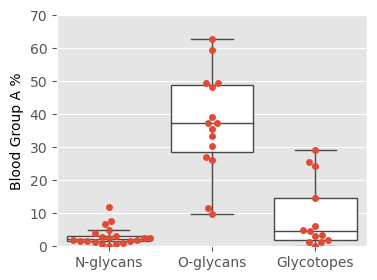

In [5]:
# N-glycans
data=Nglycans().data
filt=NglycanGroupFilters(data)
sub=filt.blood_A
total=filt.complex
Relat_intensity=GeneralSubCalculation(data=data, sub_filt=sub,total_filt=total)
N=Relat_intensity

# O-glycans
data=Oglycans().data
filt=OglycanGroupFilters(data)
sub=filt.blood_A
total=(data['dHex_count']>=0)
Relat_intensity=GeneralSubCalculation(data=data, sub_filt=sub,total_filt=total)
O=Relat_intensity

# Terminals
data=Terminals().data
filt=EpitopeGroupFilters(data)
sub=filt.blood_A
total=(data['dHex_count']>=0)
Relat_intensity=GeneralSubCalculation(data=data, sub_filt=sub,total_filt=total)
T=Relat_intensity

# Combine glycan data
glycans=pd.concat([N,O,T], axis=1)
glycans.columns=['N-glycans', 'O-glycans', 'Glycotopes']
glycans=glycans.stack().reset_index()
glycans.columns=['Sample_collection', 'Glycan_type', 'Relat_intensity']

# combine clinical data
data_new=clinical_new.loc[:,('Sample_name','Sample_collection', 
                             'Collection_time', 'Gestation_length','Blood Group', 'Outcome')].copy()
data_old=clinical_old.loc[:,('Sample_name','Sample_collection', 
                             'Collection_time', 'Gestation_length', 'Blood group', 'Outcome')].copy()
data_old.rename({'Blood group':'Blood Group'}, axis=1, inplace=True)
data_old=data_old.loc[data_old['Sample_collection'].str.contains('NP')]
data=data_new.append(data_old)[['Sample_collection', 'Blood Group', 'Outcome']]


# Merge to clinical data
data=data.merge(glycans, on='Sample_collection', how='inner')

# Plot
plt.style.use('ggplot')
plt.figure(figsize=[4,3])
sb.swarmplot(data=data[data['Blood Group']=='A'], x='Glycan_type', y='Relat_intensity')
sb.boxplot(data=data[data['Blood Group']=='A'], x='Glycan_type', y='Relat_intensity',
          linewidth=1, showfliers=False, boxprops={'facecolor':'w'})
plt.xlabel(''); plt.ylabel('Blood Group A %'); plt.ylim([0,70])
plt.show()


## Blood group B expression in all types of glycans

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.

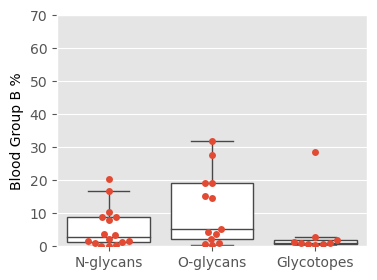

In [6]:
# N-glycans
data=Nglycans().data
filt=NglycanGroupFilters(data)
sub=filt.blood_B
total=filt.complex
Relat_intensity=GeneralSubCalculation(data=data, sub_filt=sub,total_filt=total)
N=Relat_intensity

# O-glycans
data=Oglycans().data
filt=OglycanGroupFilters(data)
sub=filt.blood_B
total=(data['dHex_count']>=0)
Relat_intensity=GeneralSubCalculation(data=data, sub_filt=sub,total_filt=total)
O=Relat_intensity


# Terminals
data=Terminals().data
filt=EpitopeGroupFilters(data)
sub=filt.blood_B
total=(data['dHex_count']>=0)
Relat_intensity=GeneralSubCalculation(data=data, sub_filt=sub,total_filt=total)
T=Relat_intensity

# Combine glycan data
glycans=pd.concat([N,O,T], axis=1)
glycans.columns=['N-glycans', 'O-glycans', 'Glycotopes']
glycans=glycans.stack().reset_index()
glycans.columns=['Sample_collection', 'Glycan_type', 'Relat_intensity']

# combine clinical data
data_new=clinical_new.loc[:,('Sample_name','Sample_collection', 
                             'Collection_time', 'Gestation_length','Blood Group')].copy()
data_old=clinical_old.loc[:,('Sample_name','Sample_collection', 
                             'Collection_time', 'Gestation_length', 'Blood group')].copy()
data_old.rename({'Blood group':'Blood Group'}, axis=1, inplace=True)
data_old=data_old.loc[data_old['Sample_collection'].str.contains('NP')]
data=data_new.append(data_old)[['Sample_collection', 'Blood Group']]


# Merge to clinical data
data=data.merge(glycans, on='Sample_collection', how='inner')


# Plot
plt.style.use('ggplot')
plt.figure(figsize=[4,3])
sb.swarmplot(data=data[data['Blood Group']=='B'], x='Glycan_type', y='Relat_intensity')
sb.boxplot(data=data[data['Blood Group']=='B'], x='Glycan_type', y='Relat_intensity',
          linewidth=1, showfliers=False, boxprops={'facecolor':'w'})

plt.xlabel(''); plt.ylabel('Blood Group B %'); plt.ylim([0,70])

plt.show()


## Figure to illustrate the cohort

/tmp/ipykernel_5029/111608365.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data_new.append(data_old)


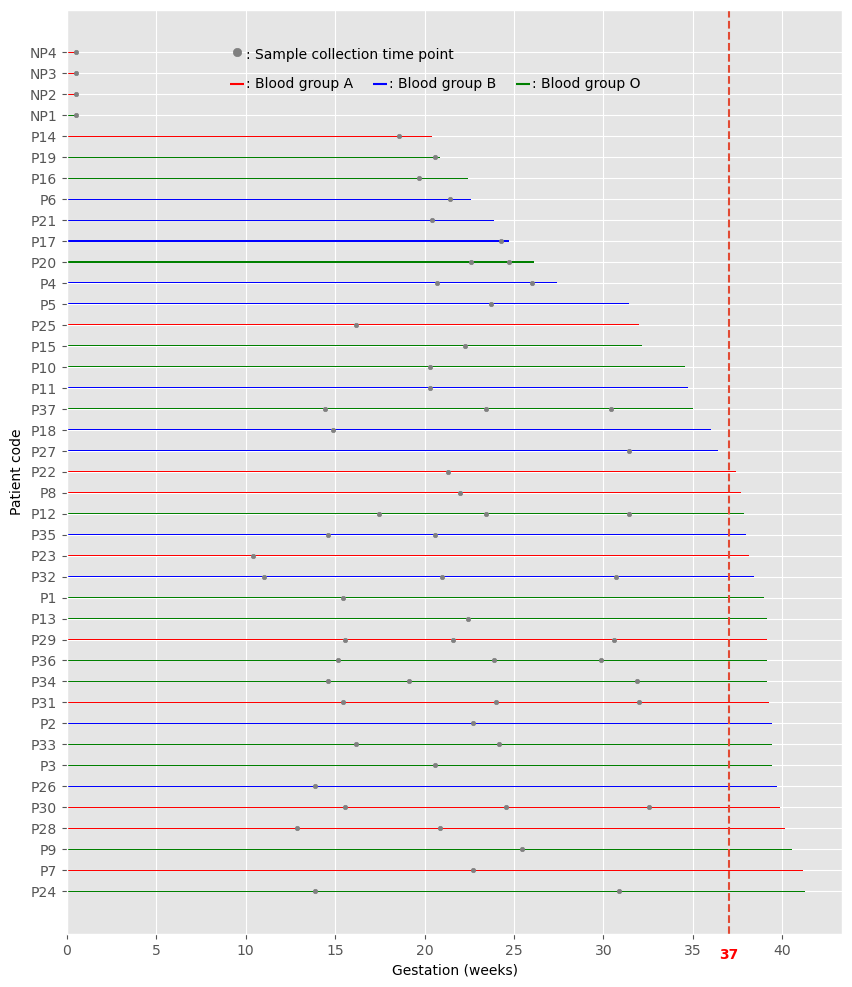

In [7]:
def CohortIllustrator(medical_intervention=True):
    # From clinical data_new
    data_new=clinical_new.loc[:,('Sample_name','Sample_collection', 
                             'Collection_time', 'Gestation_length','Blood Group',
                             'Cerclage starts', 'Progesterone starts')].copy()

    # Add non-pregnant samples from clincial_old, get data
    data_old=clinical_old.loc[:,('Sample_name','Sample_collection', 
                             'Collection_time', 'Gestation_length', 'Blood group',
                             'Cerclage starts', 'Progesterone starts')].copy()
    
    data_old.rename({'Blood group':'Blood Group'}, axis=1, inplace=True)
    

    data_old=data_old.loc[data_old['Sample_collection'].str.contains('NP')]
    data_old.replace({0:0.5}, inplace=True)

    data=data_new.append(data_old)
    data.reset_index(inplace=True)
    data.drop(labels=['index'], axis=1, inplace=True)
    data['Sample_name']=data['Sample_name'].astype('str')
    data.sort_values(by='Gestation_length', inplace=True, ascending=False)

    # Plot
    plt.style.use('ggplot')

    p,ax=plt.subplots(figsize=(10,12))
    

    ax.barh(y=data['Sample_name'], width=data['Gestation_length'], height=0.05, 
            color=data['Blood Group'].replace({'A':'r', 'B':'b','O':'g'}))
    ax.scatter(x=data['Collection_time'], y=data['Sample_name'], color='grey', s=10)
    ax.set_xlabel('Gestation (weeks)')
    ax.set_ylabel('Patient code')

    # Add 37 week border line
    ax.axvline(x=37, linestyle='--')
    ax.text(x=36.5, y=-3.2, s='37', fontsize=10, fontweight='bold', c='r')

    # Add legend for collection time point
    ax.scatter(x=4.5+5, y=40, c='grey')
    ax.text(x=5+5, y=39.7,s=': Sample collection time point',c='k')

    # Add legend for time of birth
    ax.scatter(x=9.5, y=38.5, marker='_', c='r', s=100)
    ax.text(x=10, y=38.3,s=': Blood group A' ,c='k')
    
    ax.scatter(x=9.5+8, y=38.5, marker='_', c='b', s=100)
    ax.text(x=10+8, y=38.3,s=': Blood group B' ,c='k')
    
    ax.scatter(x=9.5+16, y=38.5, marker='_', c='g', s=100)
    ax.text(x=10+16, y=38.3,s=': Blood group O' ,c='k')
    
    
    if medical_intervention:
        # Add Cerclage and progesterone start point
        ax.scatter(x=data['Cerclage starts'], y=data['Sample_name'], marker='X', color='k')
        ax.scatter(x=data['Progesterone starts'], y=data['Sample_name'], marker='+', color='k')

    plt.show()

CohortIllustrator(medical_intervention=False)

# N-glycans

## Repeat the analysis of our previous publication

### Non-fucosylated glycans, 2 LacNAc units

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:467: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,i]=data[i].astype('float')
/tm

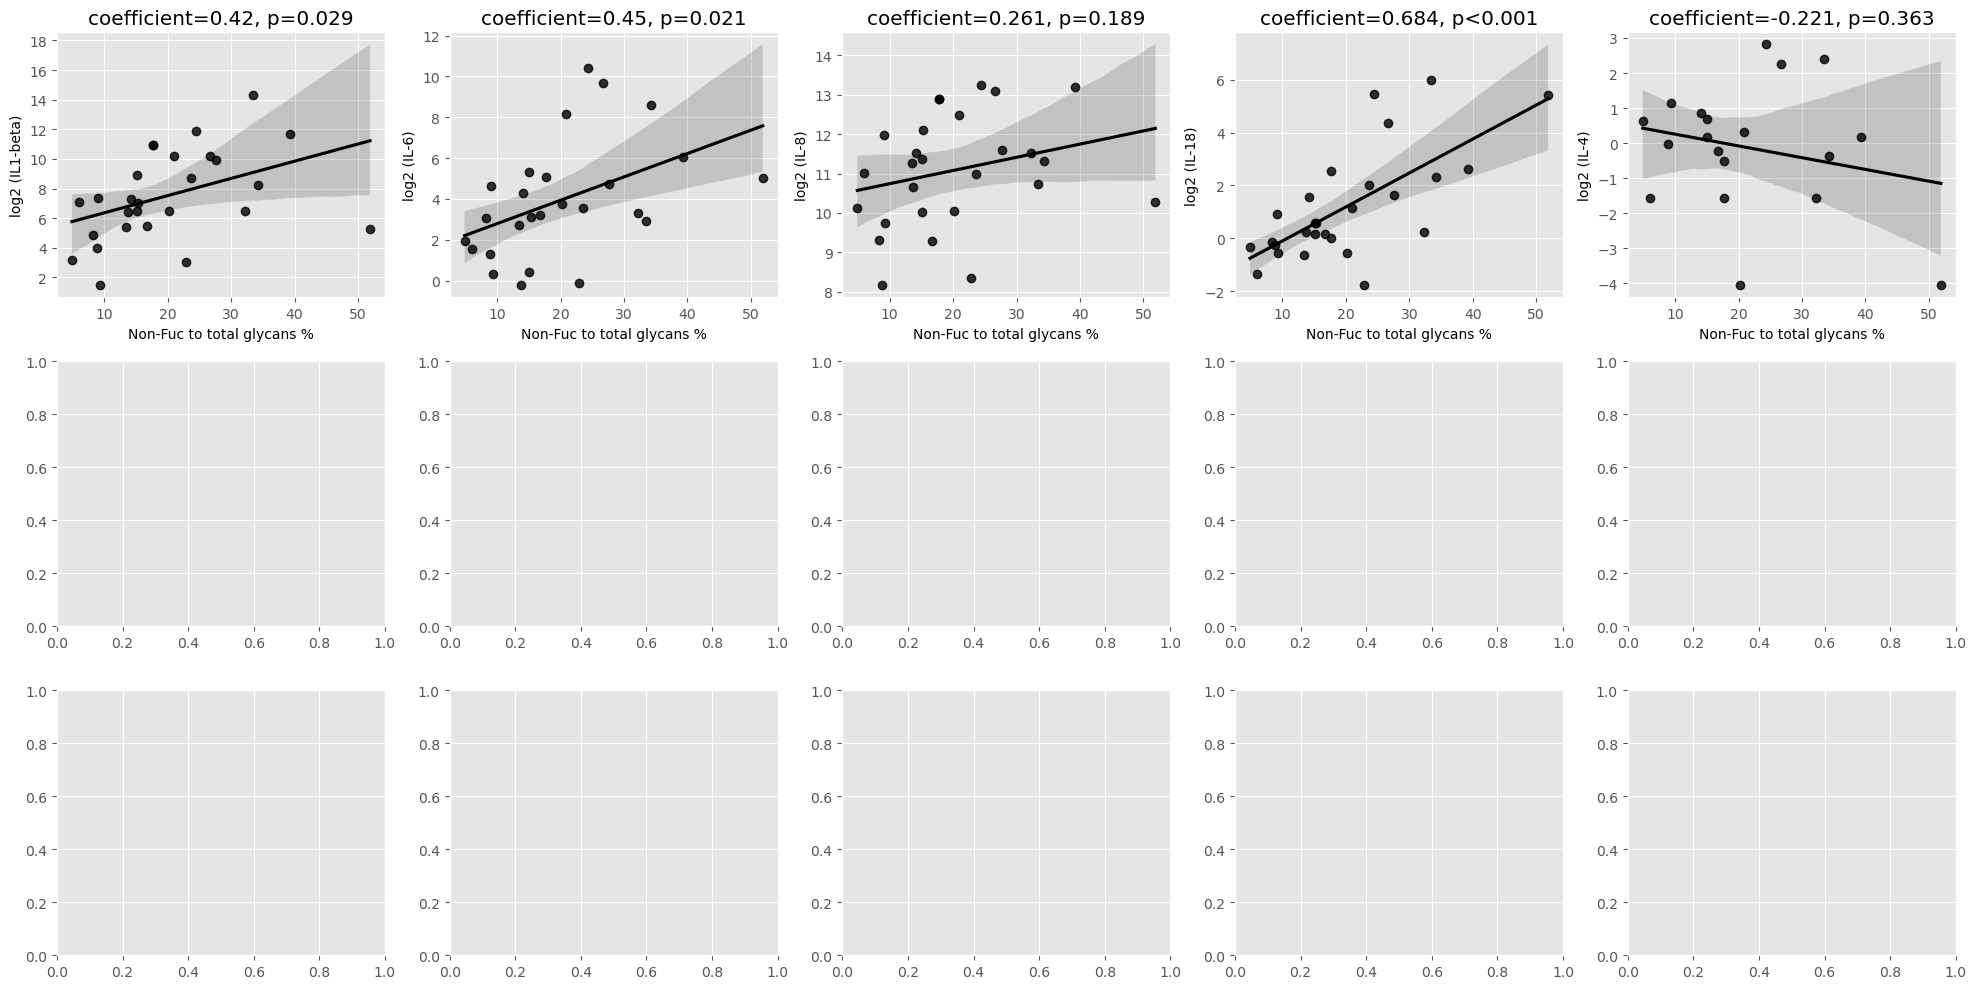

In [8]:
data=Nglycans().data.copy()

# Relative intensity   
filt=NglycanGroupFilters(data)
sub=(filt.bi) & (data['dHex_count']==0)
total=(filt.bi) & (data['dHex_count']>=0)

Relat_intensity=GeneralSubCalculation(data=data, sub_filt=sub, total_filt= total)
Relat_intensity=Relat_intensity.merge(clinical_old, on='Sample_collection', how='inner')
PlotCytokineOldCohort(Relat_intensity,CST_label=False, xlabel='Non-Fuc to total glycans %')



### Mono-fucosylated glycans, 2 LacNAc units

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:467: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,i]=data[i].astype('float')
/tm

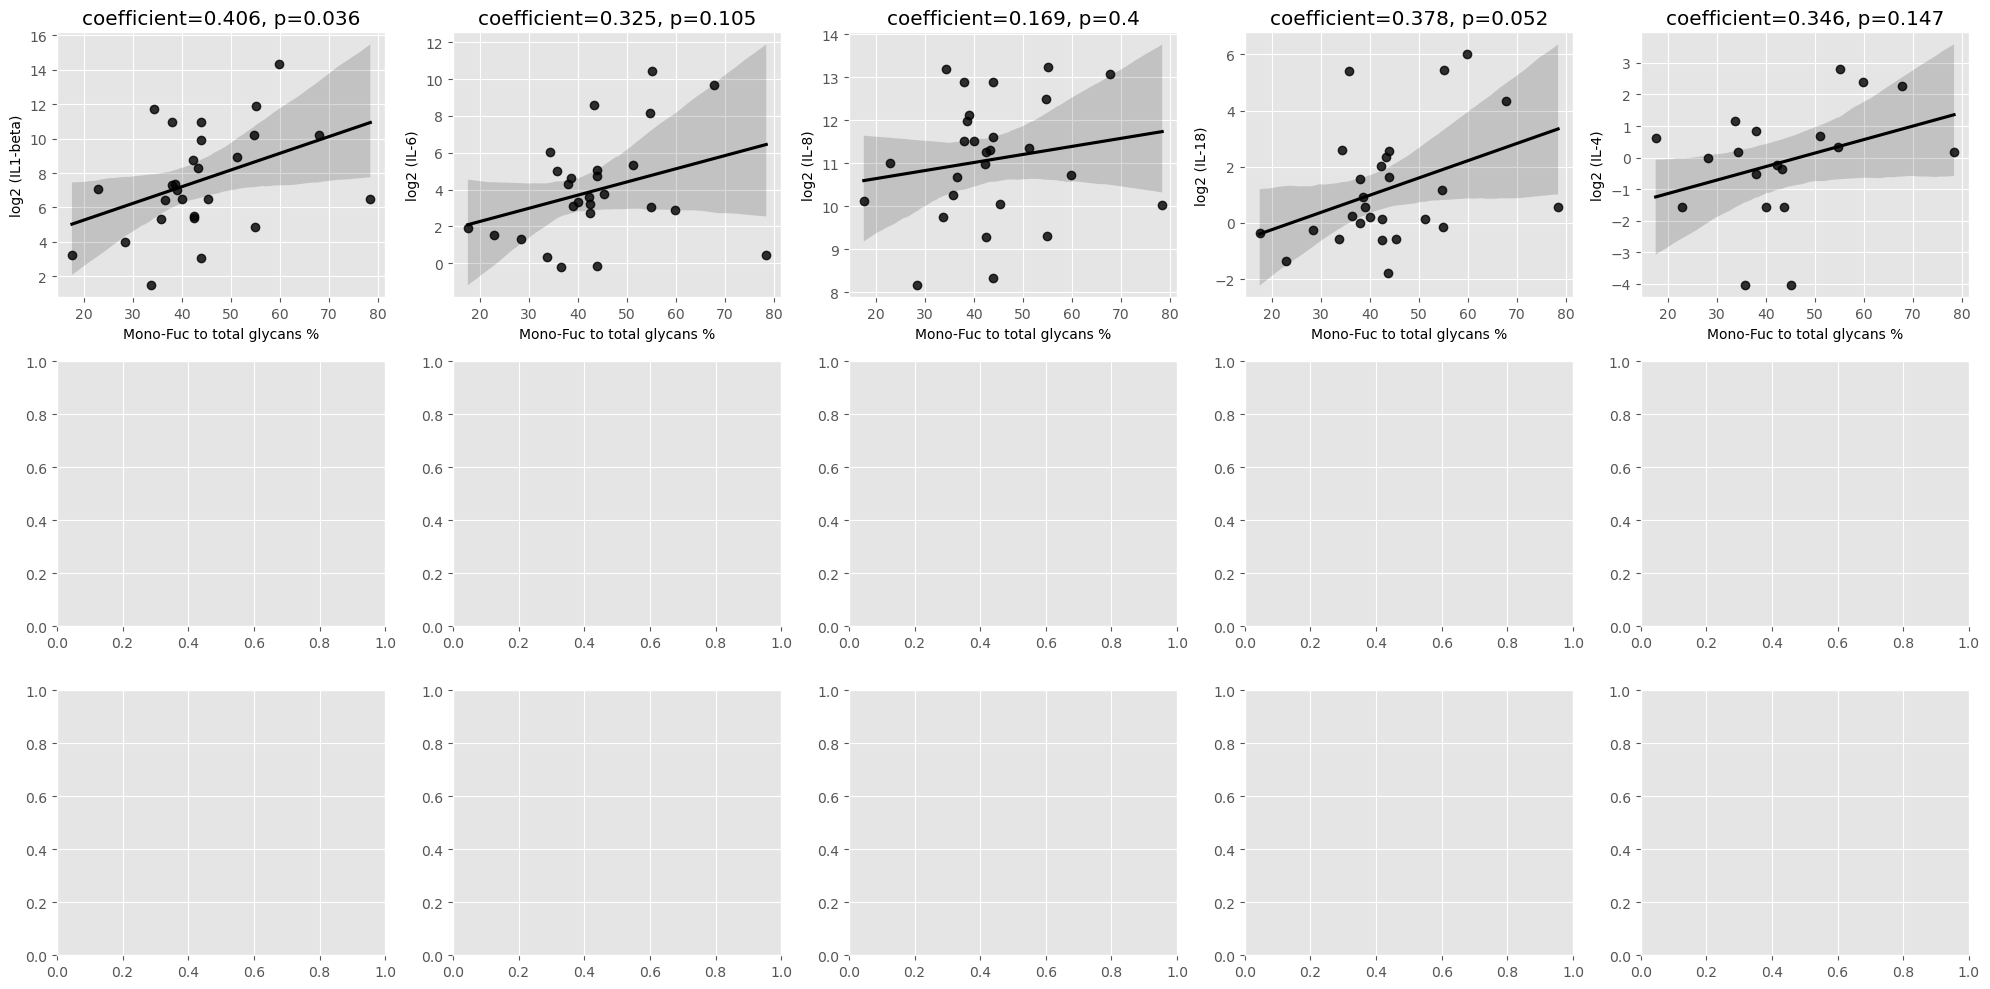

In [9]:
data=Nglycans().data

# Relative intensity   
filt=NglycanGroupFilters(data)
sub=(filt.bi) & (data['dHex_count']==1)
total=(filt.bi) & (data['dHex_count']>=0)

Relat_intensity=GeneralSubCalculation(data=data, sub_filt=sub, total_filt= total)
Relat_intensity=Relat_intensity.merge(clinical_old, on='Sample_collection', how='inner')
PlotCytokineOldCohort(Relat_intensity,CST_label=False, xlabel='Mono-Fuc to total glycans %')



### Poly-fucosylated glycans, 2 LacNAc units

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:467: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,i]=data[i].astype('float')
/tm

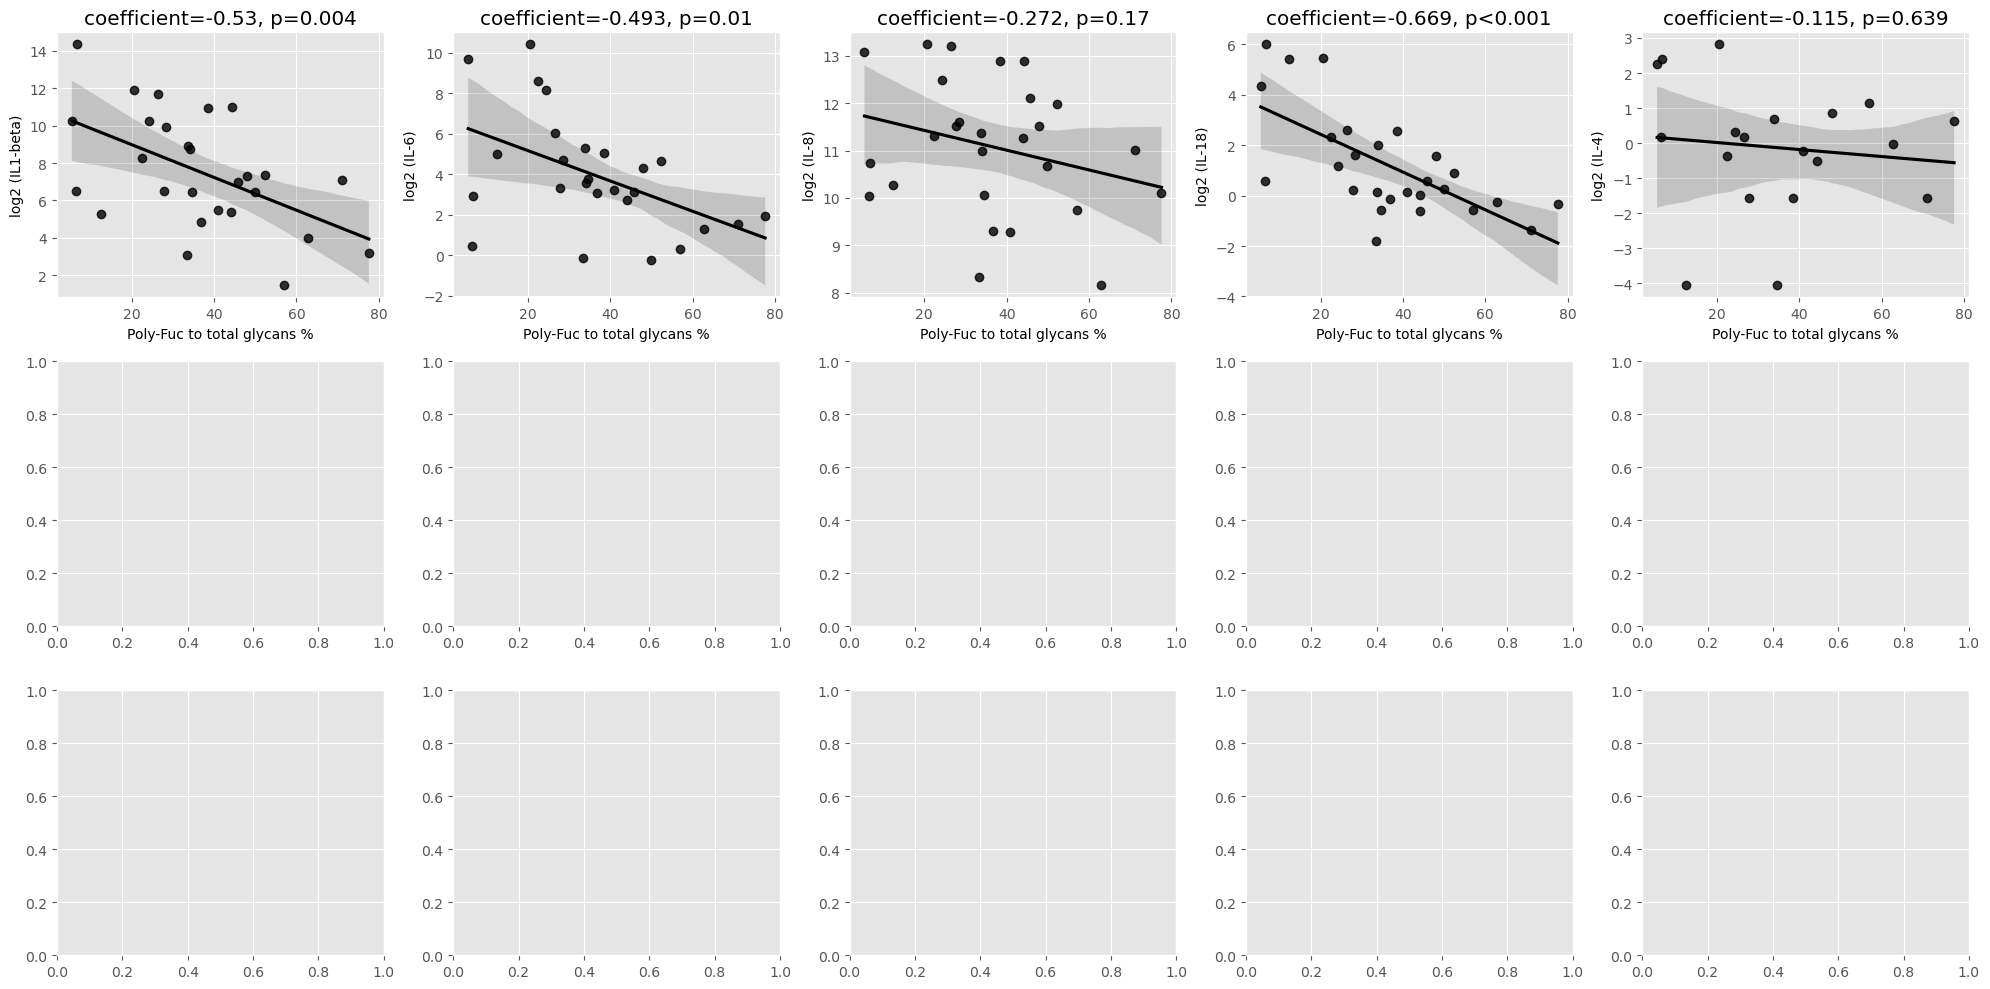

In [10]:
data=Nglycans().data

# Relative intensity   
filt=NglycanGroupFilters(data)
sub=(filt.bi) & (data['dHex_count']>=2)
total=(filt.bi) & (data['dHex_count']>=0)

Relat_intensity=GeneralSubCalculation(data=data, sub_filt=sub, total_filt= total)
Relat_intensity=Relat_intensity.merge(clinical_old, on='Sample_collection', how='inner')
PlotCytokineOldCohort(Relat_intensity,CST_label=False, xlabel='Poly-Fuc to total glycans %')



### Highly fucosylated in poly fucosylated glycans

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:467: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,i]=data[i].astype('float')
/tm

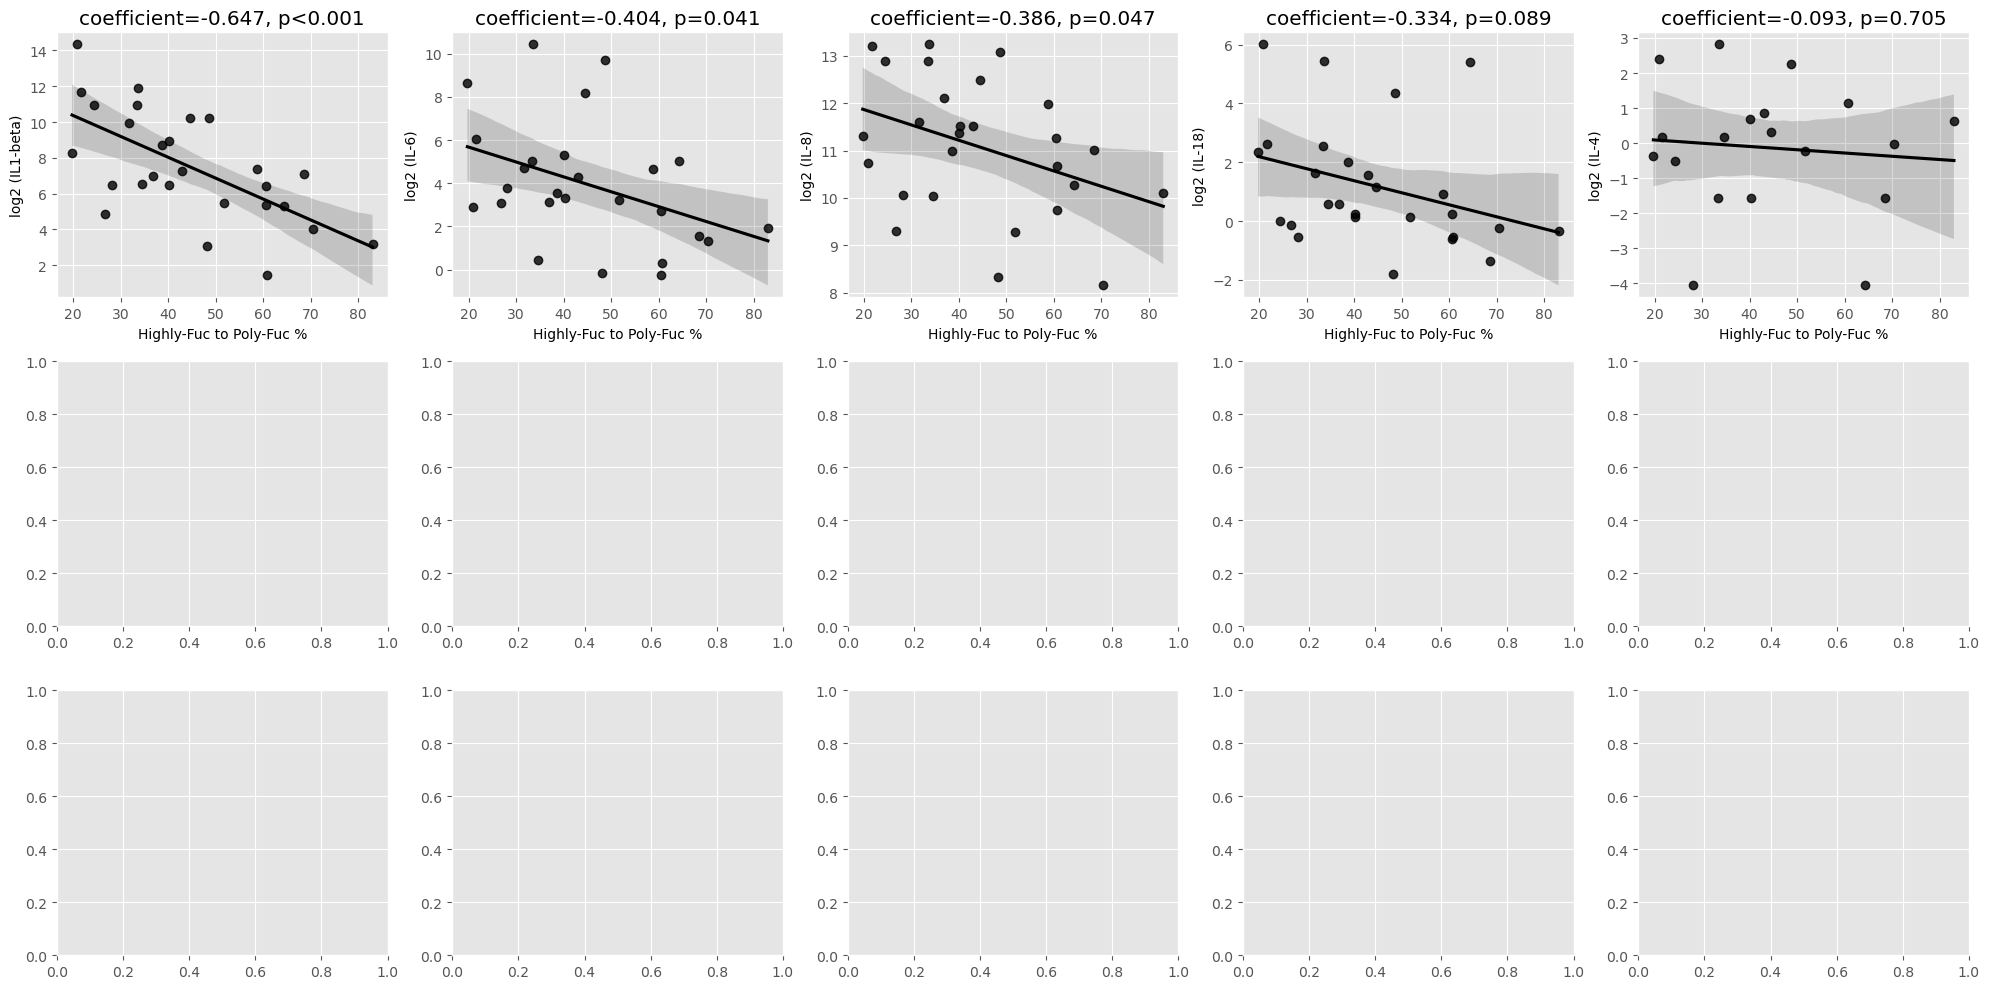

In [11]:
data=Nglycans().data

# Relative intensity   
filt=NglycanGroupFilters(data)
sub=(filt.bi) & (data['dHex_count']>=3)
total=(filt.bi) & (data['dHex_count']>=2)

Relat_intensity=GeneralSubCalculation(data=data, sub_filt=sub, total_filt= total)
Relat_intensity=Relat_intensity.merge(clinical_old, on='Sample_collection', how='inner')
PlotCytokineOldCohort(Relat_intensity,CST_label=False, xlabel='Highly-Fuc to Poly-Fuc %')



### Non-fucosylated glycans, 3 LacNAc units

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:467: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,i]=data[i].astype('float')
/tm

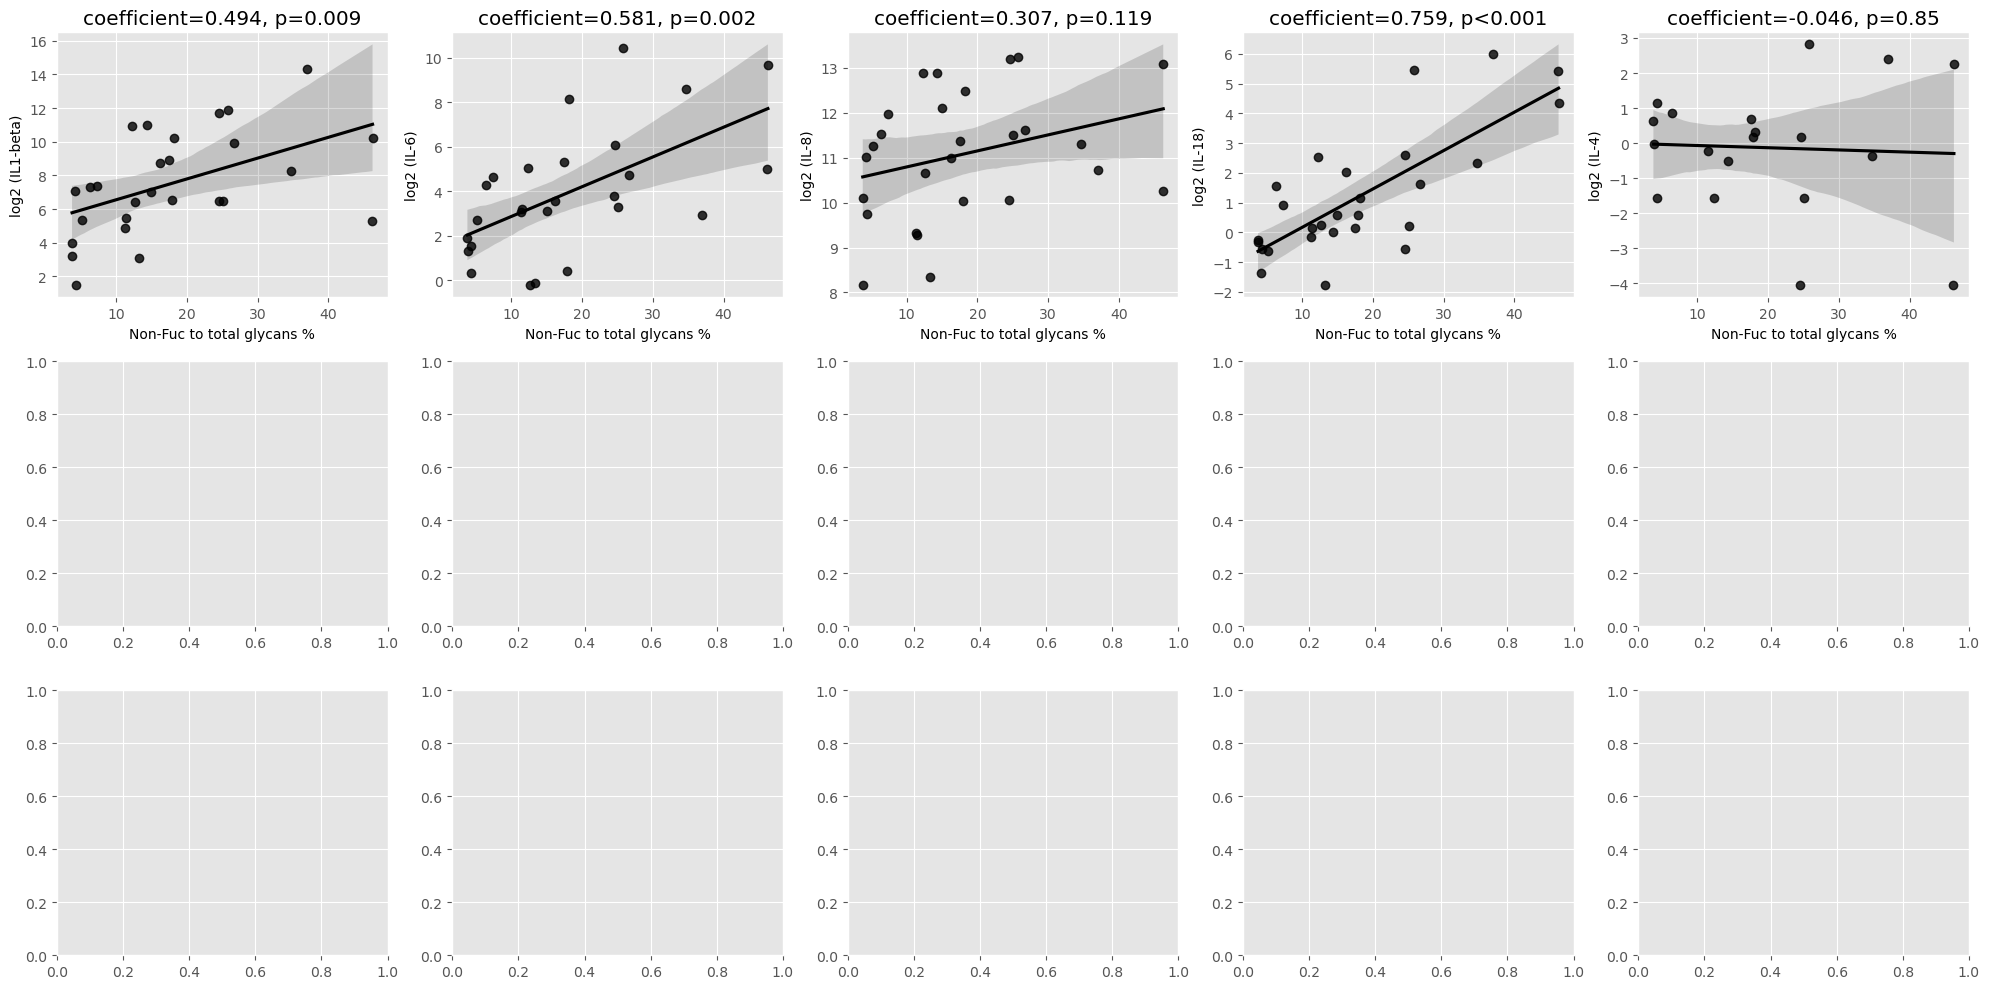

In [12]:
data=Nglycans().data

# Relative intensity   
filt=NglycanGroupFilters(data)
sub=(filt.tri) & (data['dHex_count']==0)
total=(filt.tri) & (data['dHex_count']>=0)

Relat_intensity=GeneralSubCalculation(data=data, sub_filt=sub, total_filt= total)
Relat_intensity=Relat_intensity.merge(clinical_old, on='Sample_collection', how='inner')
PlotCytokineOldCohort(Relat_intensity,CST_label=False, xlabel='Non-Fuc to total glycans %')



### Mono-fucosylated glycans, 3 LacNAc units

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:467: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,i]=data[i].astype('float')
/tm

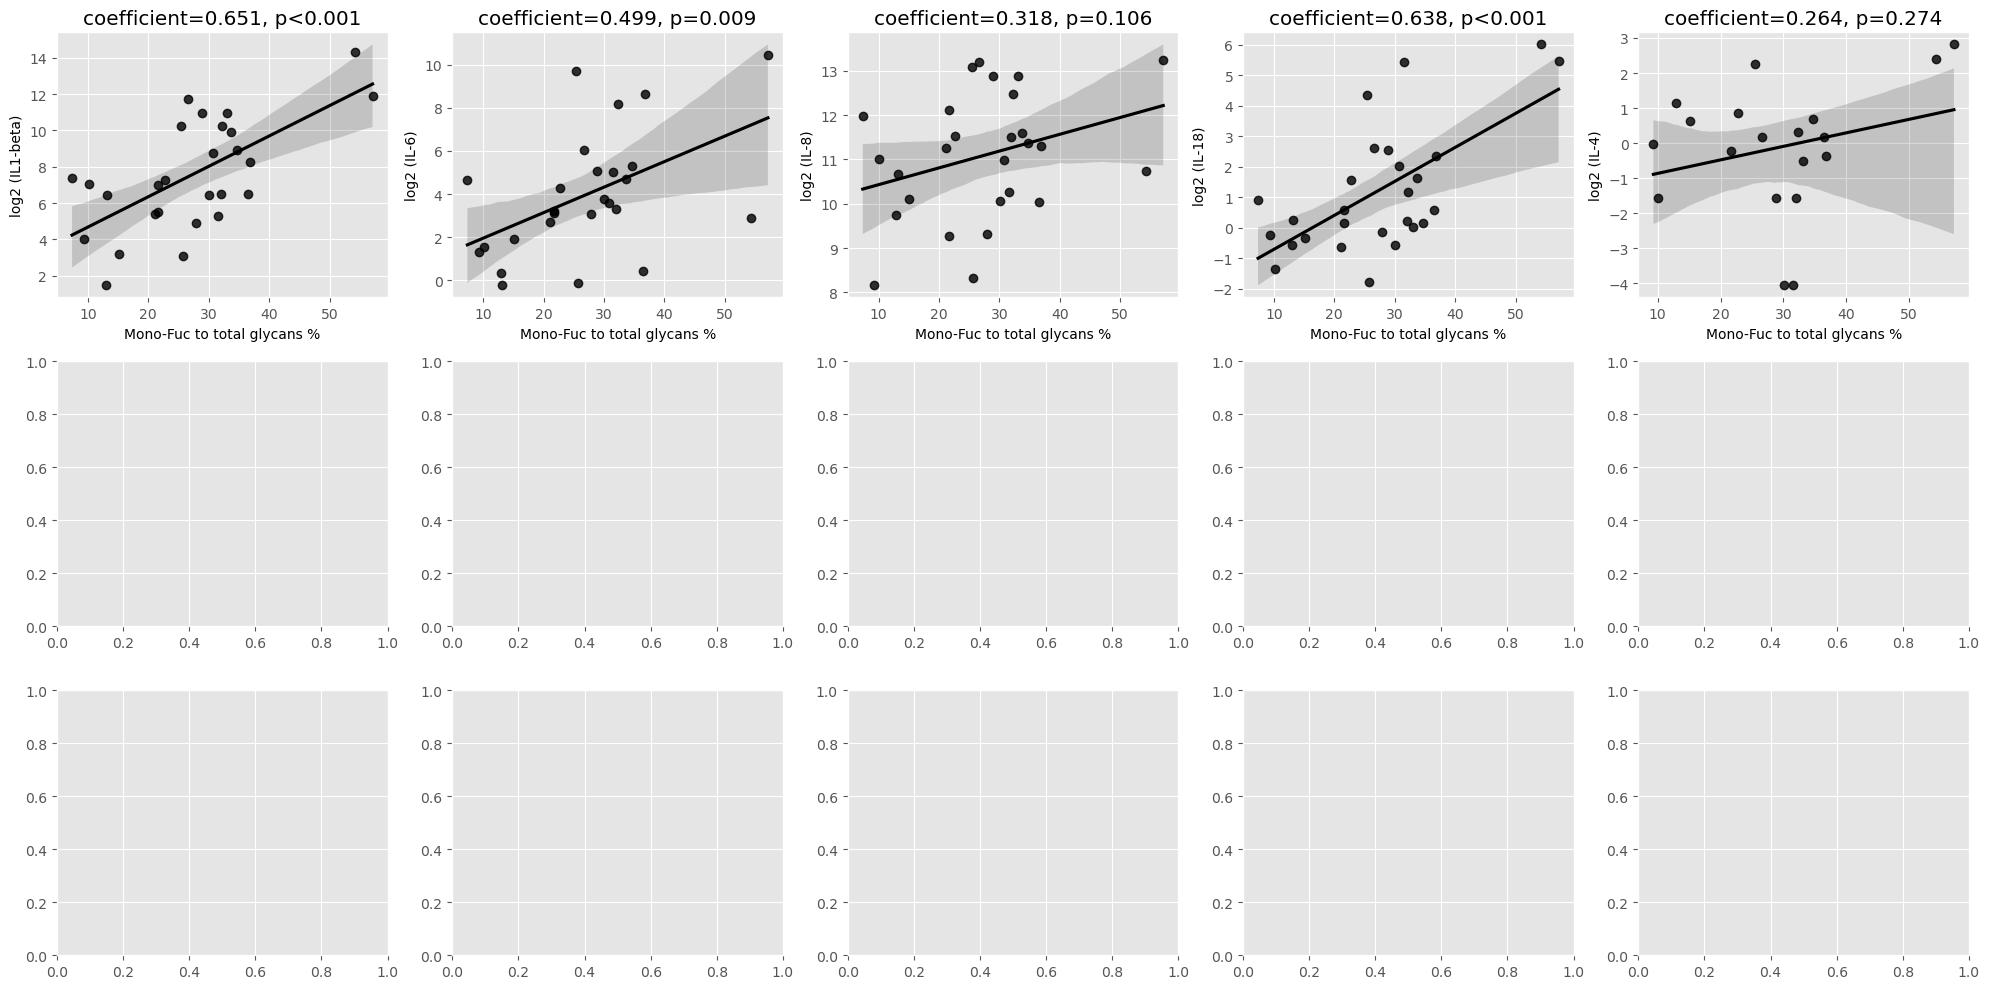

In [13]:
data=Nglycans().data

# Relative intensity   
filt=NglycanGroupFilters(data)
sub=(filt.tri) & (data['dHex_count']==1)
total=(filt.tri) & (data['dHex_count']>=0)

Relat_intensity=GeneralSubCalculation(data=data, sub_filt=sub, total_filt= total)
Relat_intensity=Relat_intensity.merge(clinical_old, on='Sample_collection', how='inner')
PlotCytokineOldCohort(Relat_intensity,CST_label=False, xlabel='Mono-Fuc to total glycans %')



### Poly-fucosylated glycans, 3 LacNAc units

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:467: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,i]=data[i].astype('float')
/tm

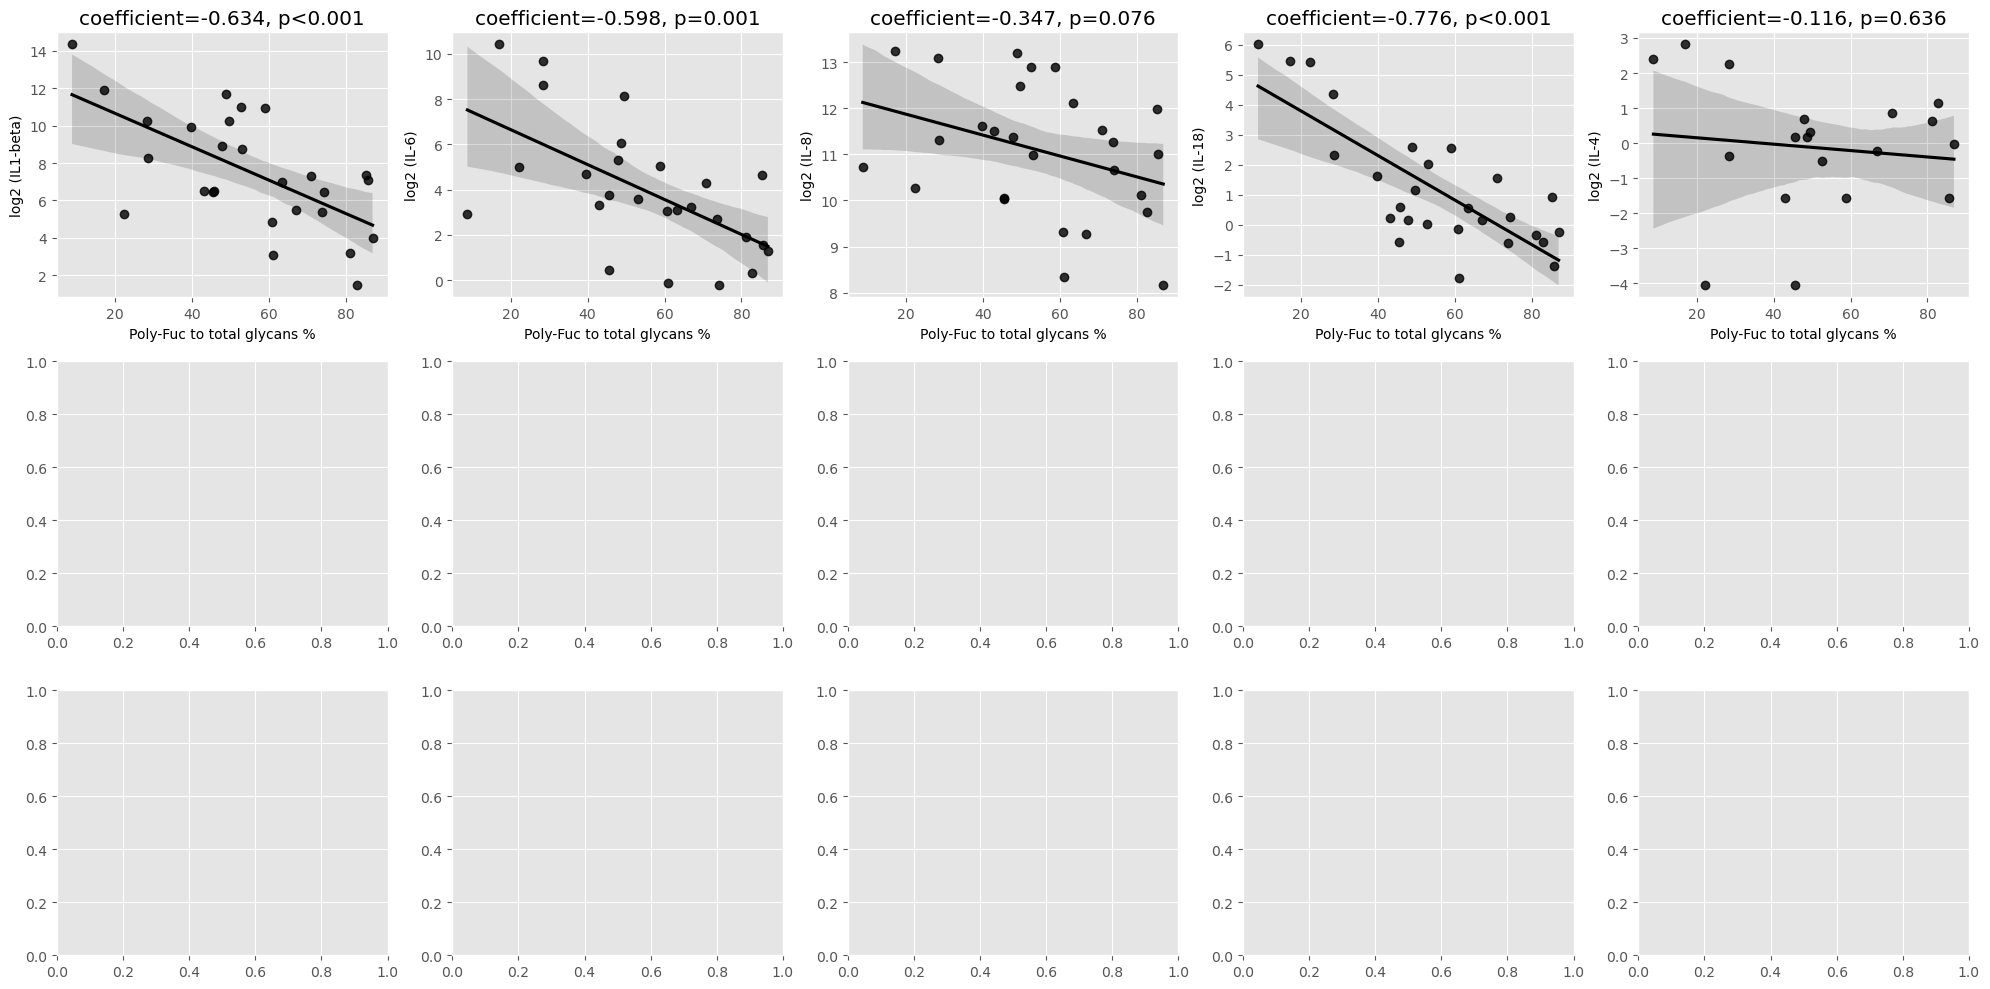

In [14]:
data=Nglycans().data

# Relative intensity   
filt=NglycanGroupFilters(data)
sub=(filt.tri) & (data['dHex_count']>=2)
total=(filt.tri) & (data['dHex_count']>=0)

Relat_intensity=GeneralSubCalculation(data=data, sub_filt=sub, total_filt= total)
Relat_intensity=Relat_intensity.merge(clinical_old, on='Sample_collection', how='inner')
PlotCytokineOldCohort(Relat_intensity,CST_label=False, xlabel='Poly-Fuc to total glycans %')



### Highly fucosylated in poly-fucosylated, 3 LacNAc units

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:467: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,i]=data[i].astype('float')
/tm

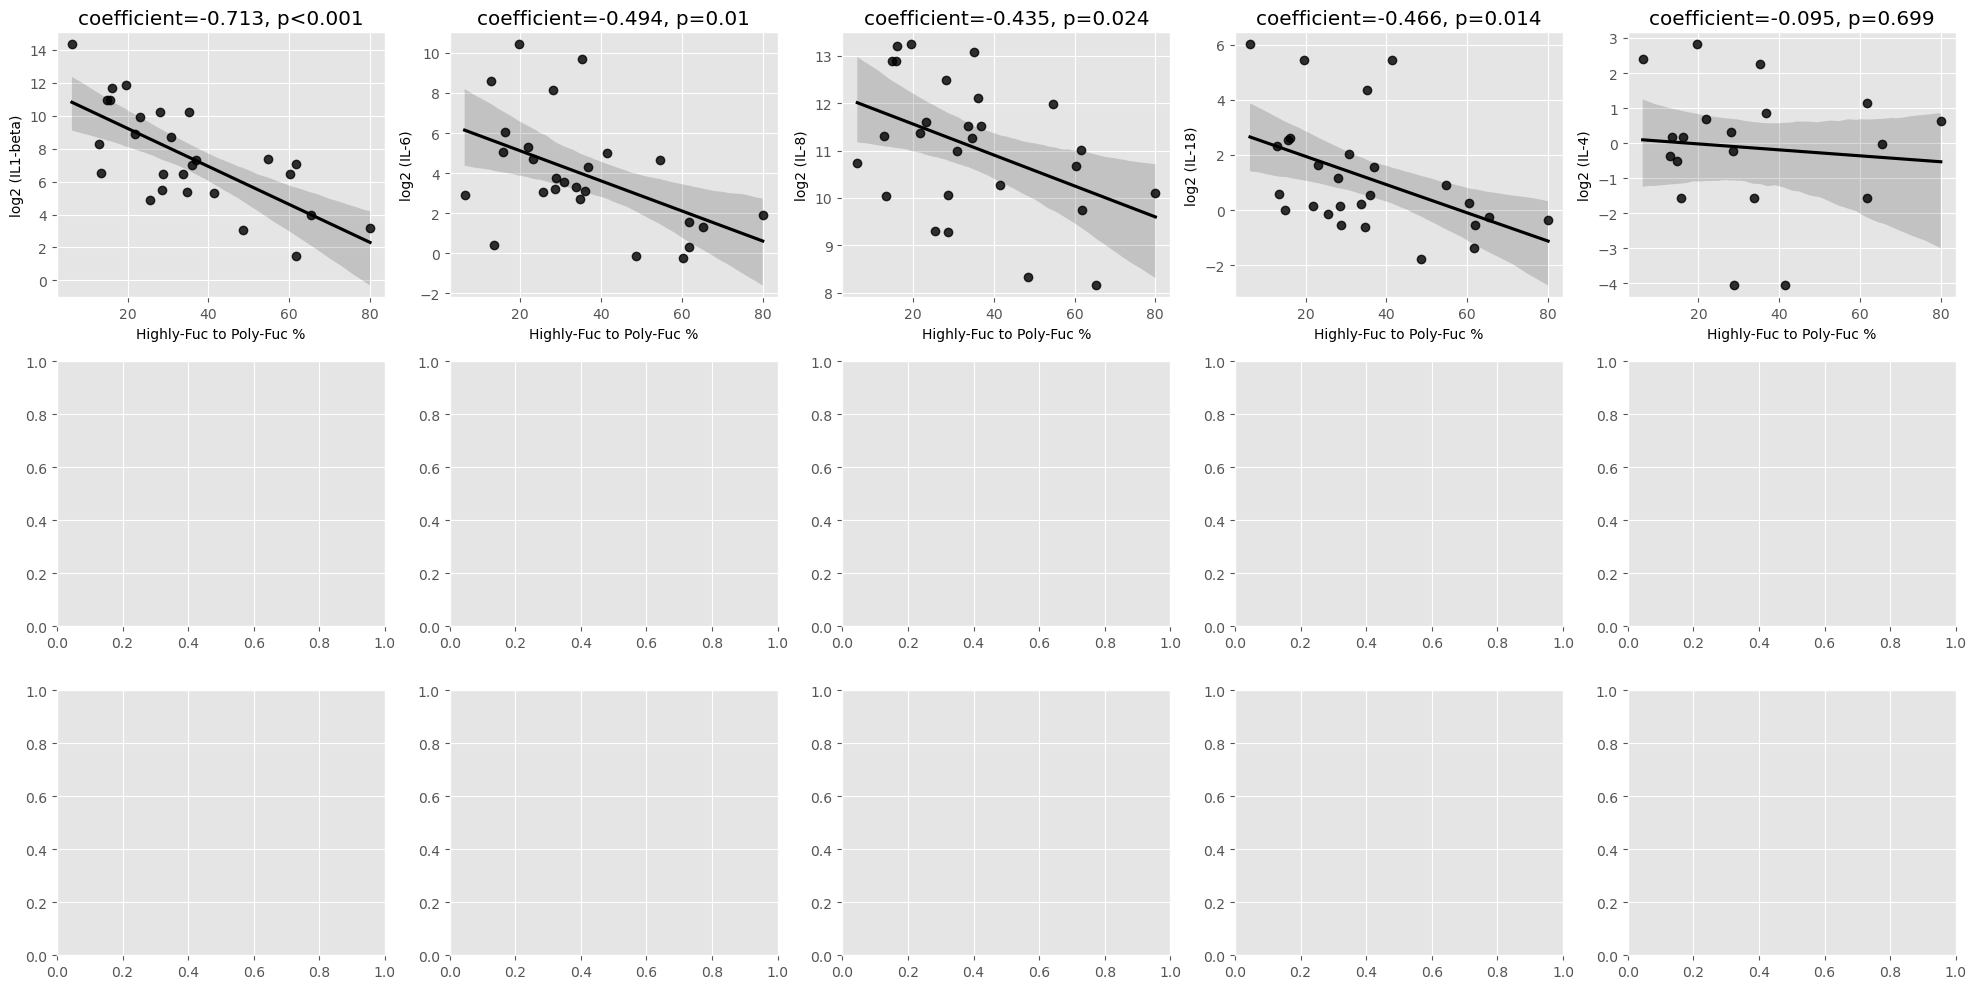

In [15]:
data=Nglycans().data

# Relative intensity   
filt=NglycanGroupFilters(data)
sub=(filt.tri) & (data['dHex_count']>=4)
total=(filt.tri) & (data['dHex_count']>=2)

Relat_intensity=GeneralSubCalculation(data=data, sub_filt=sub, total_filt= total)
Relat_intensity=Relat_intensity.merge(clinical_old, on='Sample_collection', how='inner')
PlotCytokineOldCohort(Relat_intensity,CST_label=False, xlabel='Highly-Fuc to Poly-Fuc %')



## Paucimannose glycans

### Fuction for correlation analysis 

In [16]:
def PauciMannCorrelation(y='MMP', CST_all=True, CST_label=False, xlabel='Paucimannose glycans %'):
    # Data
    data=Nglycans().data

    # Relative intensity   
    filt=NglycanGroupFilters(data)
    sub=filt.paucimannose
    total=sub | filt.high_mannose

    Relat_intensity=GeneralSubCalculation(data=data, sub_filt=sub, total_filt= total)
    
    # Merge and plot
    
    if y in ['MMP', 'Complements']:
        Relat_intensity=Relat_intensity.merge(clinical_new, on='Sample_collection', how='inner')
        if (not CST_all):
            Relat_intensity=Relat_intensity.loc[~(Relat_intensity['CST group']=='IV-B or IV-C')]
        if y=='MMP':
            PlotMMPNewCohort(Relat_intensity, CST_label=CST_label, xlabel=xlabel)
        elif y=='Complements':
            PlotComplementsNewCohort(Relat_intensity, CST_label=CST_label, xlabel=xlabel)
    elif y=='Cytokines':
        Relat_intensity=Relat_intensity.merge(clinical_old, on='Sample_collection', how='inner')
        if (not CST_all):
            Relat_intensity=Relat_intensity.loc[~(Relat_intensity['CST group']=='IV-B or IV-C')]
        PlotCytokineOldCohort(Relat_intensity,CST_label=CST_label, xlabel=xlabel)

### Correlation to MMP

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:315: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,i]=data[i].astype('float')


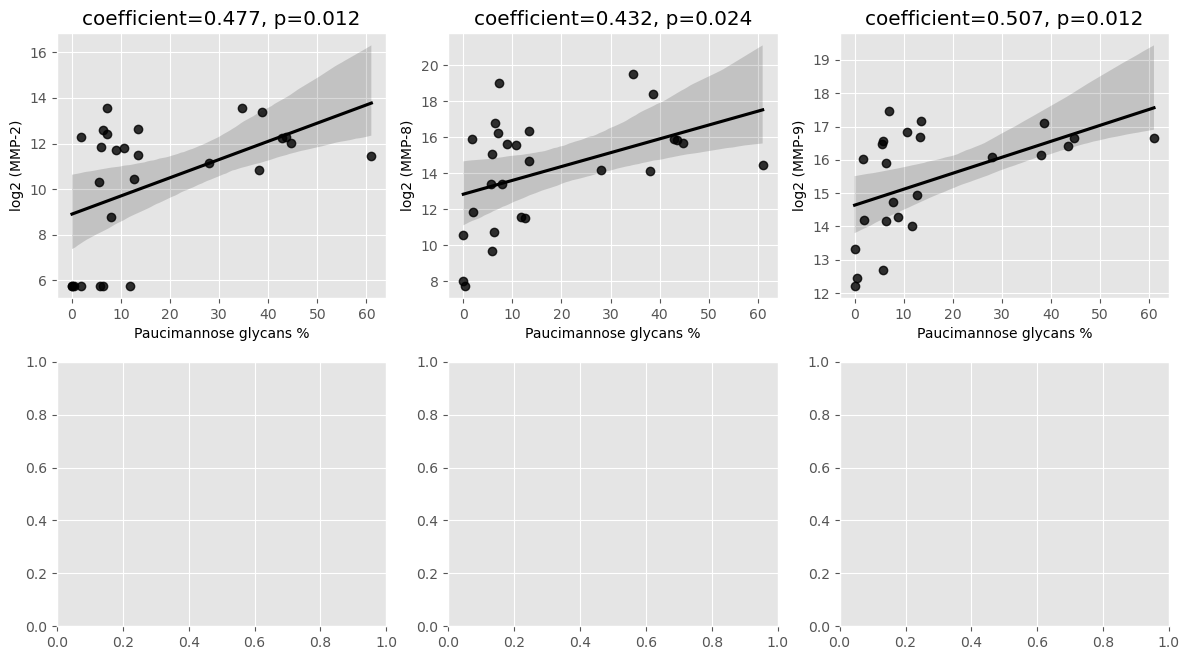

In [17]:
PauciMannCorrelation(y='MMP', CST_label=False)

### Correlation to complements

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()


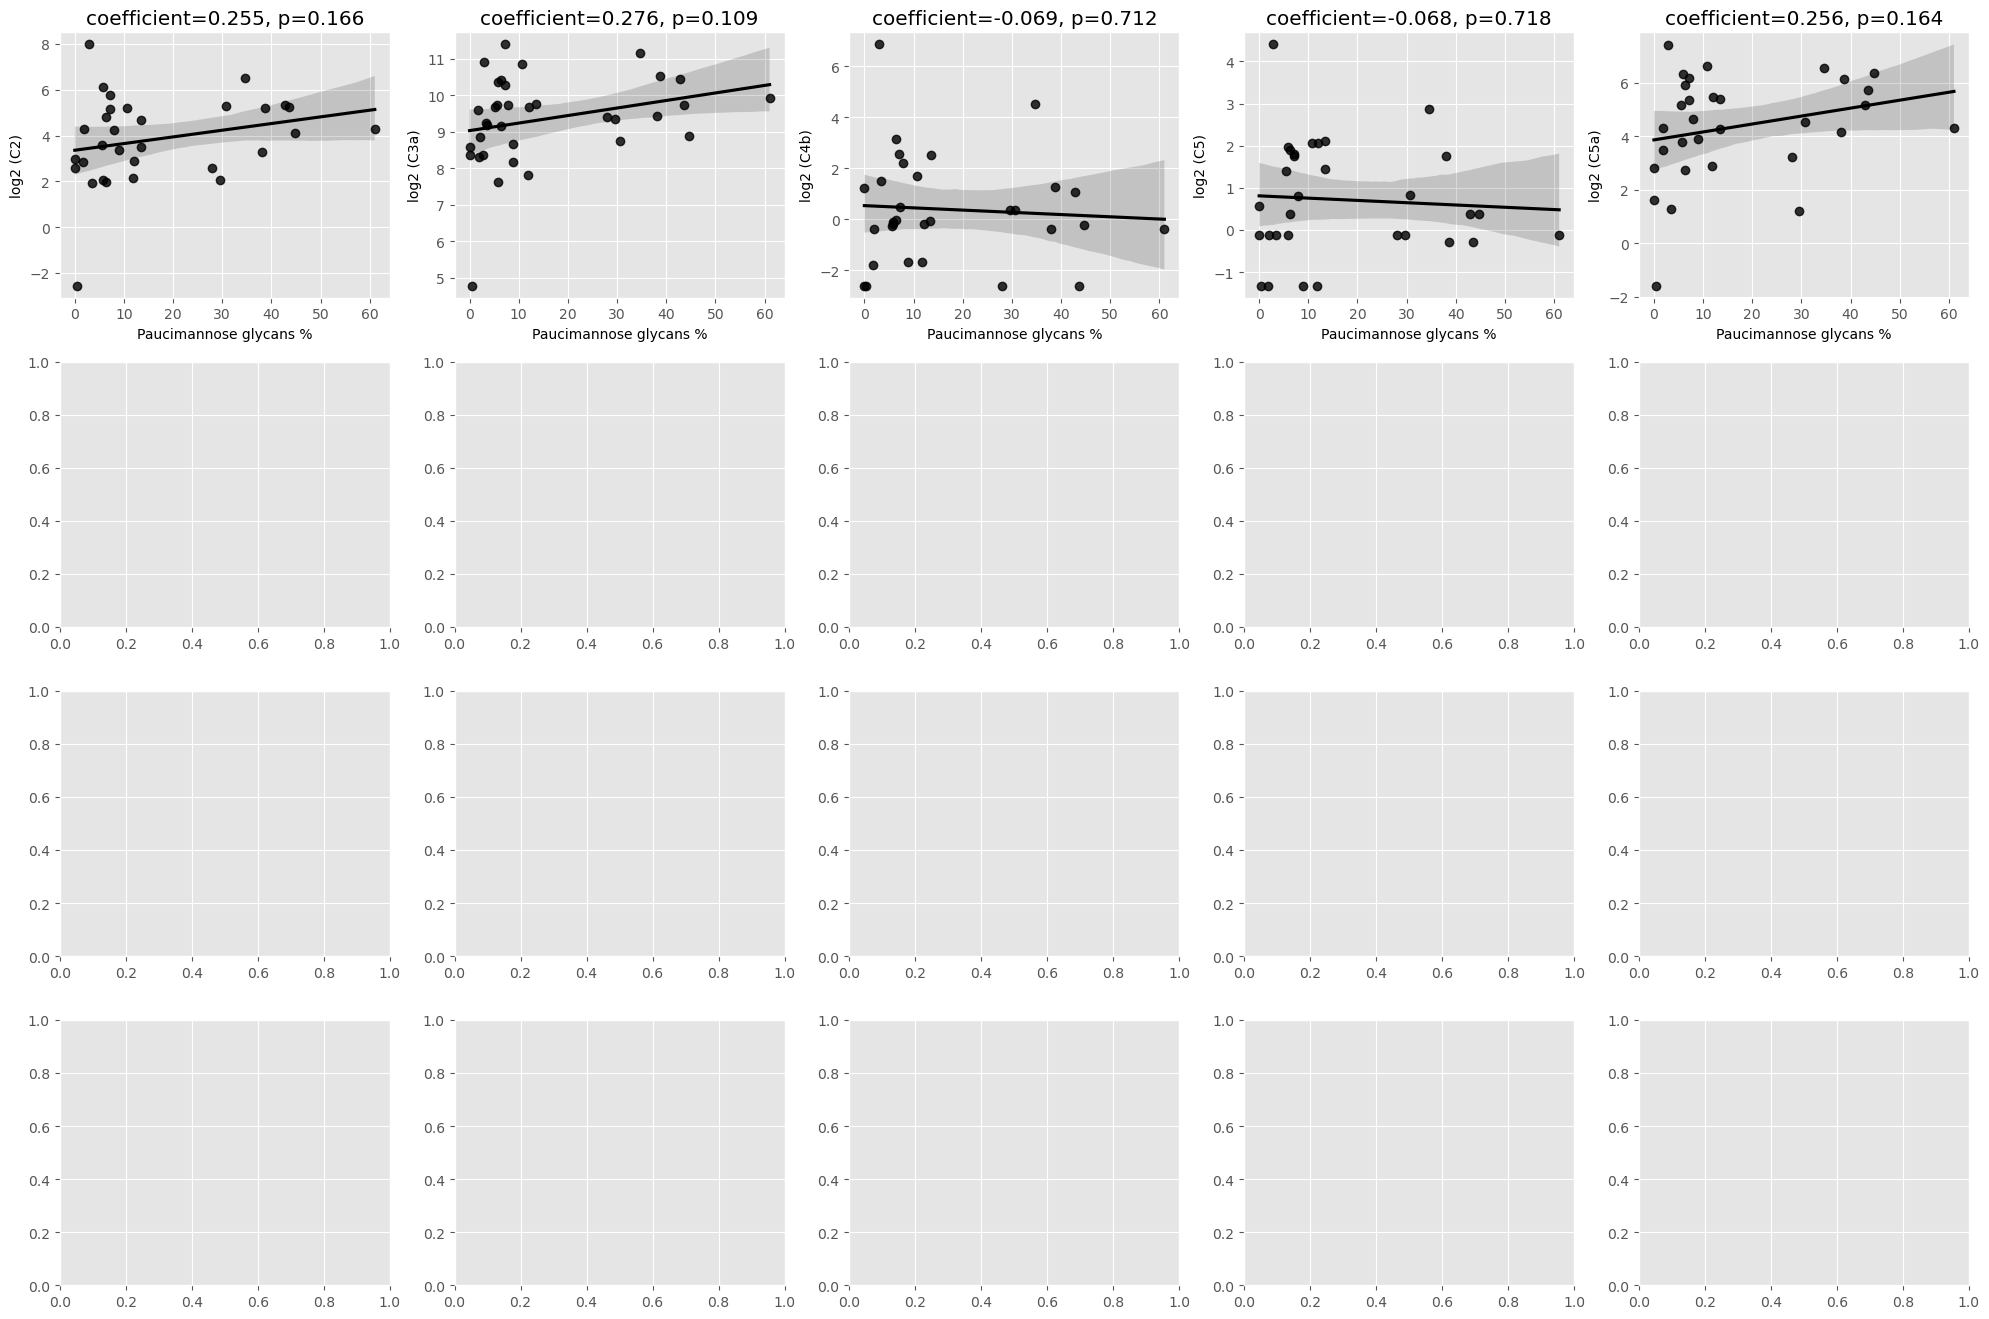

In [18]:
PauciMannCorrelation(y='Complements')

### Correlation to cytokines

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:467: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,i]=data[i].astype('float')
/tm

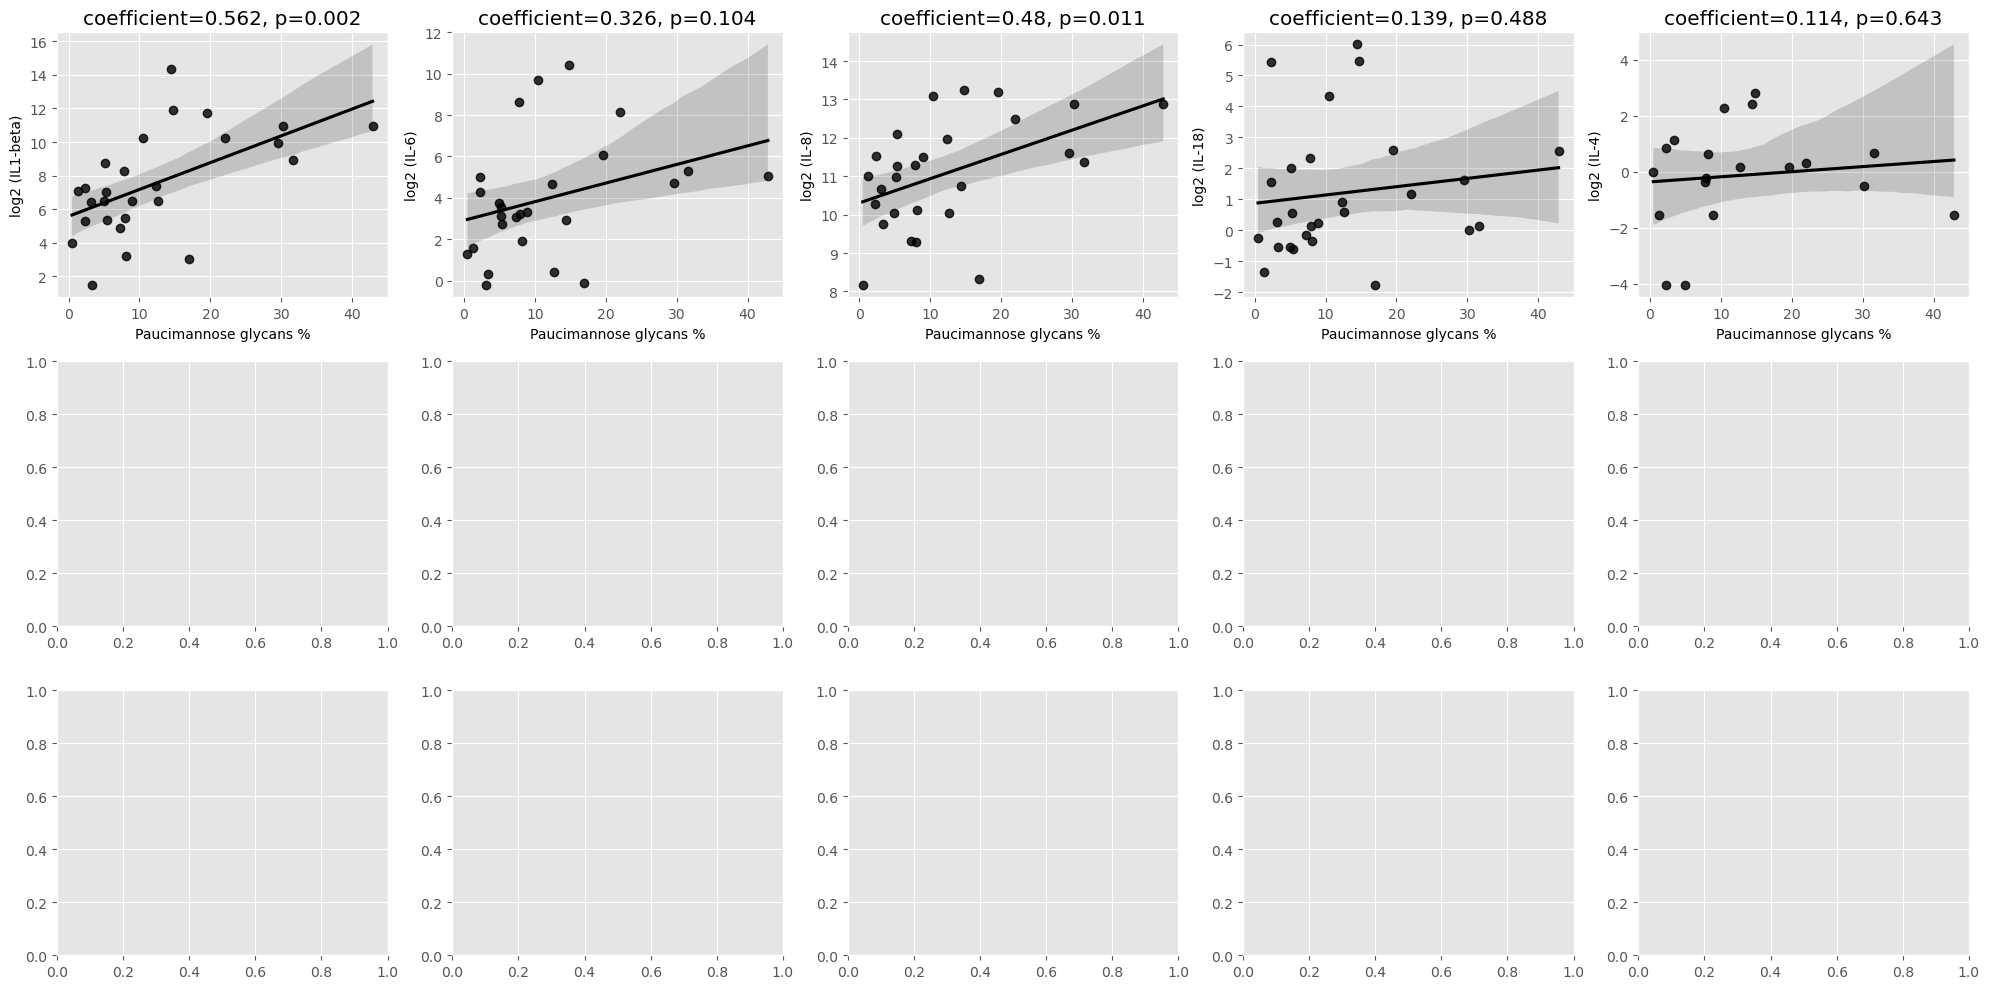

In [19]:
PauciMannCorrelation(y='Cytokines')

## Man8-9 in high mannose

### Relative intensity in high mannose glycans

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()


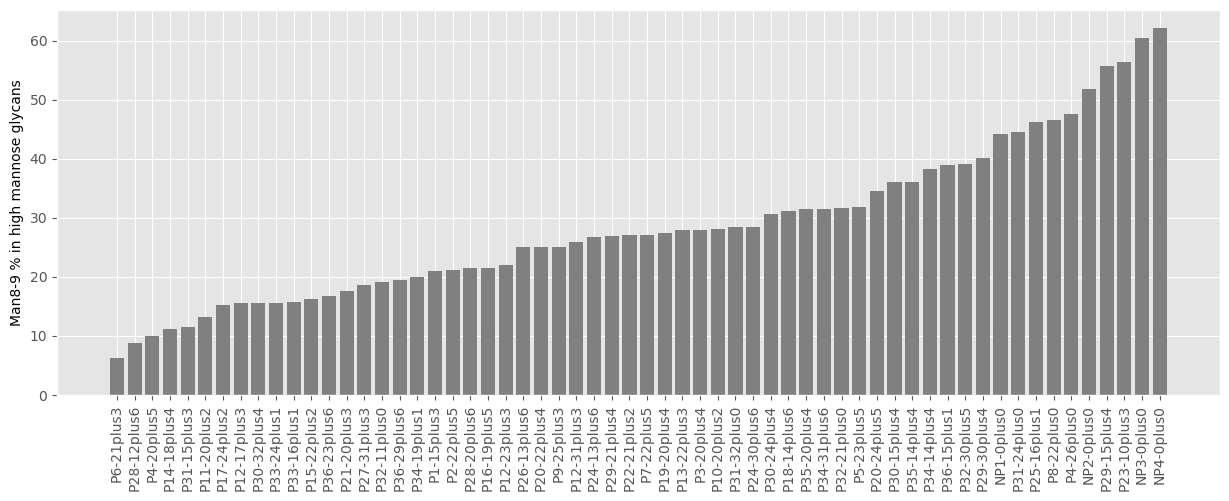

In [20]:
def Man8_9(data=Nglycans().data):

    # Relative intensity   
    total=data['Glycan_type']=='High mannose'
    sub= total & (data['Hex_count'].isin([3,4]))

    Relat_intensity=GeneralSubCalculation(data=data, sub_filt=sub, 
                                      total_filt= total)
    
    
    Relat_intensity.sort_values(by='Relat_intensity',inplace=True)
    plt.figure(figsize=(15,5))
    plt.bar(Relat_intensity.index, Relat_intensity['Relat_intensity'], color='grey')
    plt.xticks(rotation=90)
    plt.ylabel('Man8-9 % in high mannose glycans')
    
Man8_9()
    

## Only sialylated antennae

### Function for correlation analysis

In [21]:
def SiaOnlyNCorrelation(y='MMP', CST_all=True, CST_label=False, 
                     xlabel='N-glycans with only sialylated antennae %'):
    
    # Get the data
    data=Nglycans().data.query('mass>2500 & mass<5000')
    
    # filter
    filt=NglycanGroupFilters(data)
    
    
    # Relative intensity
    sub=(data['dHex_count']==0) & (data['NeuAc_count']>=1) & (filt.complex) 
    total= (data['dHex_count']>=0)

    Relat_intensity=GeneralSubCalculation(data=data, sub_filt=filt.serum, 
                                          total_filt= filt.complex )

    # Merge and plot
    
    if y in ['MMP', 'Complements']:
        Relat_intensity=Relat_intensity.merge(clinical_new, on='Sample_collection', how='inner')
        if (not CST_all):
            Relat_intensity=Relat_intensity.loc[~(Relat_intensity['CST group']=='IV-B or IV-C')]
        if y=='MMP':
            PlotMMPNewCohort(Relat_intensity, CST_label=CST_label, xlabel=xlabel)
        elif y=='Complements':
            PlotComplementsNewCohort(Relat_intensity, CST_label=CST_label, xlabel=xlabel)
    elif y=='Cytokines':
        Relat_intensity=Relat_intensity.merge(clinical_old, on='Sample_collection', how='inner')
        if (not CST_all):
            Relat_intensity=Relat_intensity.loc[~(Relat_intensity['CST group']=='IV-B or IV-C')]
        PlotCytokineOldCohort(Relat_intensity,CST_label=CST_label, xlabel=xlabel)

### Correlation to MMP

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:315: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,i]=data[i].astype('float')


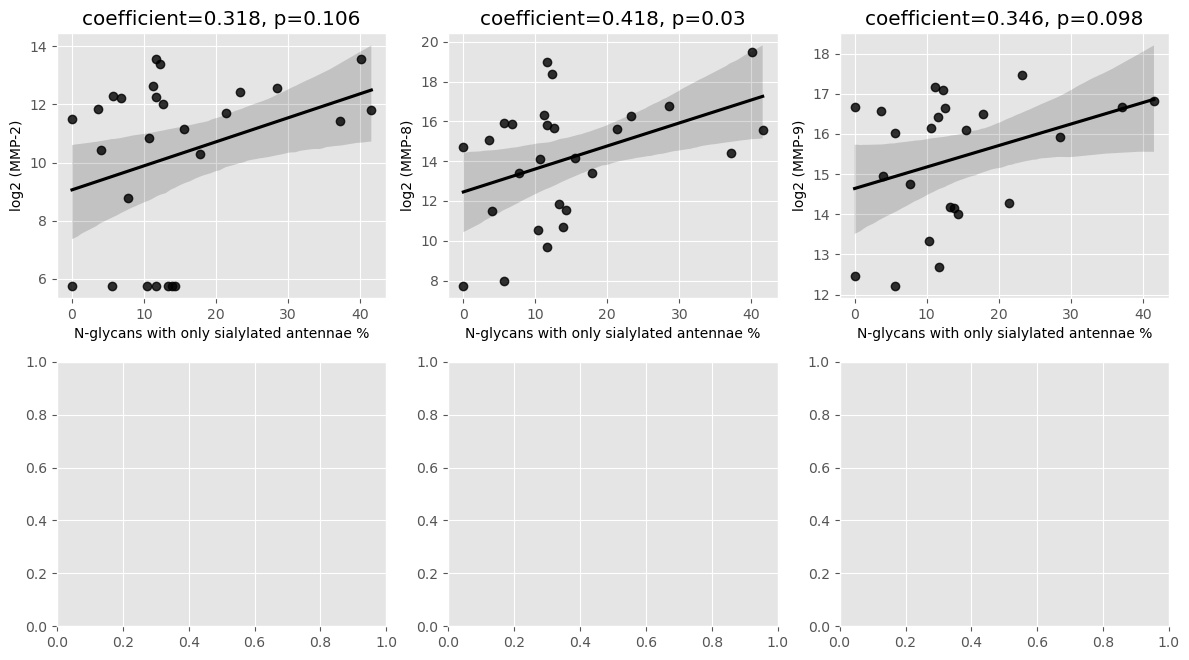

In [22]:
SiaOnlyNCorrelation(y='MMP')

### Correlation to Complements

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()


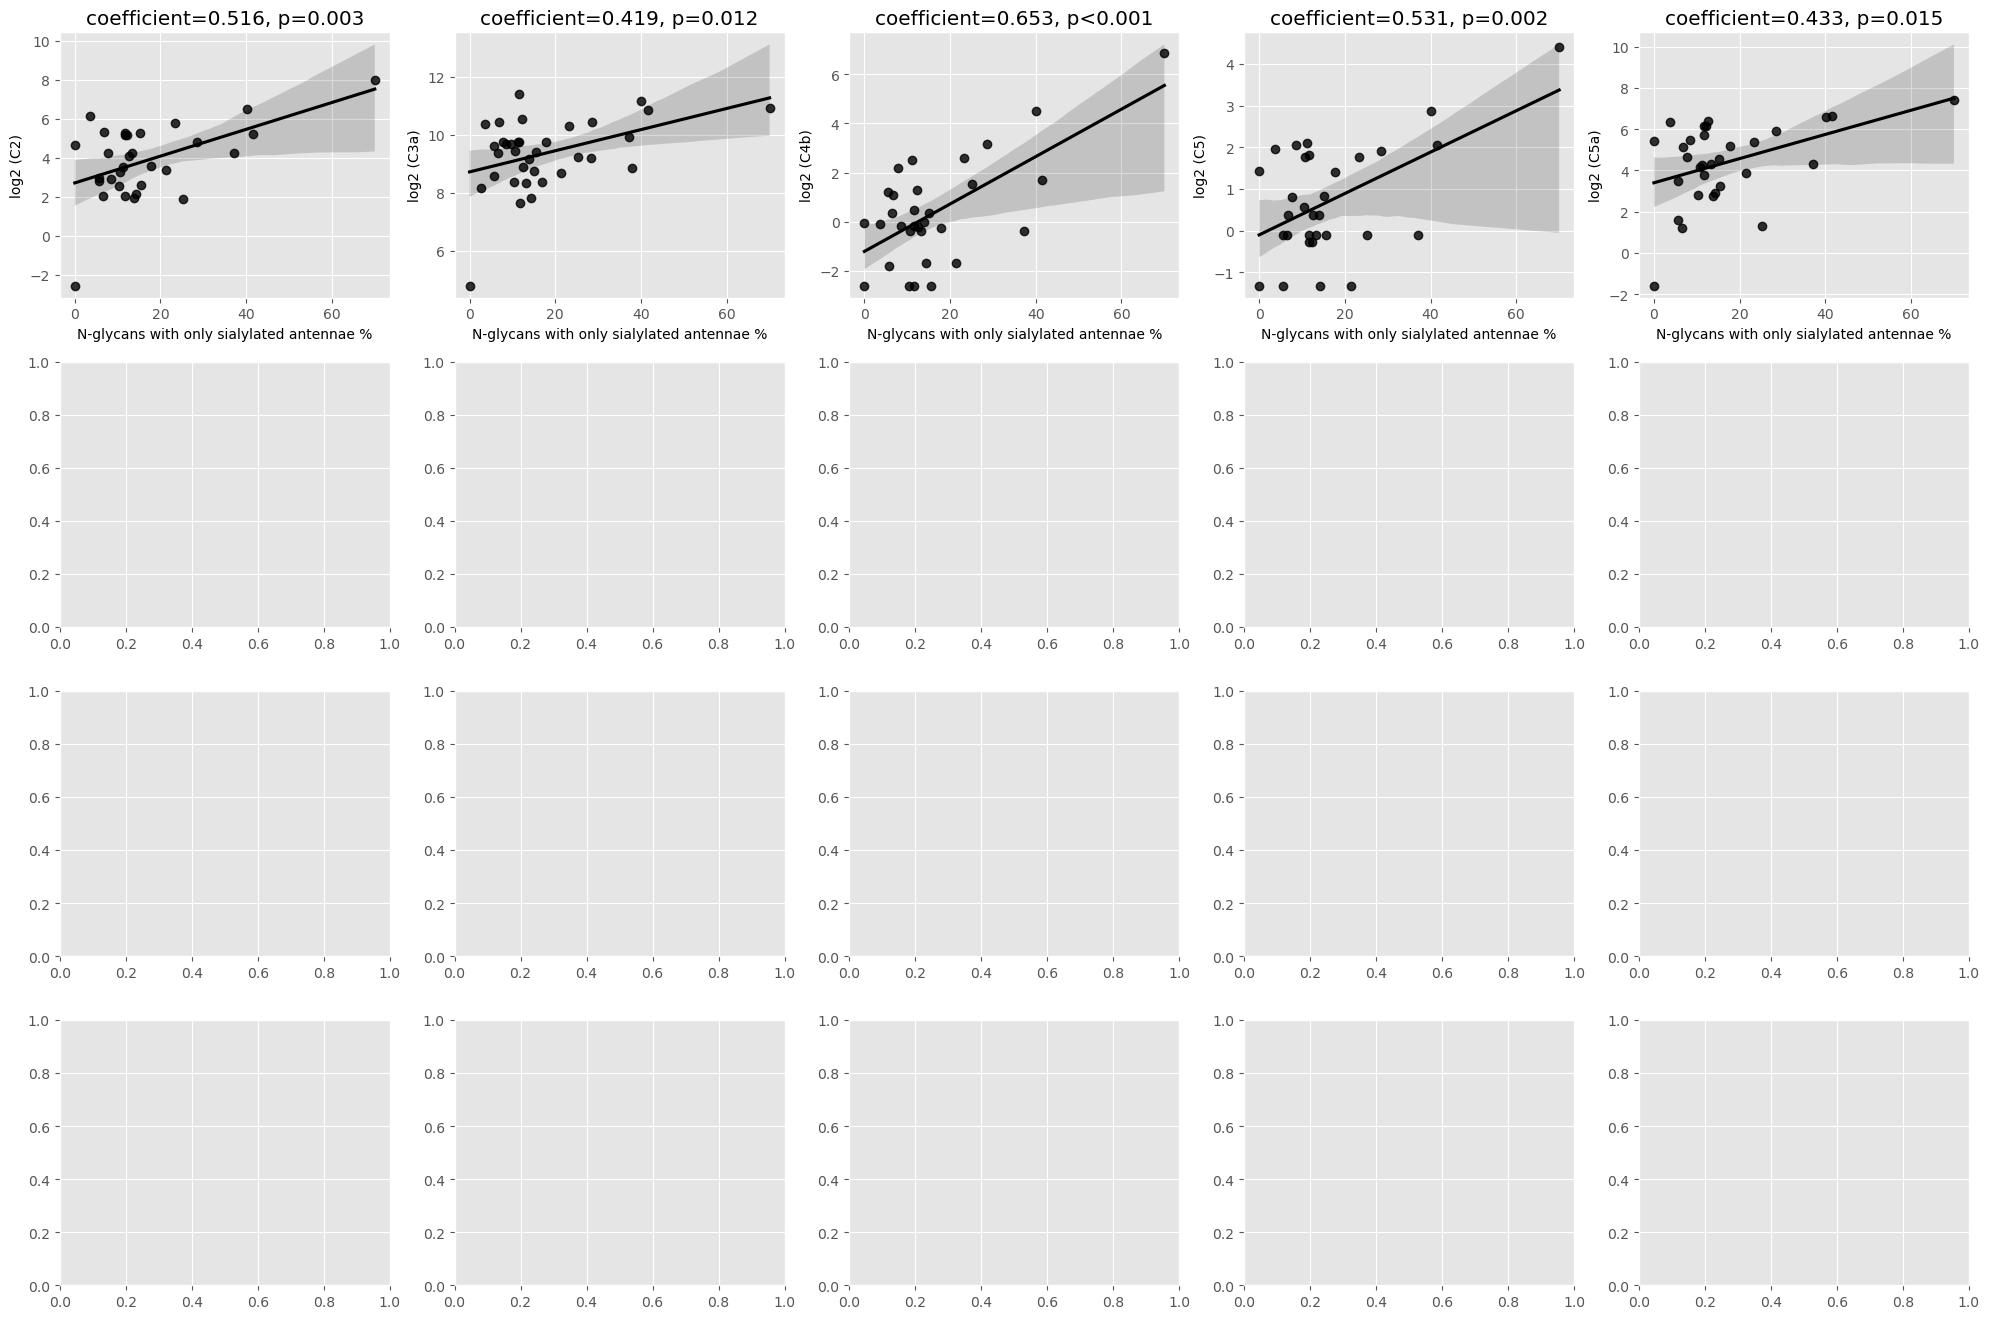

In [23]:
SiaOnlyNCorrelation(y='Complements')

### Correlation to cytokines

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:467: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,i]=data[i].astype('float')
/tm

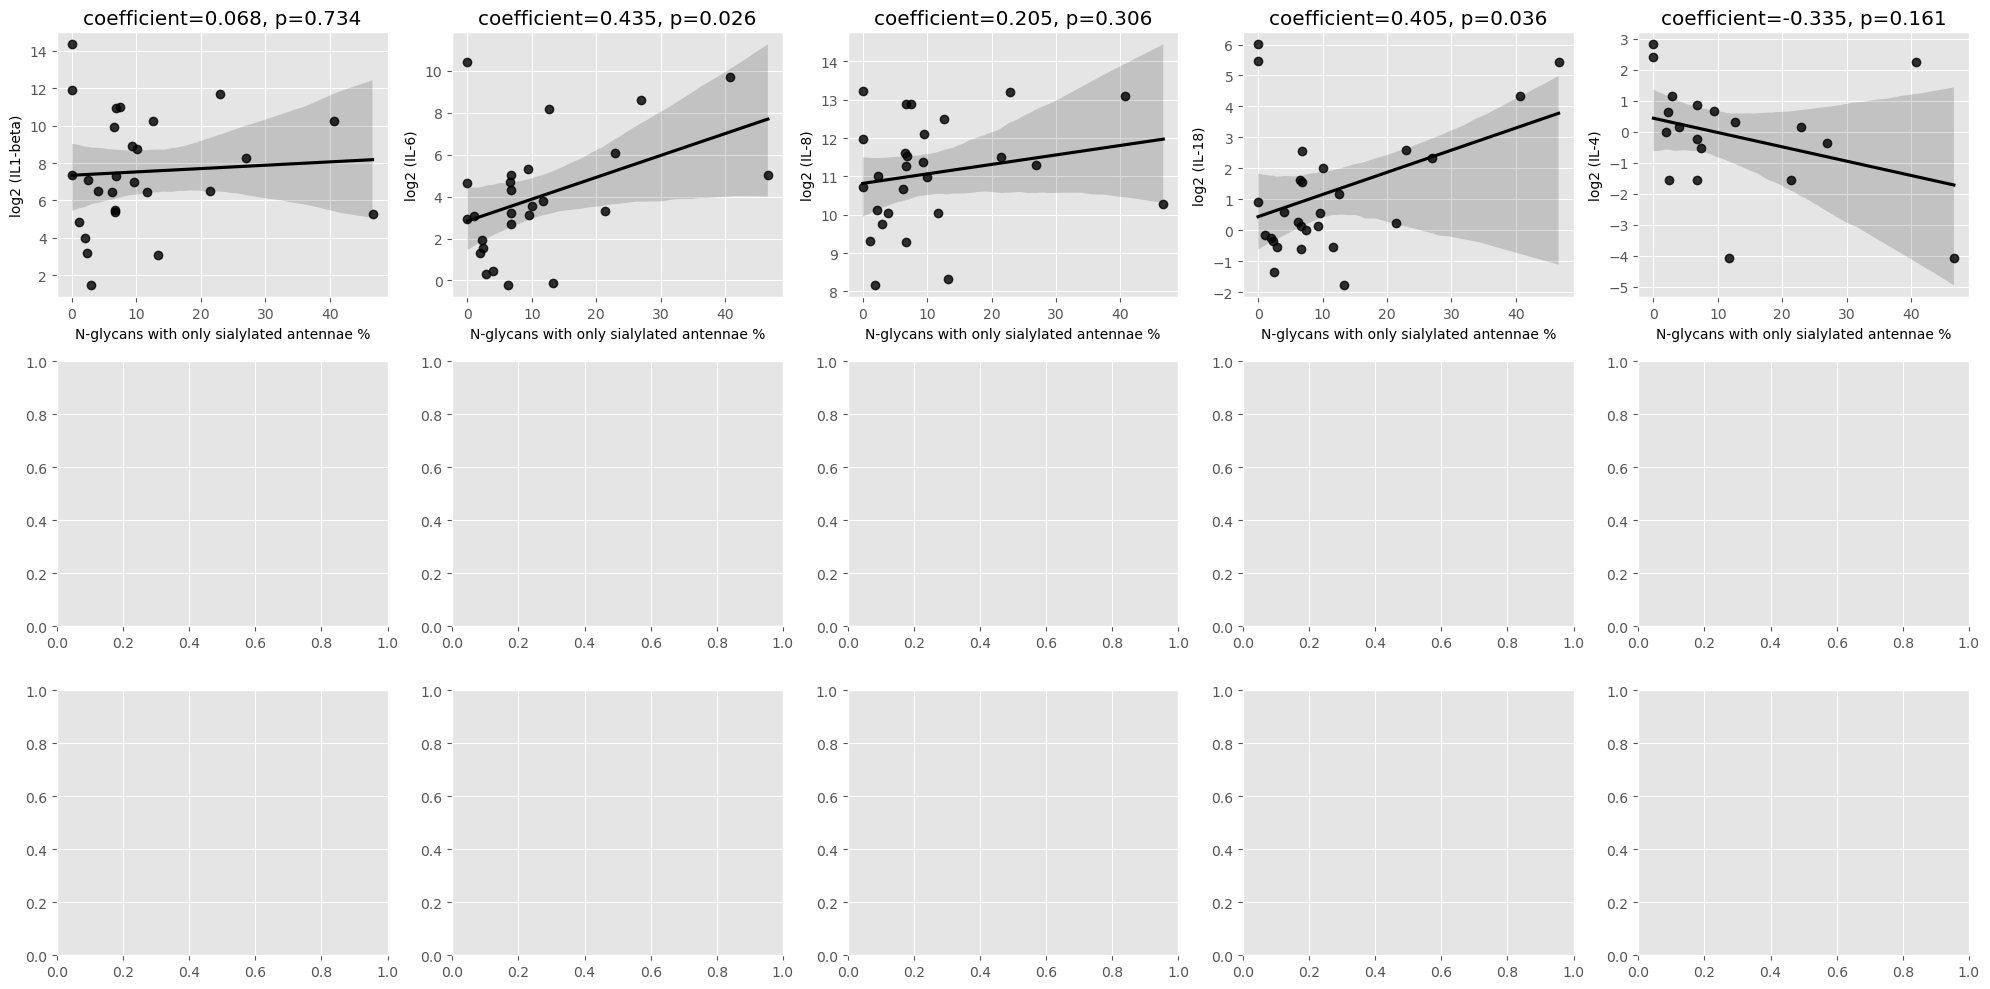

In [24]:
SiaOnlyNCorrelation(y='Cytokines')

## Fucosylated antennae

### Function for correlation analysis

In [25]:
def LewisSLewisNCorrelation(y='MMP', CST_all=True, CST_label=False, 
                     xlabel='N-glycans with fucosylated antennae %'):
    
    # Get the data
    data=Nglycans().data
    
    # filter
    filt=NglycanGroupFilters(data)
    
    # Relative intensity
    sub=(data['dHex_count']>=2)
    total= (filt.complex)

    Relat_intensity=GeneralSubCalculation(data=data, sub_filt=sub, 
                                      total_filt= total)

    # Merge and plot
    
    if y in ['MMP', 'Complements']:
        Relat_intensity=Relat_intensity.merge(clinical_new, on='Sample_collection', how='inner')
        if (not CST_all):
            Relat_intensity=Relat_intensity.loc[~(Relat_intensity['CST group']=='IV-B or IV-C')]
        if y=='MMP':
            PlotMMPNewCohort(Relat_intensity, CST_label=CST_label, xlabel=xlabel)
        elif y=='Complements':
            PlotComplementsNewCohort(Relat_intensity, CST_label=CST_label, xlabel=xlabel)
    elif y=='Cytokines':
        Relat_intensity=Relat_intensity.merge(clinical_old, on='Sample_collection', how='inner')
        if (not CST_all):
            Relat_intensity=Relat_intensity.loc[~(Relat_intensity['CST group']=='IV-B or IV-C')]
        PlotCytokineOldCohort(Relat_intensity,CST_label=CST_label, xlabel=xlabel)

### Correlation to MMP

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:315: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,i]=data[i].astype('float')


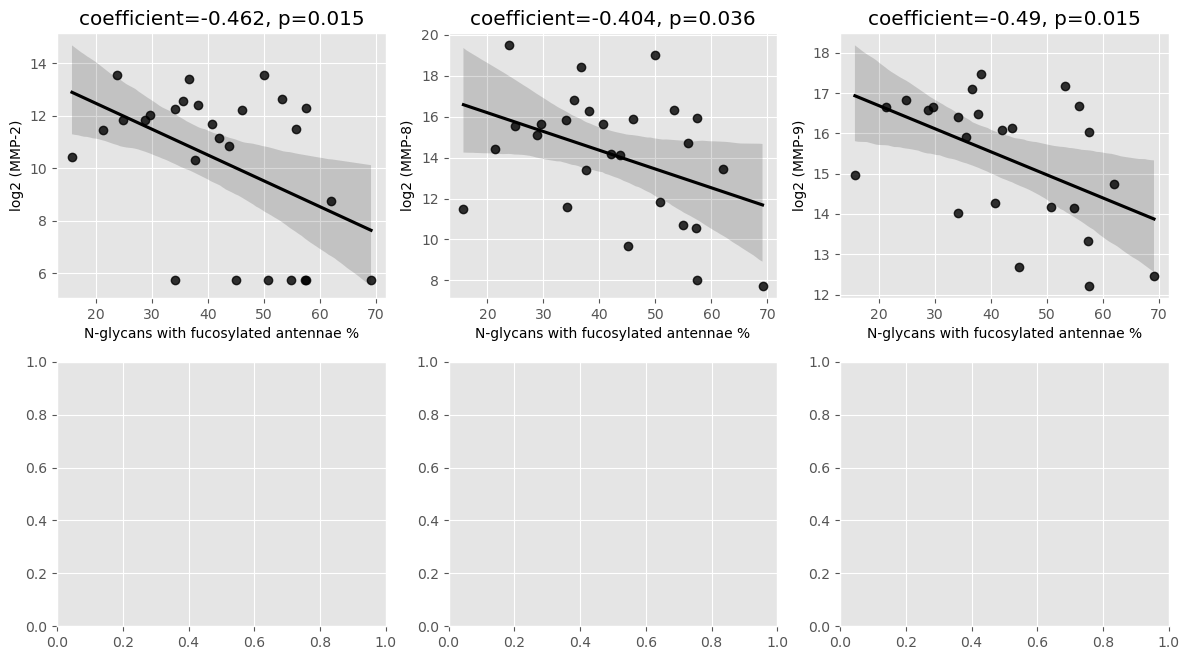

In [26]:
LewisSLewisNCorrelation(y='MMP')

### Correlation to complements

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()


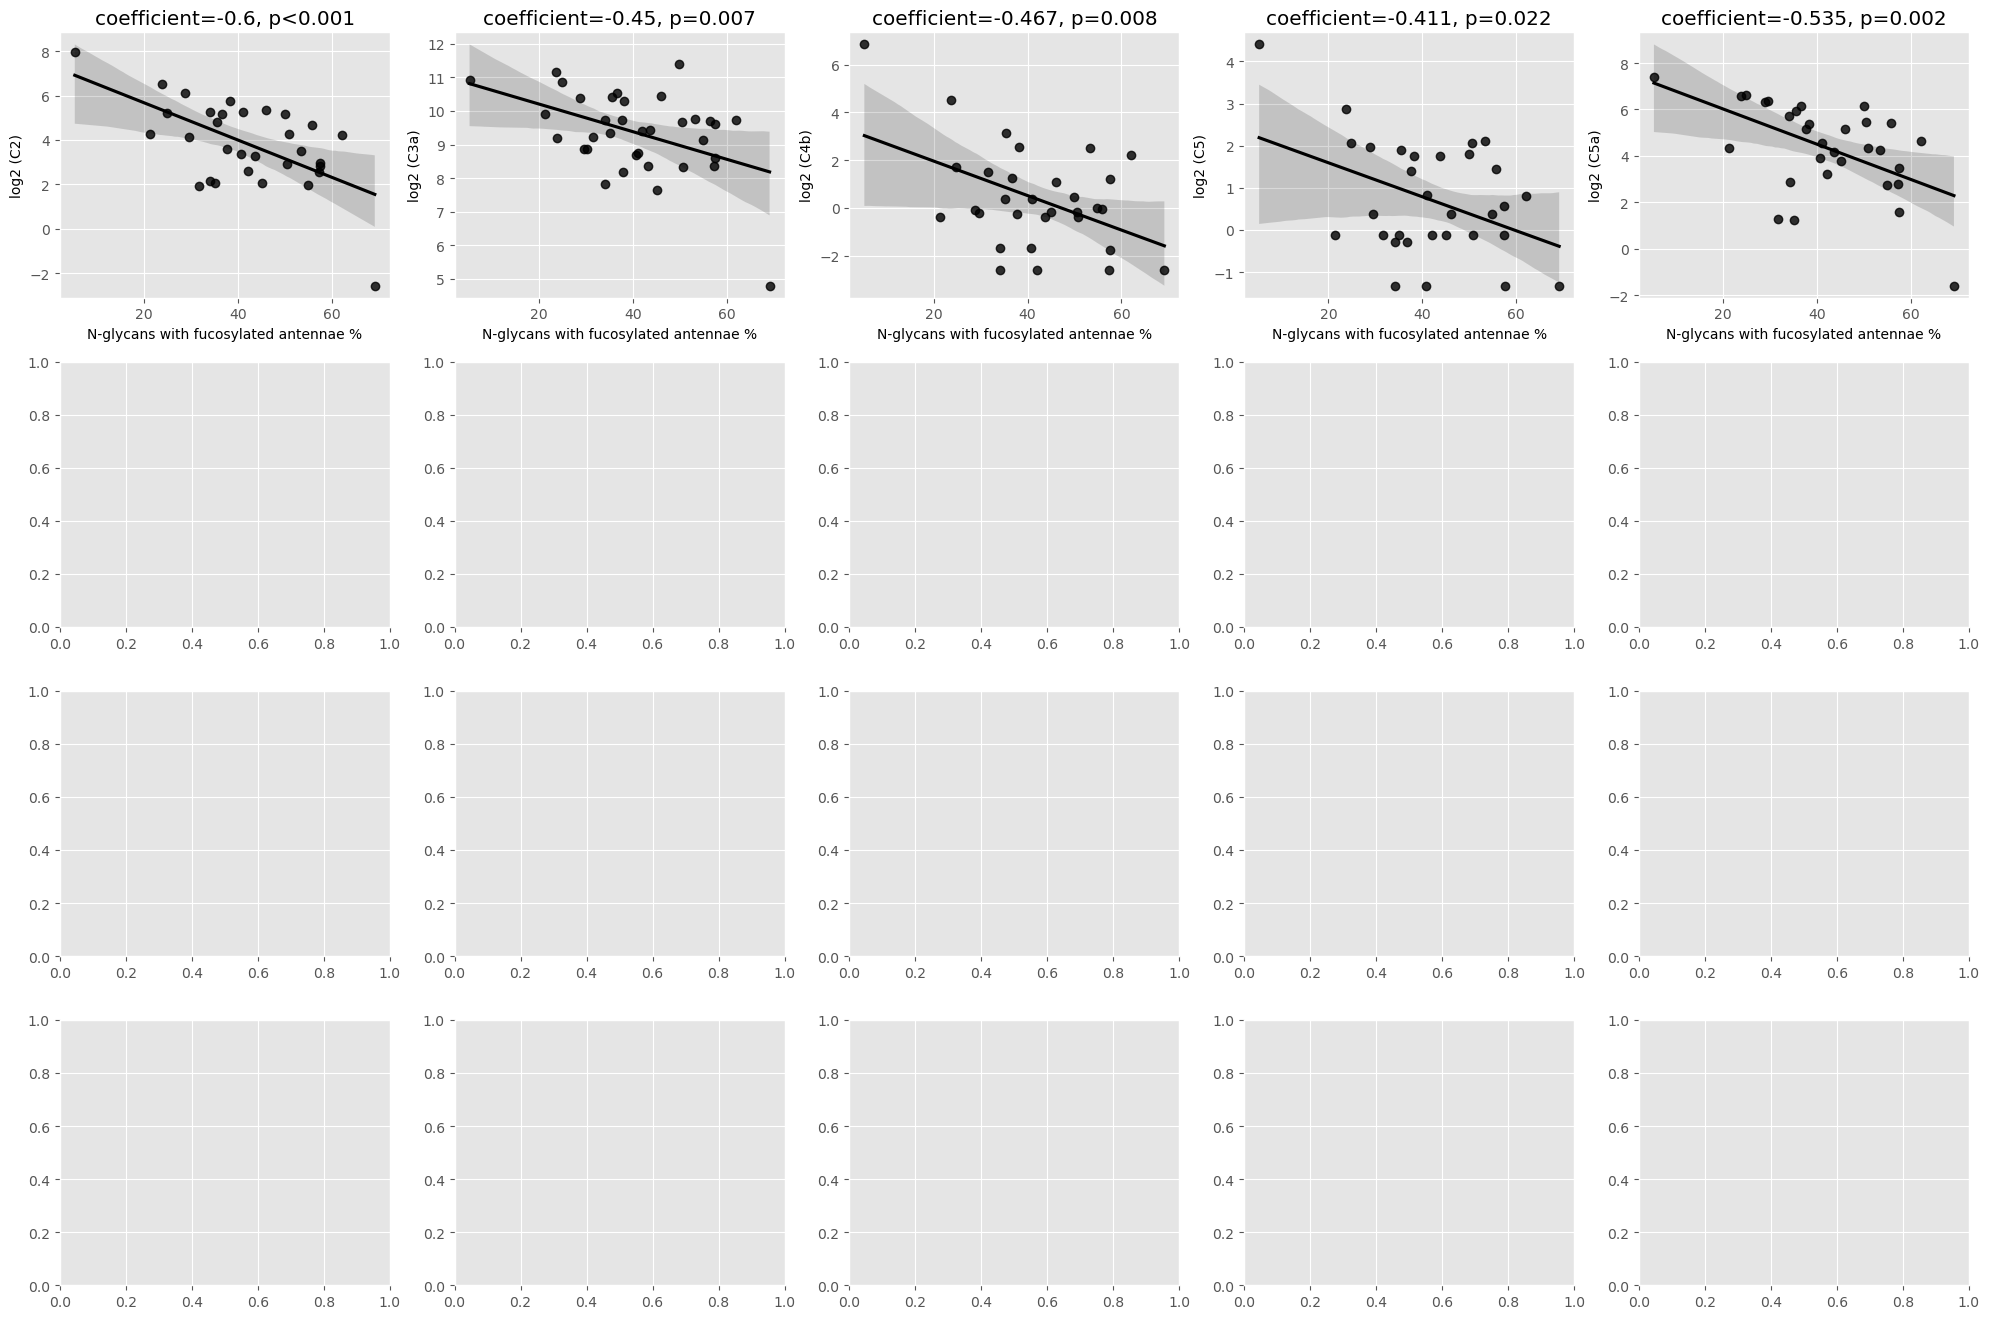

In [27]:
LewisSLewisNCorrelation(y='Complements')

### Correlation to cytokines

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:467: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,i]=data[i].astype('float')
/tm

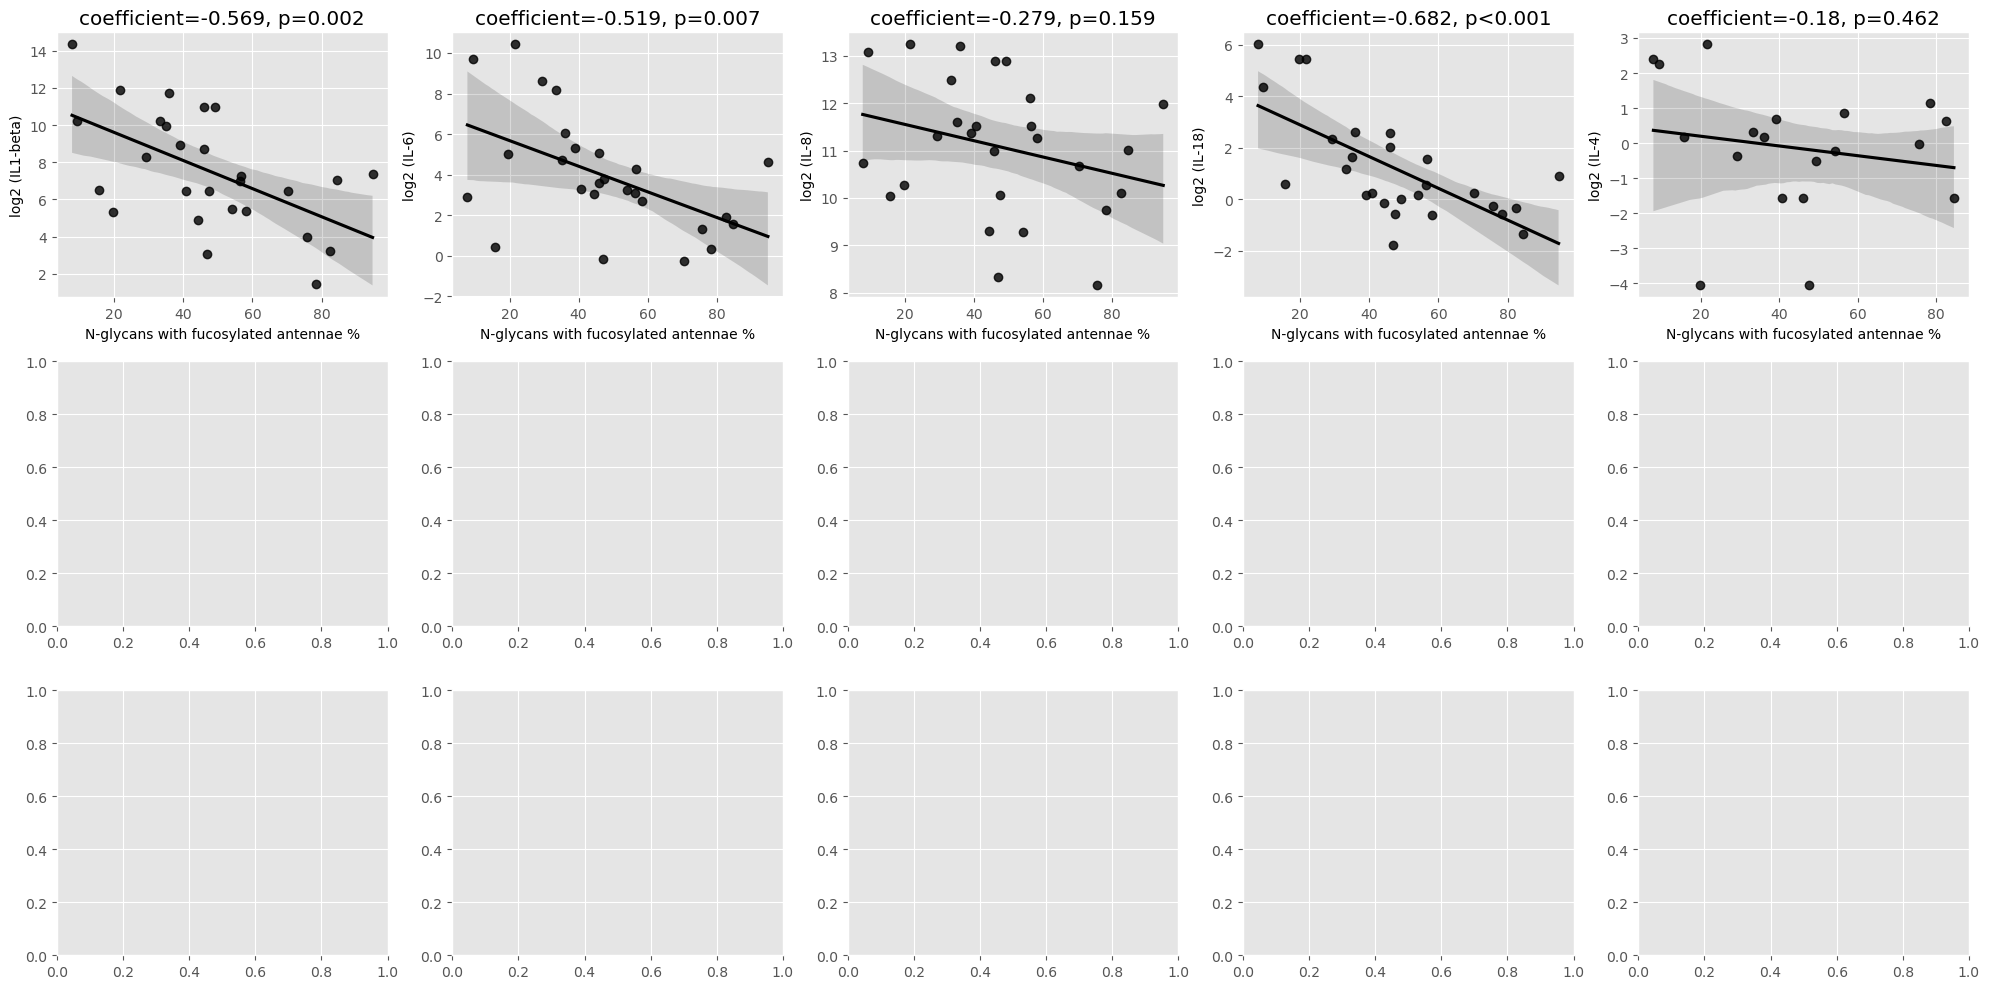

In [28]:
LewisSLewisNCorrelation(y='Cytokines')

## N-glycan profile patterns

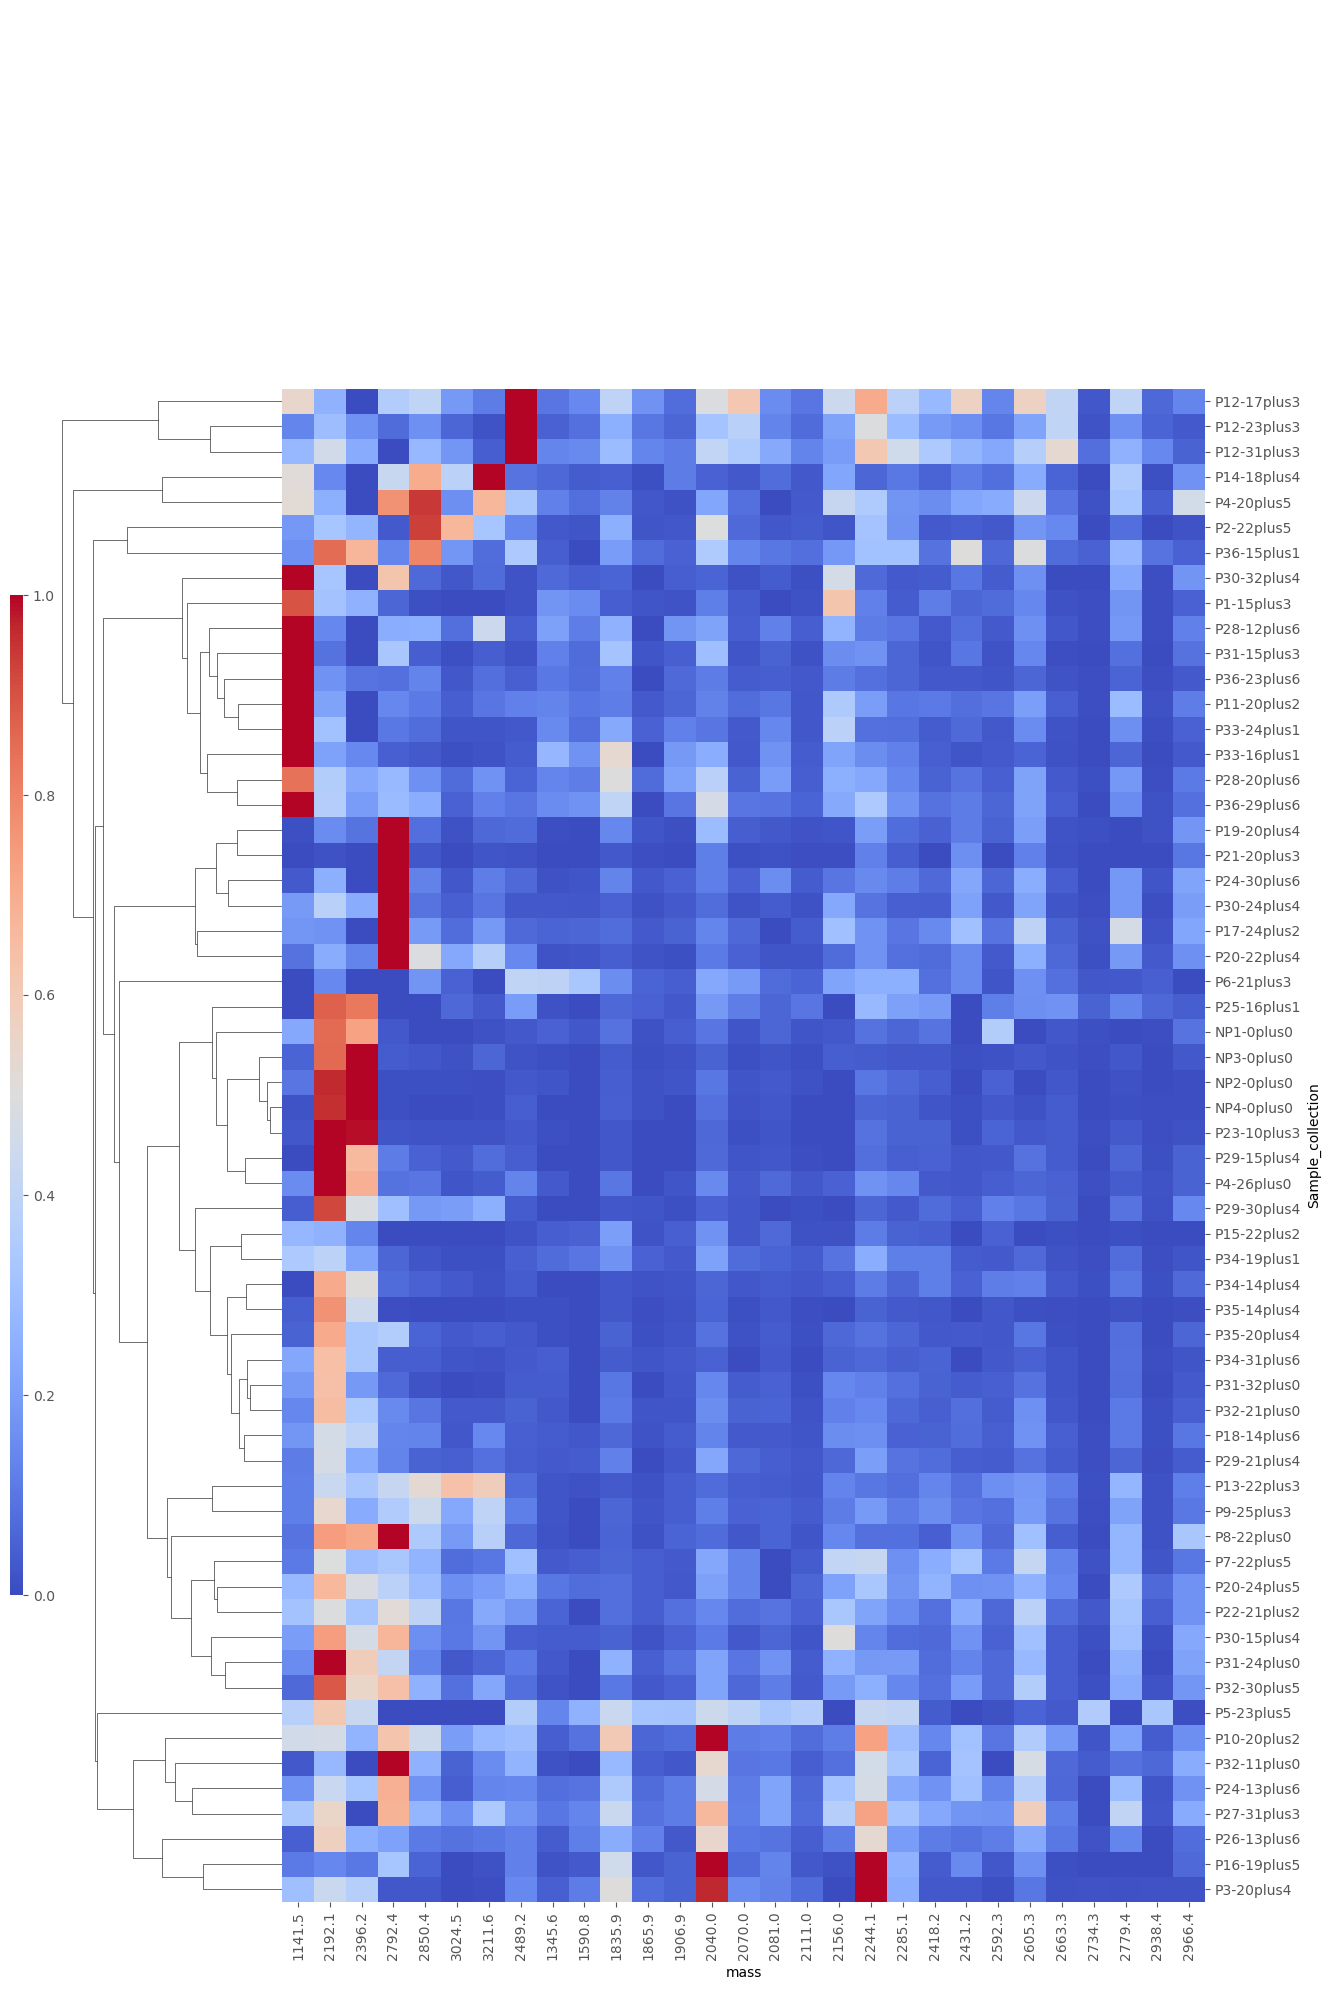

In [29]:
data=Nglycans().data
filt=NglycanGroupFilters(data)
data=data.query('mass>=1000 & mass<=3220')

data=pd.pivot_table(data=data, values='Intensity', index='Sample_collection', columns='mass')

data=data.fillna(0.01)

data=data.div(data.max(axis=1),axis=0)

data=data.drop(columns=[1579.8, 1783.9, 1988.0])


data=data.loc[:,~(((data<=0.3).sum(axis=0))==data.shape[0])] # remove peaks with relative intensity not above 30% in all samples 

data=data[[1141.5, 
           2192.1, 2396.2,
           2792.4,
           2850.4, 3024.5, 3211.6, 2489.2,
           1345.6, 1590.8, 1835.9, 1865.9, 1906.9, 2040.0, 2070.0,
           2081.0, 2111.0, 2156.0,  2244.1, 2285.1,  2418.2,
           2431.2, 2592.3, 2605.3, 2663.3, 2734.3, 2779.4, 
           2938.4, 2966.4]]

cmap = sb.color_palette('coolwarm', as_cmap=True)

sb.clustermap(data, cmap=cmap, figsize=(13,20), method='average', col_cluster=False, 
              cbar_pos=(-0.02,0.2,0.01,0.5))

plt.show()


## LacdiNAc structures

### Function for correlation analysis 

In [30]:
def LacdiNAcCorrelation(y='MMP', CST_all=True, CST_label=False, xlabel='LacdiNAc %'):
    # Data
    data=Nglycans().data

    # Relative intensity
    filt=NglycanGroupFilters(data)
    sub=data['Glycan_type'].str.contains('LacdiNAc')
    total= sub | (  (data['NeuAc_count']>=1) & (data['dHex_count']==0)  ) 

    Relat_intensity=GeneralSubCalculation(data=data, sub_filt=sub, 
                                          total_filt= total )
    
    # Merge and plot
    
    if y in ['MMP', 'Complements']:
        Relat_intensity=Relat_intensity.merge(clinical_new, on='Sample_collection', how='inner')
        if (not CST_all):
            Relat_intensity=Relat_intensity.loc[~(Relat_intensity['CST group']=='IV-B or IV-C')]
        if y=='MMP':
            PlotMMPNewCohort(Relat_intensity, CST_label=CST_label, xlabel=xlabel)
        elif y=='Complements':
            PlotComplementsNewCohort(Relat_intensity, CST_label=CST_label, xlabel=xlabel)
    elif y=='Cytokines':
        Relat_intensity=Relat_intensity.merge(clinical_old, on='Sample_collection', how='inner')
        if (not CST_all):
            Relat_intensity=Relat_intensity.loc[~(Relat_intensity['CST group']=='IV-B or IV-C')]
        PlotCytokineOldCohort(Relat_intensity,CST_label=CST_label, xlabel=xlabel)

### Correlation to MMP

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:315: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,i]=data[i].astype('float')


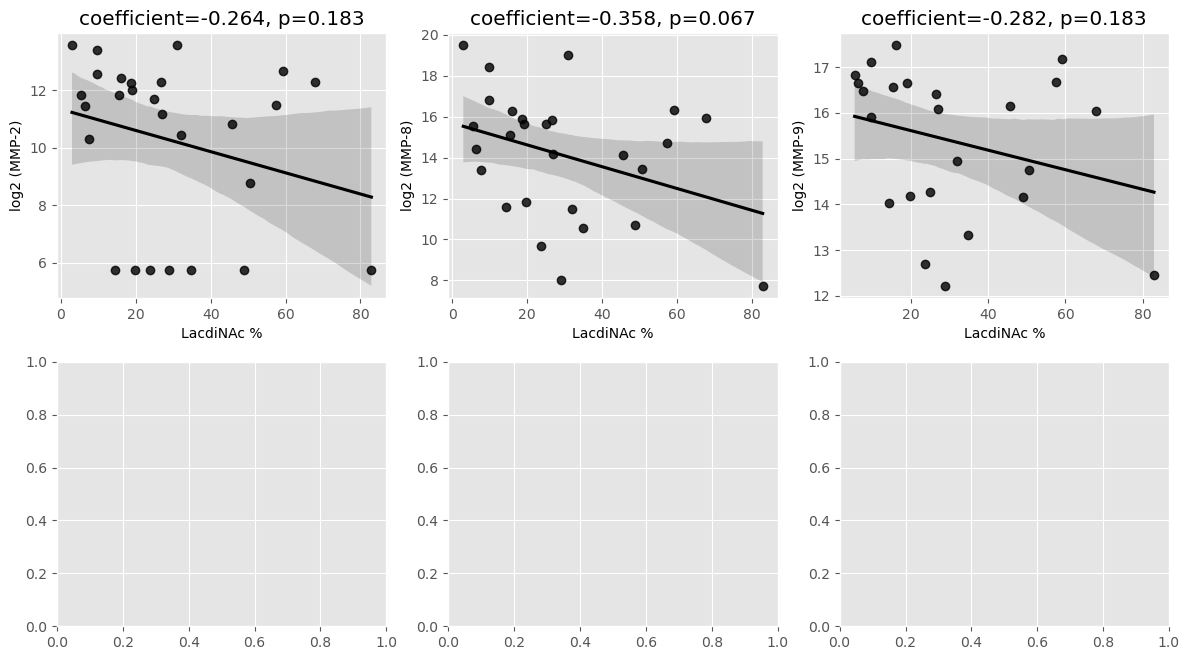

In [31]:
LacdiNAcCorrelation(y='MMP', CST_all=True, CST_label=False)

### Correlation to complements

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()


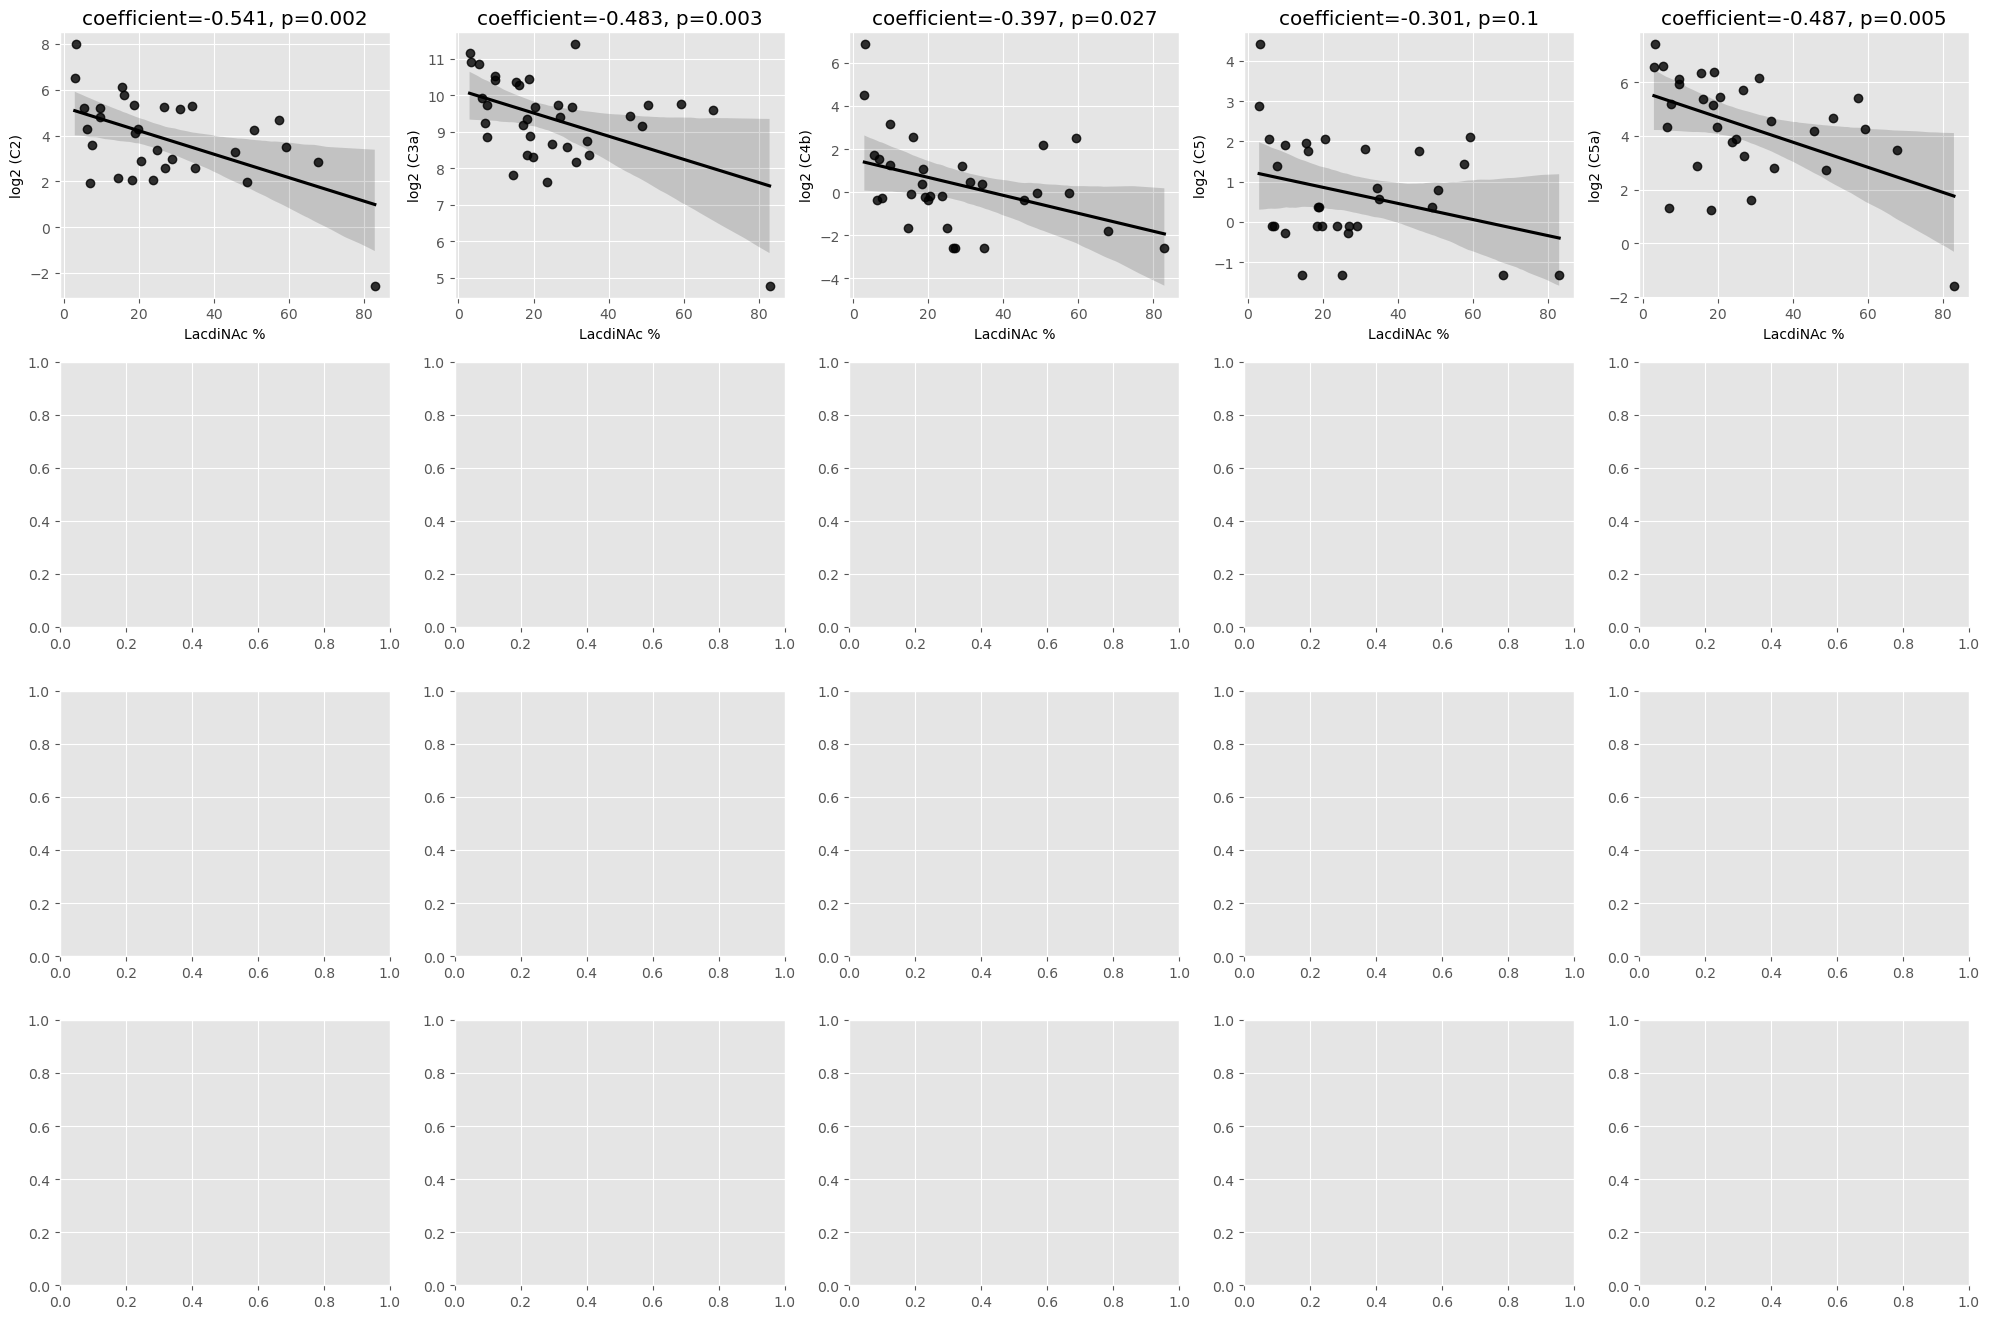

In [32]:
LacdiNAcCorrelation(y='Complements', CST_all=True, CST_label=False)

### Correlation to cytokines

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:467: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,i]=data[i].astype('float')
/tm

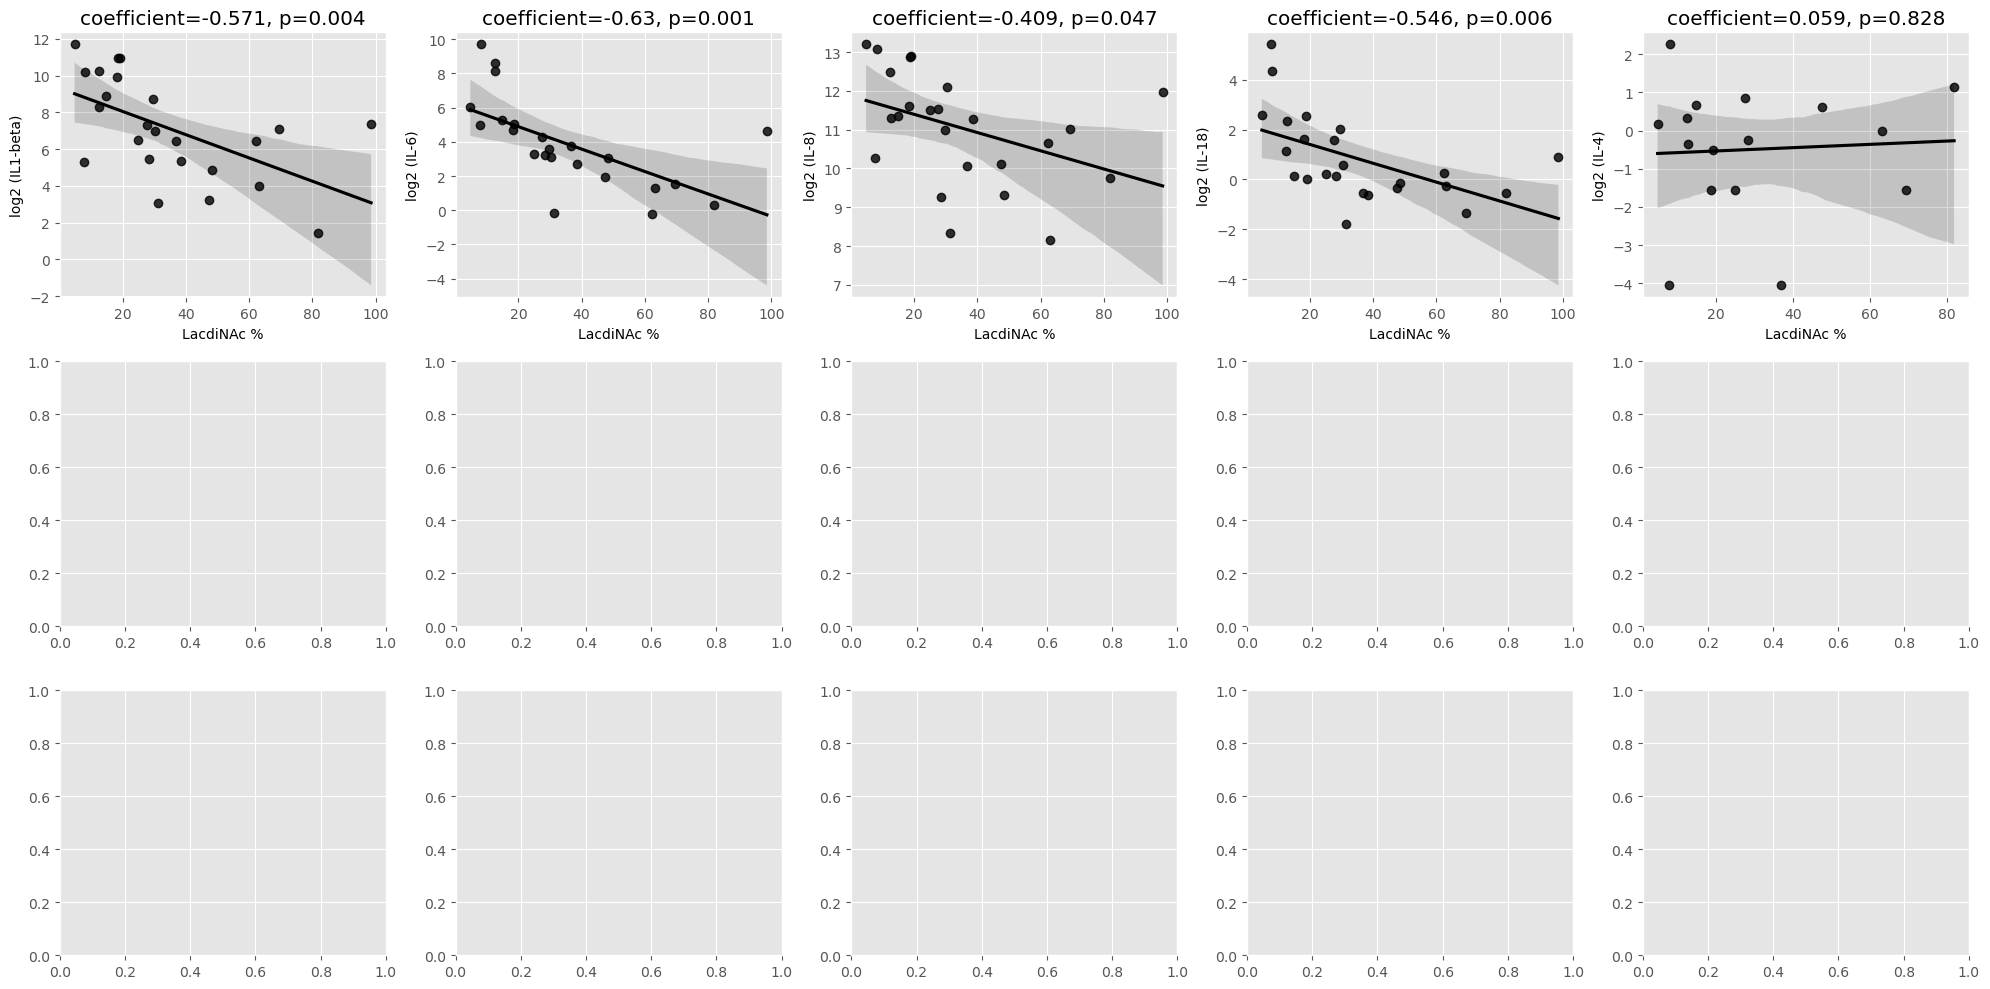

In [33]:
LacdiNAcCorrelation(y='Cytokines', CST_all=False, CST_label=False)

## Blood Group A

### Function for correlation analysis

In [34]:
def BloodANCorrelation(y='MMP', CST_all=True, CST_label=False, xlabel='Blood group A in N-glycans %'):
    # Data
    data=Nglycans().data

    # Relative intensity
    filt=NglycanGroupFilters(data)
    sub=filt.blood_A
    total=filt.complex

    Relat_intensity=GeneralSubCalculation(data=data, sub_filt=sub, total_filt= (filt.complex) & (~filt.bisec) & (~filt.serum) )
    
    # Merge and plot
    
    if y in ['MMP', 'Complements']:
        Relat_intensity=Relat_intensity.merge(clinical_new.loc[clinical_new['Blood Group']=='A'], 
                                              on='Sample_collection', how='inner')
        if (not CST_all):
            Relat_intensity=Relat_intensity.loc[~(Relat_intensity['CST group']=='IV-B or IV-C')]
        if y=='MMP':
            PlotMMPNewCohort(Relat_intensity, CST_label=CST_label, xlabel=xlabel)
        elif y=='Complements':
            PlotComplementsNewCohort(Relat_intensity, CST_label=CST_label, xlabel=xlabel)
    elif y=='Cytokines':
        Relat_intensity=Relat_intensity.merge(clinical_old.loc[clinical_old['Blood group']=='A'], 
                                              on='Sample_collection', how='inner')
        if (not CST_all):
            Relat_intensity=Relat_intensity.loc[~(Relat_intensity['CST group']=='IV-B or IV-C')]
        PlotCytokineOldCohort(Relat_intensity,CST_label=CST_label, xlabel=xlabel)

### Correlation to MMP

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:315: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,i]=data[i].astype('float')


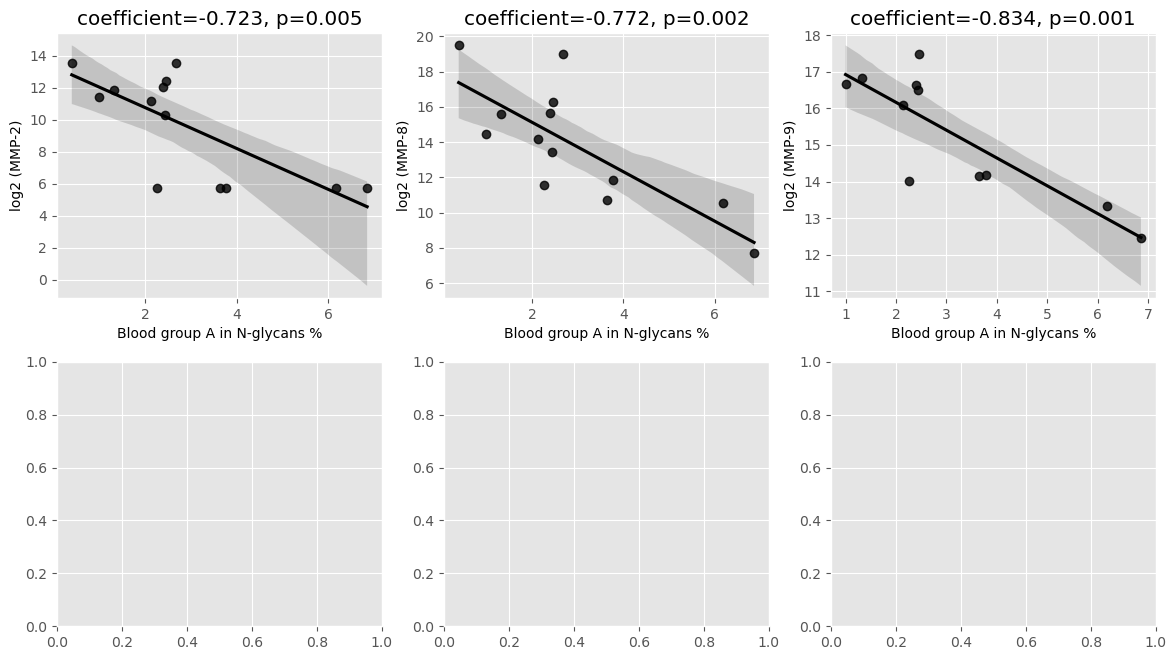

In [35]:
BloodANCorrelation(y='MMP')

### Correlation to Complements

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()


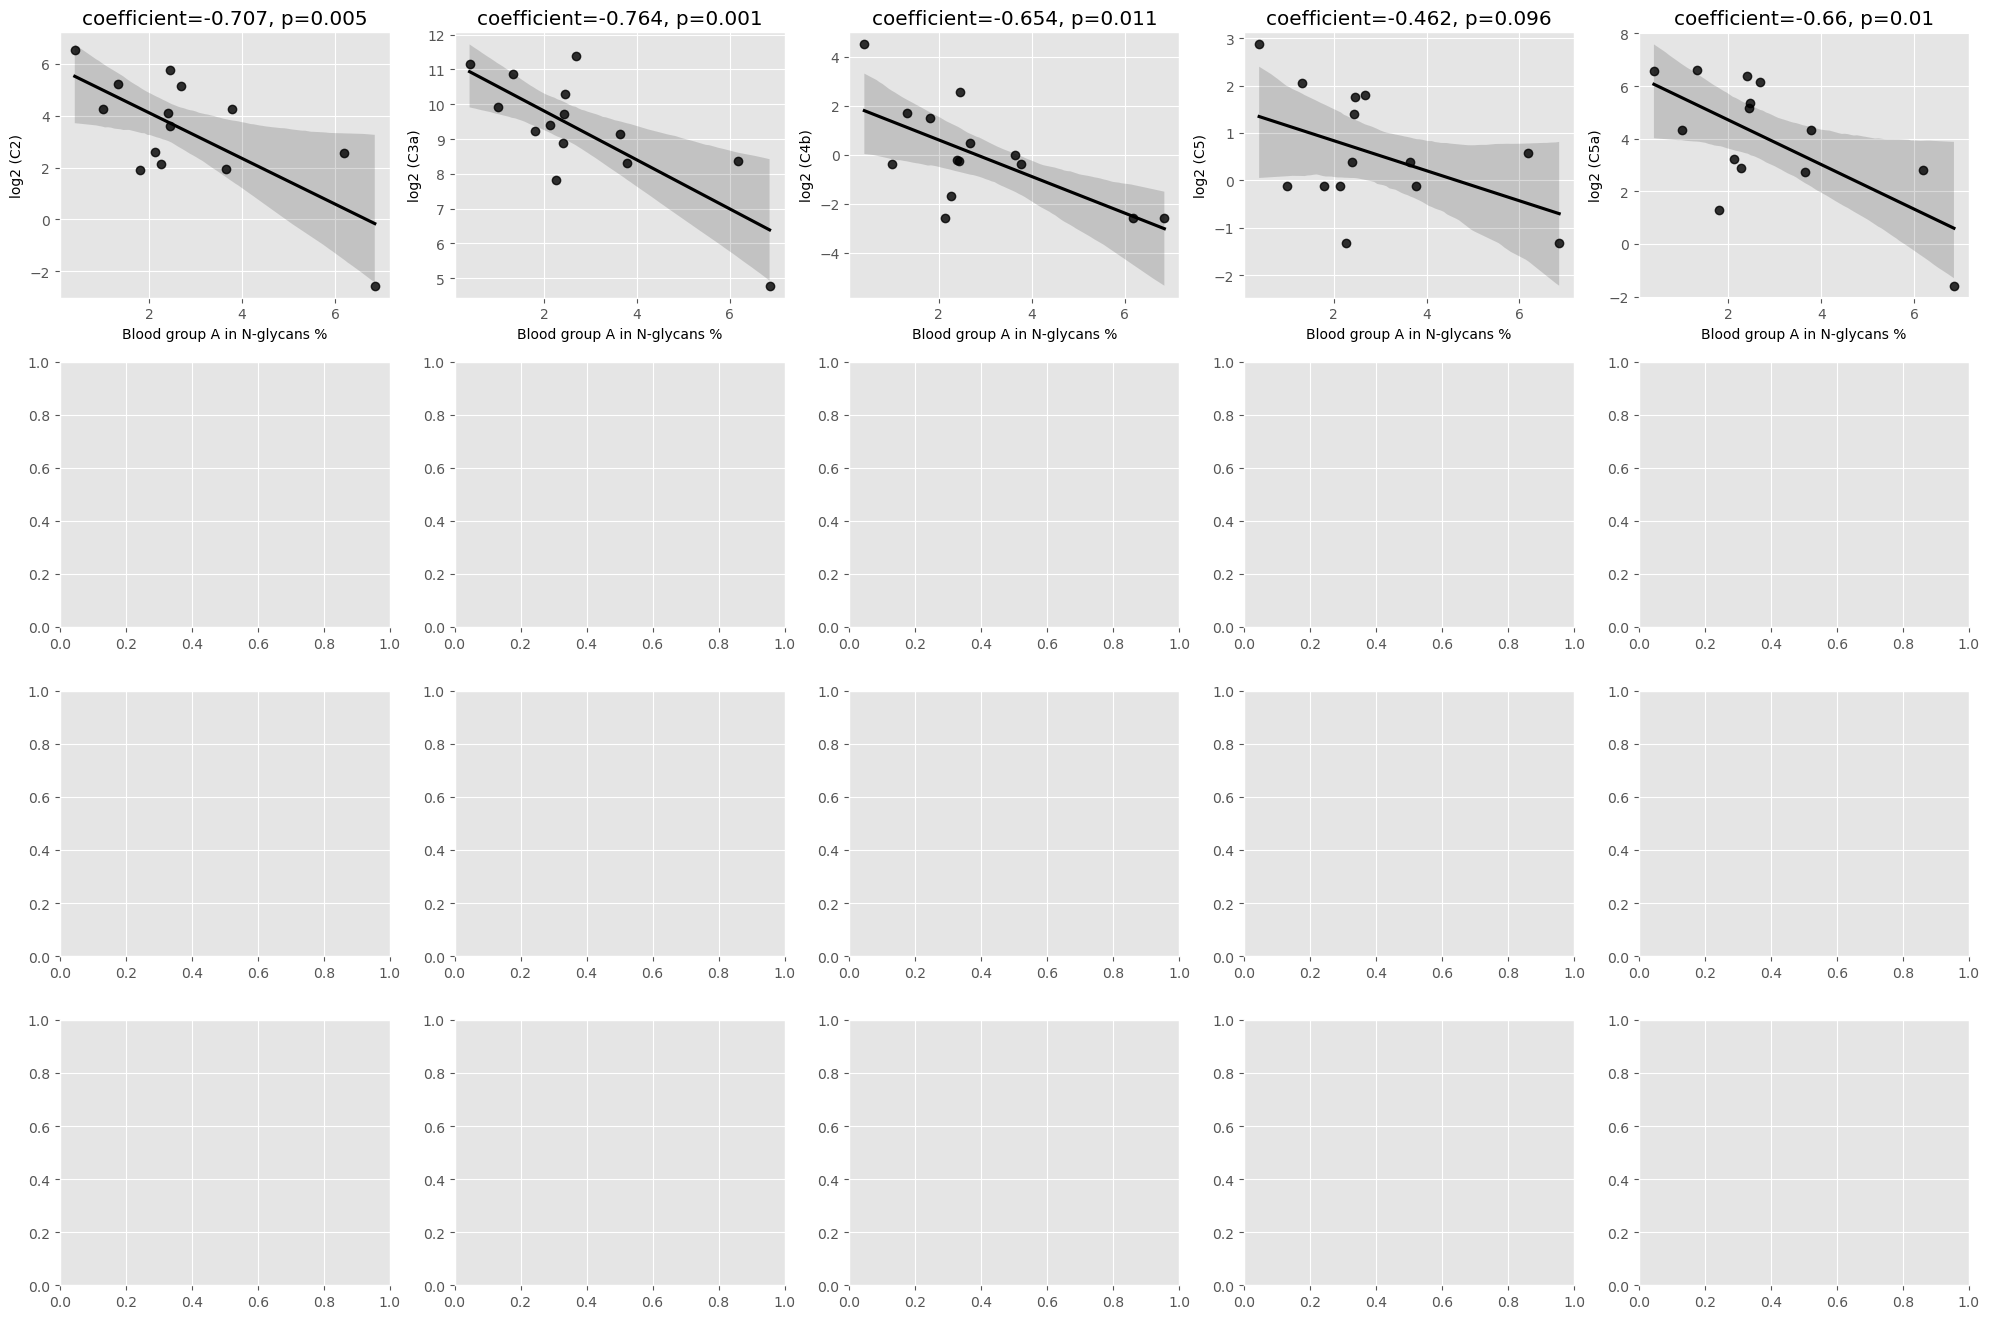

In [36]:
BloodANCorrelation(y='Complements')

### Correlation to cytokines

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:467: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,i]=data[i].astype('float')
/tm

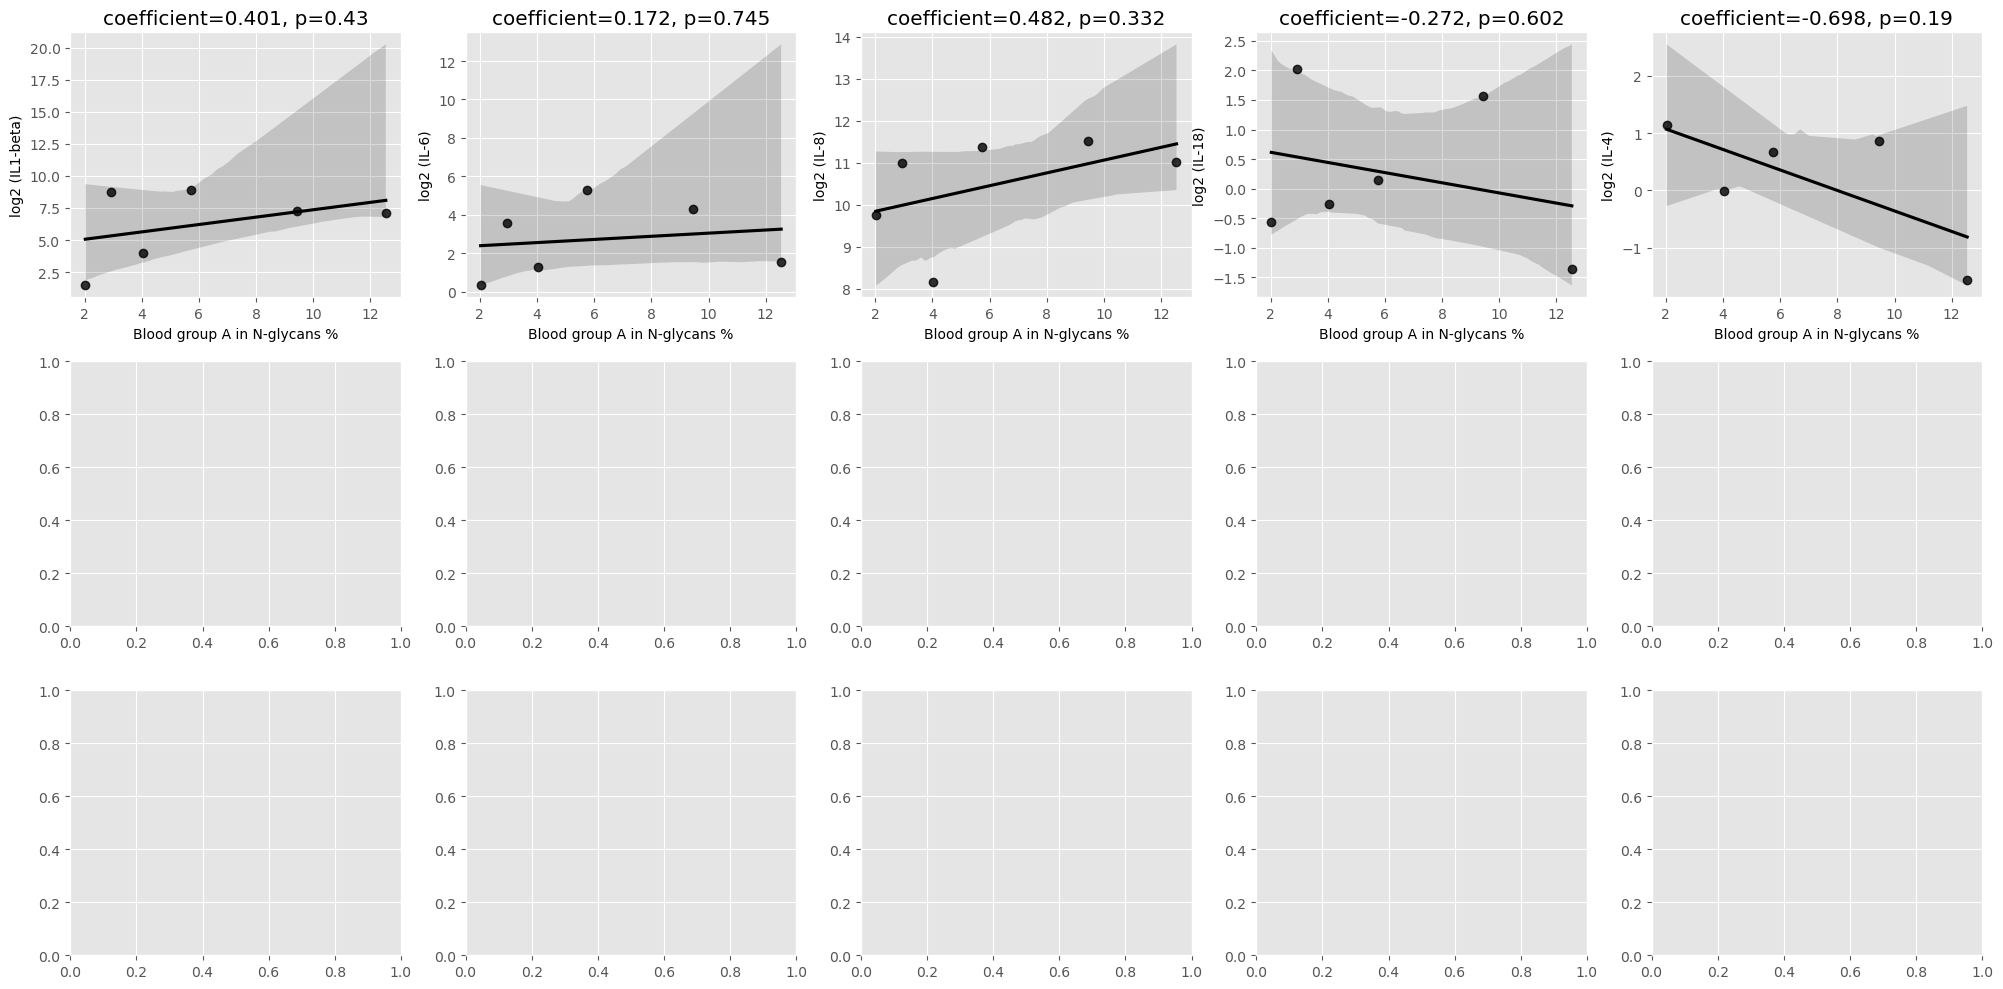

In [37]:
BloodANCorrelation(y='Cytokines')

## Blood group B

### Function for correlation analysis

In [38]:
def BloodBNCorrelation(y='MMP', CST_all=True, CST_label=False, xlabel='Blood group B on N-glycans %'):
    # Data
    data=Nglycans().data

    # Relative intensity
    filt=NglycanGroupFilters(data)
    
    sub=filt.blood_B
    total=filt.complex
    
    Relat_intensity=GeneralSubCalculation(data=data, sub_filt=sub, 
                                          total_filt= total)
    
    
    
    # Merge and plot
    
    if y in ['MMP', 'Complements']:
        Relat_intensity=Relat_intensity.merge(clinical_new.loc[clinical_new['Blood Group']=='B'], 
                                              on='Sample_collection', how='inner')
        if (not CST_all):
            Relat_intensity=Relat_intensity.loc[~(Relat_intensity['CST group']=='IV-B or IV-C')]
        if y=='MMP':
            PlotMMPNewCohort(Relat_intensity, CST_label=CST_label, xlabel=xlabel)
        elif y=='Complements':
            PlotComplementsNewCohort(Relat_intensity, CST_label=CST_label, xlabel=xlabel)
    elif y=='Cytokines':
        Relat_intensity=Relat_intensity.merge(clinical_old.loc[clinical_old['Blood group']=='B'], 
                                              on='Sample_collection', how='inner')
        if (not CST_all):
            Relat_intensity=Relat_intensity.loc[~(Relat_intensity['CST group']=='IV-B or IV-C')]
        PlotCytokineOldCohort(Relat_intensity,CST_label=CST_label, xlabel=xlabel)

### Correlation to complement factors

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()


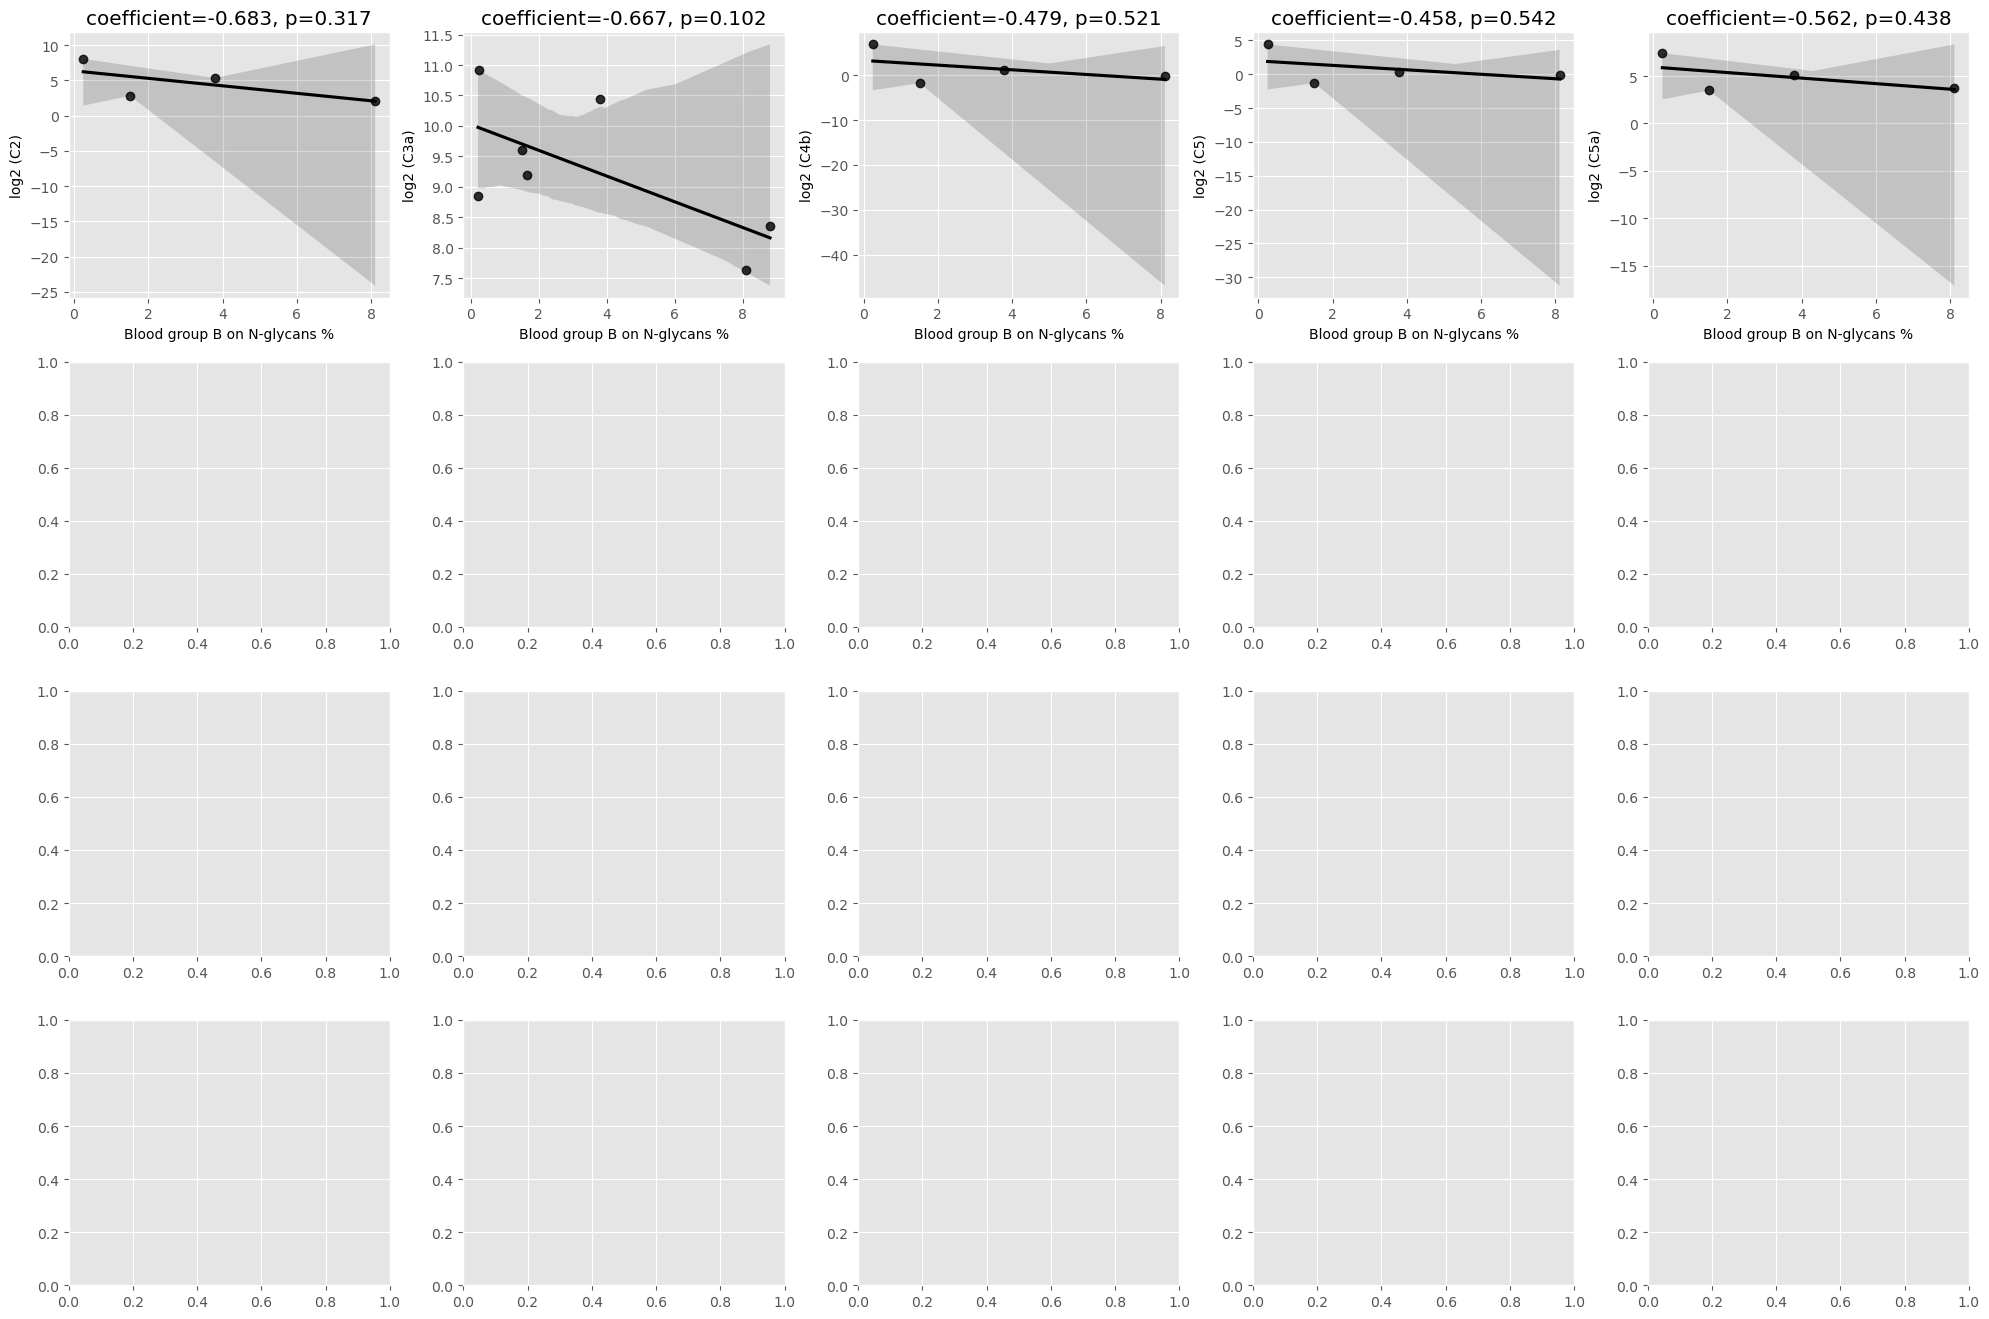

In [39]:
BloodBNCorrelation(y='Complements')

### Correlation to cytokines

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:467: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,i]=data[i].astype('float')
/tm

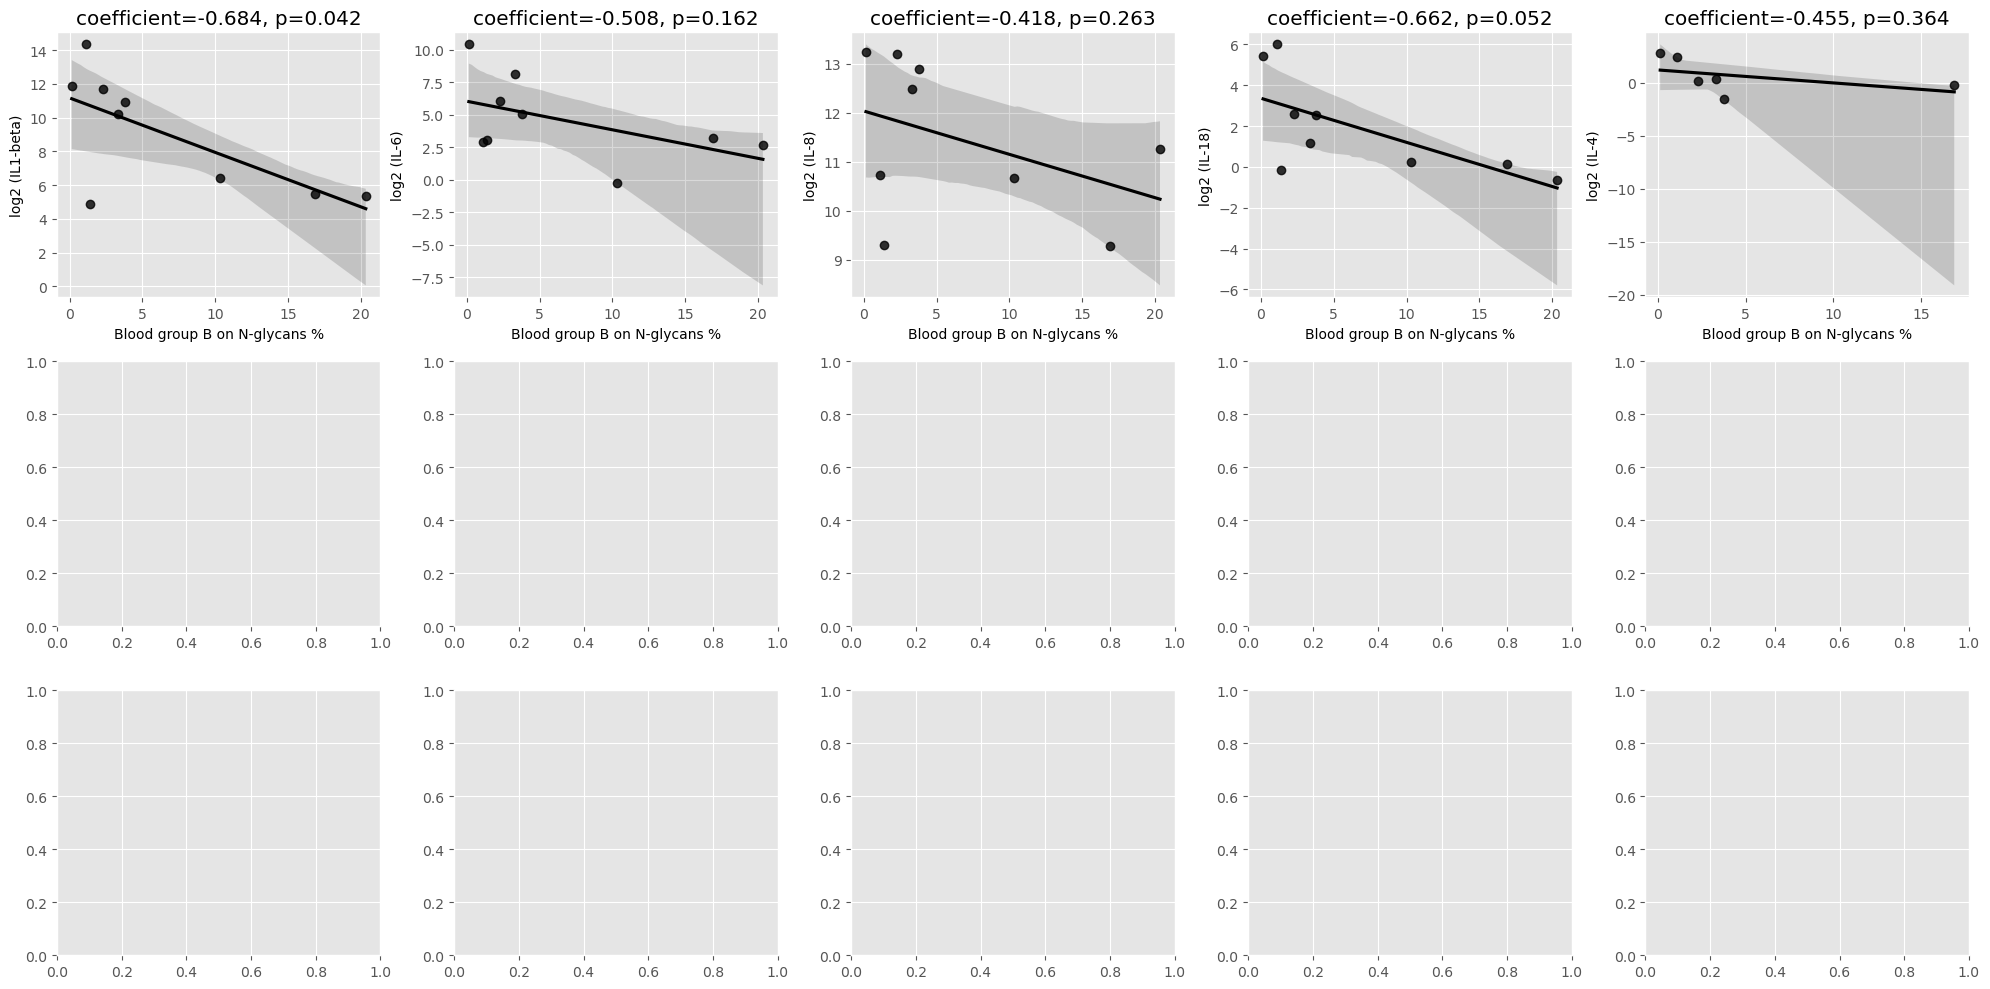

In [40]:
BloodBNCorrelation(y='Cytokines')

# O-glycans

## Only sialylated antennae

### Function for correlation analysis

In [41]:
def SiaOnlyOCorrelation(y='MMP', CST_all=True, CST_label=False, 
                     xlabel='O-glycans with only sialylated antennae %'):
    
    # Get the data
    data=Oglycans().data
    
    # Relative intensity
    sub=(data['NeuAc_count']>=1) &  (data['dHex_count']==0)
    total= (data['NeuAc_count']>=0) 

    Relat_intensity=GeneralSubCalculation(data=data, sub_filt=sub, 
                                                     total_filt= total )
    
    # Merge and plot
    
    if y in ['MMP', 'Complements']:
        Relat_intensity=Relat_intensity.merge(clinical_new, on='Sample_collection', how='inner')
        if (not CST_all):
            Relat_intensity=Relat_intensity.loc[~(Relat_intensity['CST group']=='IV-B or IV-C')]
        if y=='MMP':
            PlotMMPNewCohort(Relat_intensity, CST_label=CST_label, xlabel=xlabel)
        elif y=='Complements':
            PlotComplementsNewCohort(Relat_intensity, CST_label=CST_label, xlabel=xlabel)
    elif y=='Cytokines':
        Relat_intensity=Relat_intensity.merge(clinical_old, on='Sample_collection', how='inner')
        if (not CST_all):
            Relat_intensity=Relat_intensity.loc[~(Relat_intensity['CST group']=='IV-B or IV-C')]
        PlotCytokineOldCohort(Relat_intensity,CST_label=CST_label, xlabel=xlabel)

### Correlation to MMP

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:315: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,i]=data[i].astype('float')


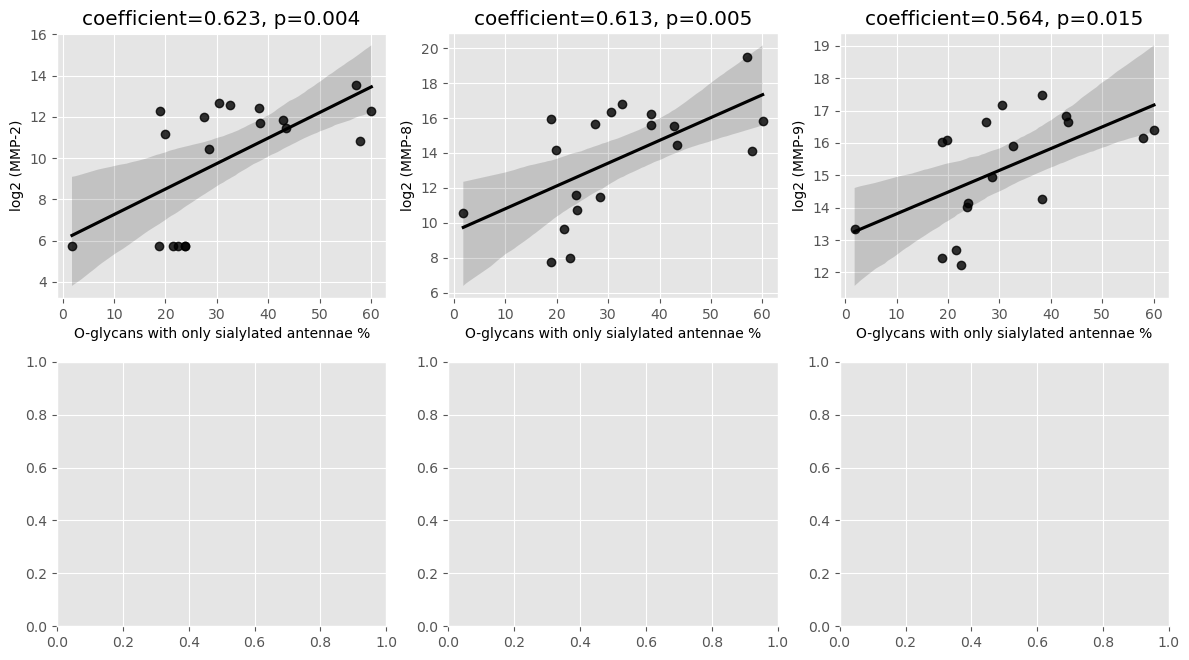

In [42]:
SiaOnlyOCorrelation(y='MMP')

### Correlation to complement factors

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()


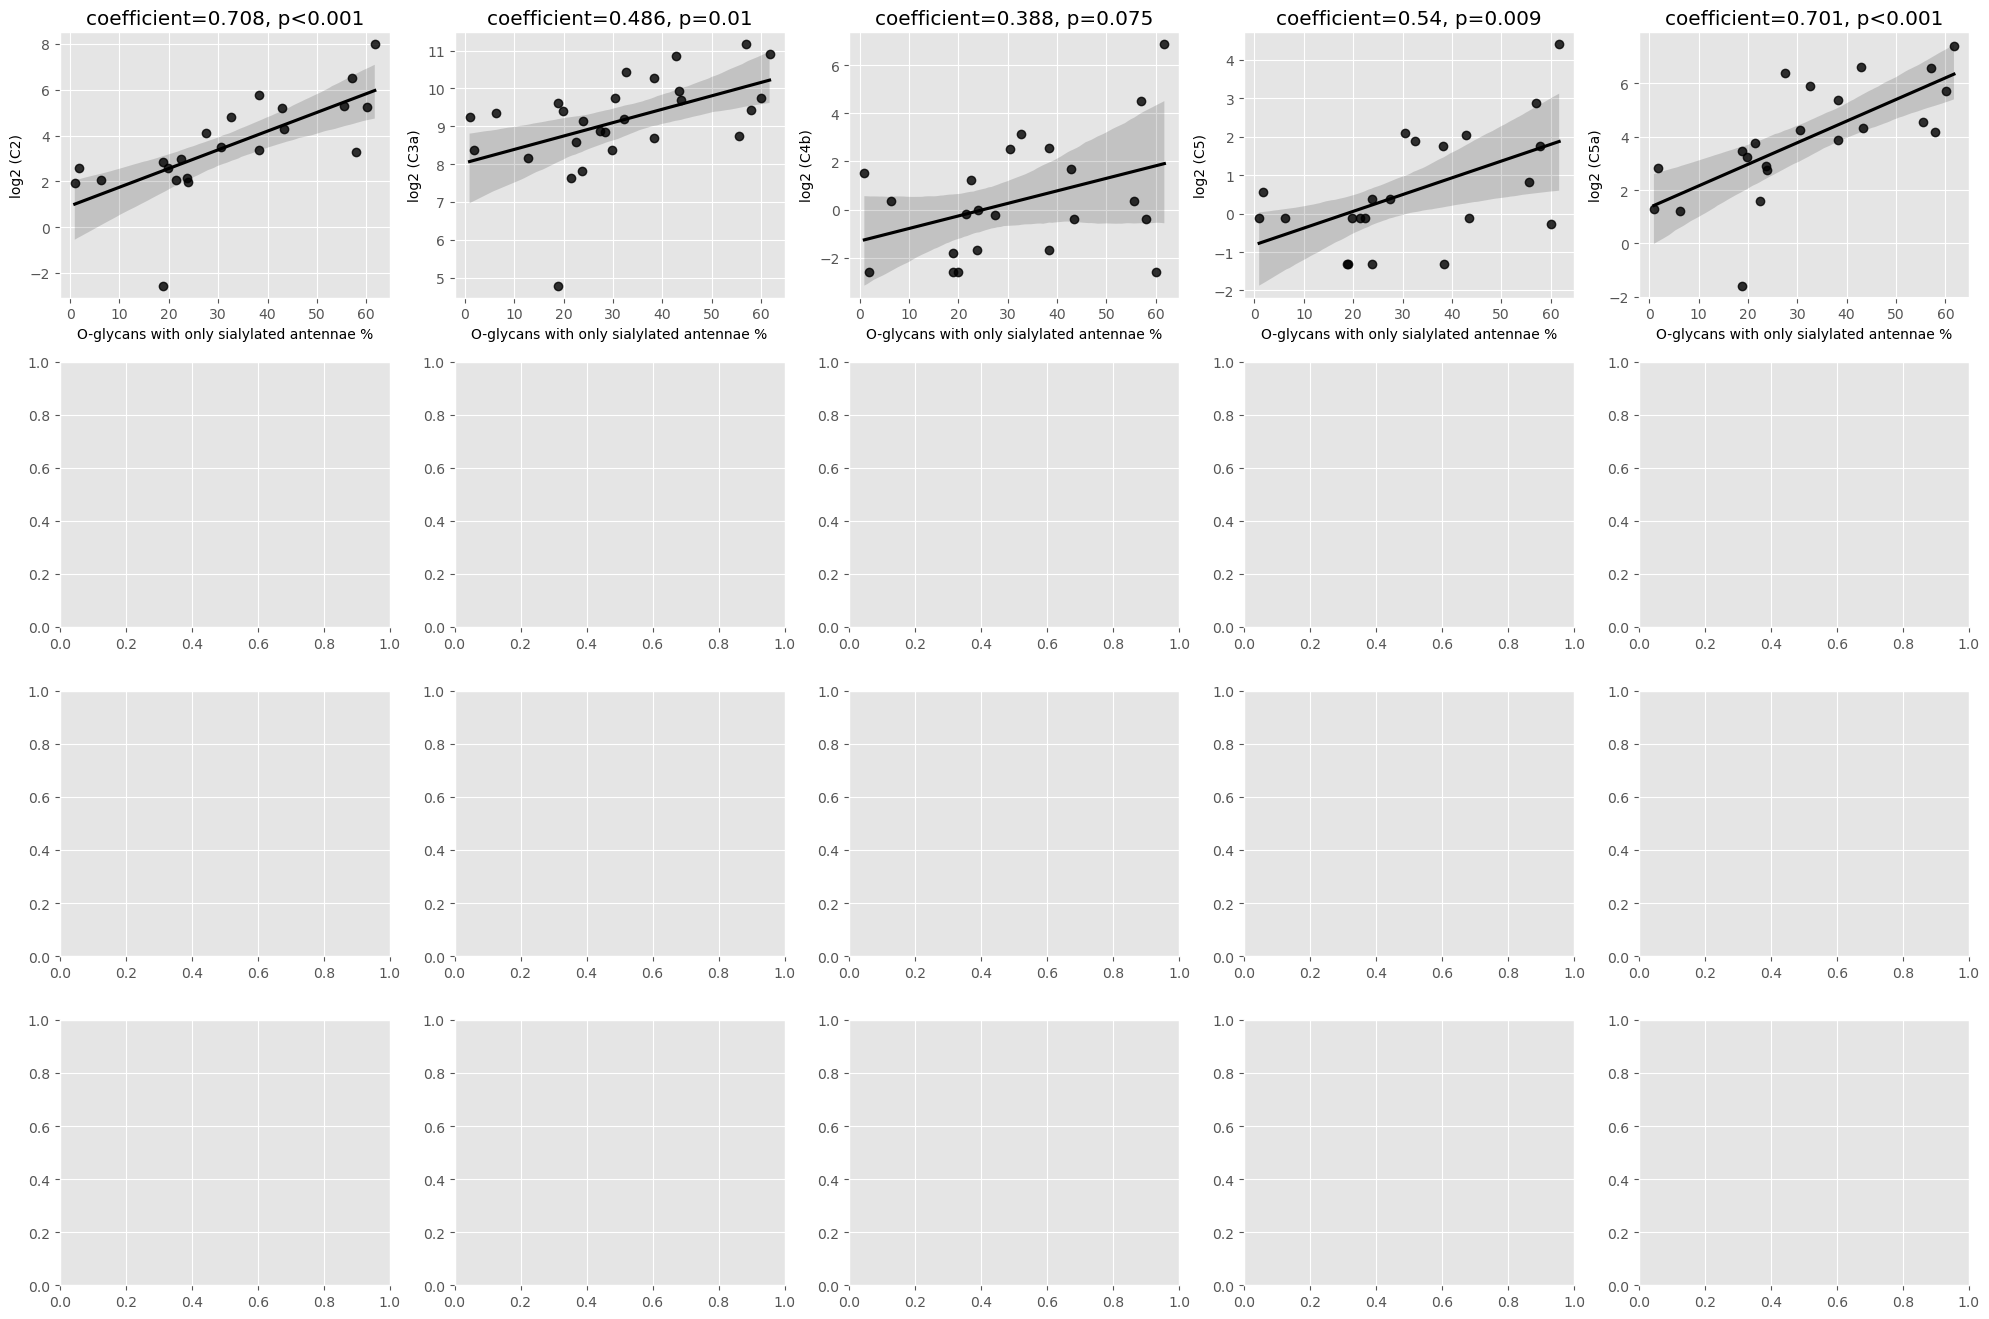

In [43]:
SiaOnlyOCorrelation(y='Complements')

### Correlation to cytokines

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:467: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,i]=data[i].astype('float')
/tm

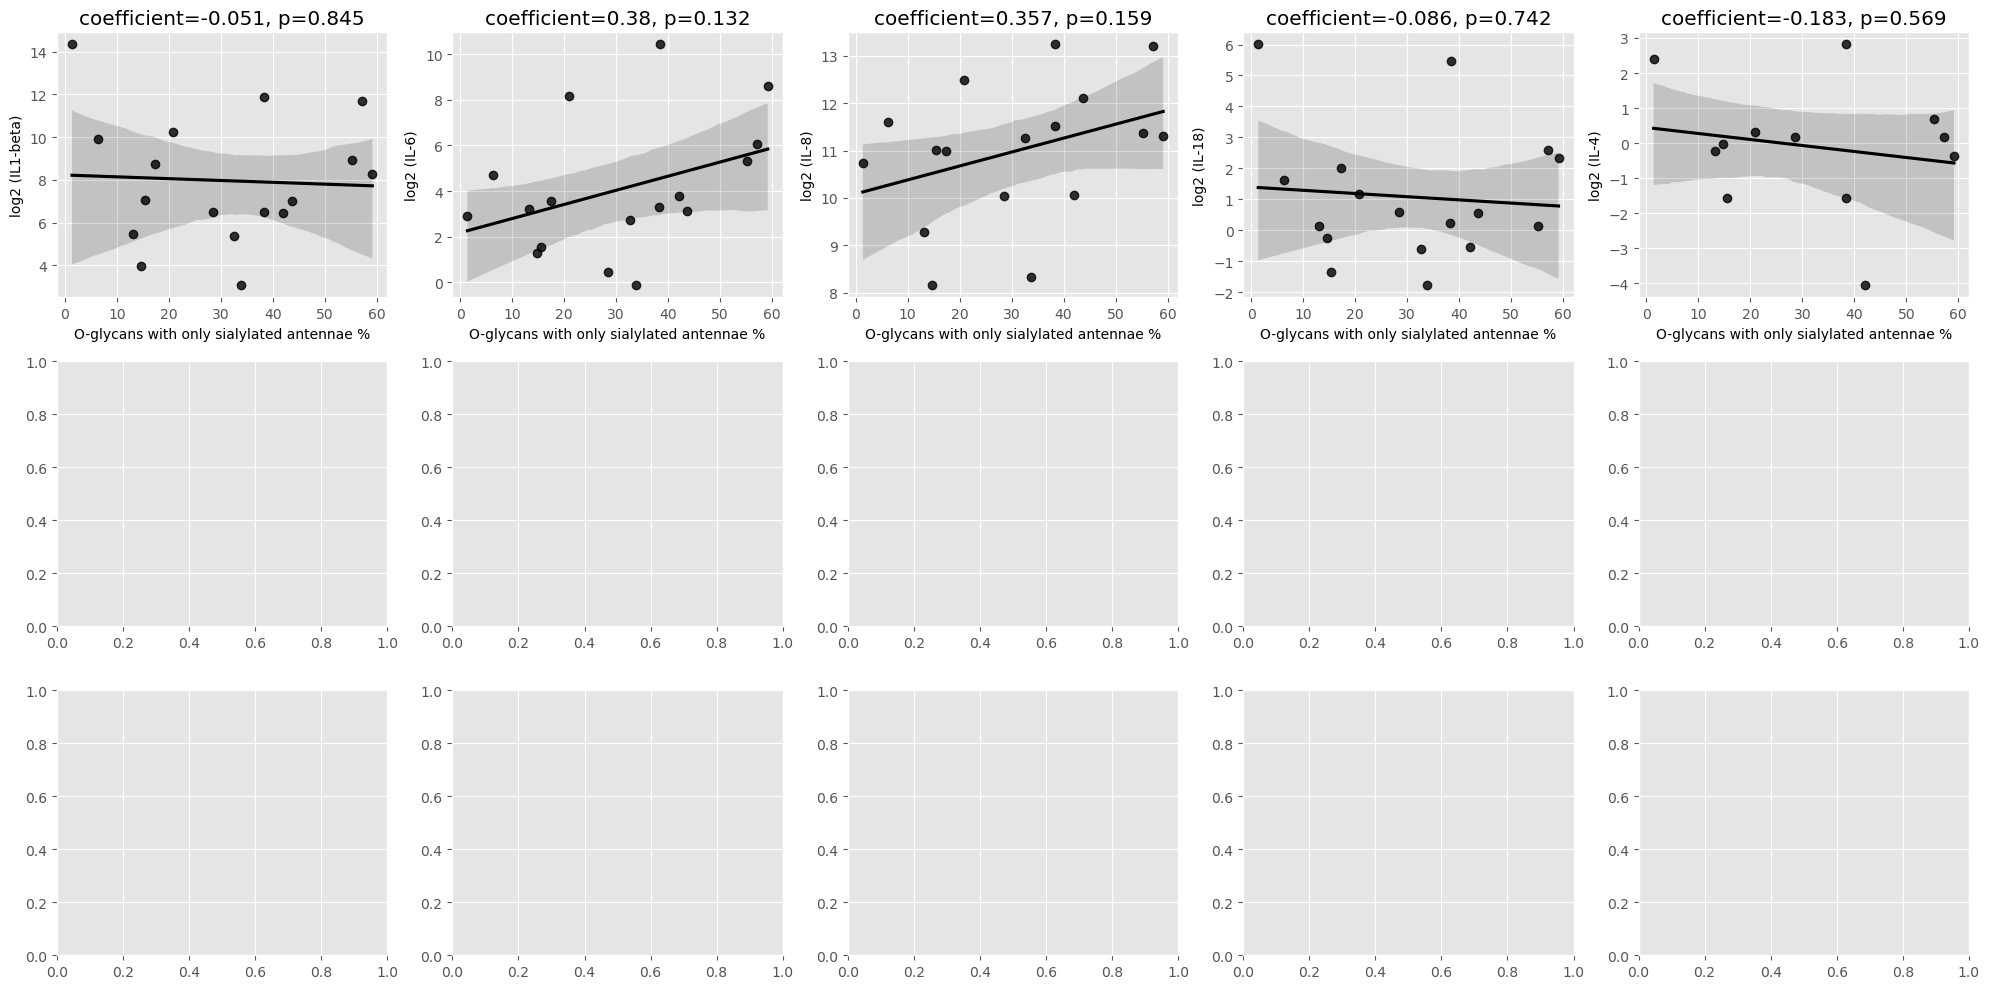

In [44]:
SiaOnlyOCorrelation(y='Cytokines')

## Fucosylated antennae

### Function for correlation analysis

In [45]:
def LewisSLewisOCorrelation(y='MMP', CST_all=True, CST_label=False, 
                     xlabel='O-glycans with fucosylated antennae %'):
    
    # Get the data
    data=Oglycans().data
    
    # filter
    filt=OglycanGroupFilters(data)
    
    # Relative intensity
    sub=(data['dHex_count']>=1) 
    total=(data['dHex_count']>=0) 

    Relat_intensity=GeneralSubCalculation(data=data, sub_filt=sub, total_filt= total)
    
    # Merge and plot
    
    if y in ['MMP', 'Complements']:
        Relat_intensity=Relat_intensity.merge(clinical_new, on='Sample_collection', how='inner')
        if (not CST_all):
            Relat_intensity=Relat_intensity.loc[~(Relat_intensity['CST group']=='IV-B or IV-C')]
        if y=='MMP':
            PlotMMPNewCohort(Relat_intensity, CST_label=CST_label, xlabel=xlabel)
        elif y=='Complements':
            PlotComplementsNewCohort(Relat_intensity, CST_label=CST_label, xlabel=xlabel)
    elif y=='Cytokines':
        Relat_intensity=Relat_intensity.merge(clinical_old, on='Sample_collection', how='inner')
        if (not CST_all):
            Relat_intensity=Relat_intensity.loc[~(Relat_intensity['CST group']=='IV-B or IV-C')]
        PlotCytokineOldCohort(Relat_intensity,CST_label=CST_label, xlabel=xlabel)

### Correlation to MMP

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:315: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,i]=data[i].astype('float')


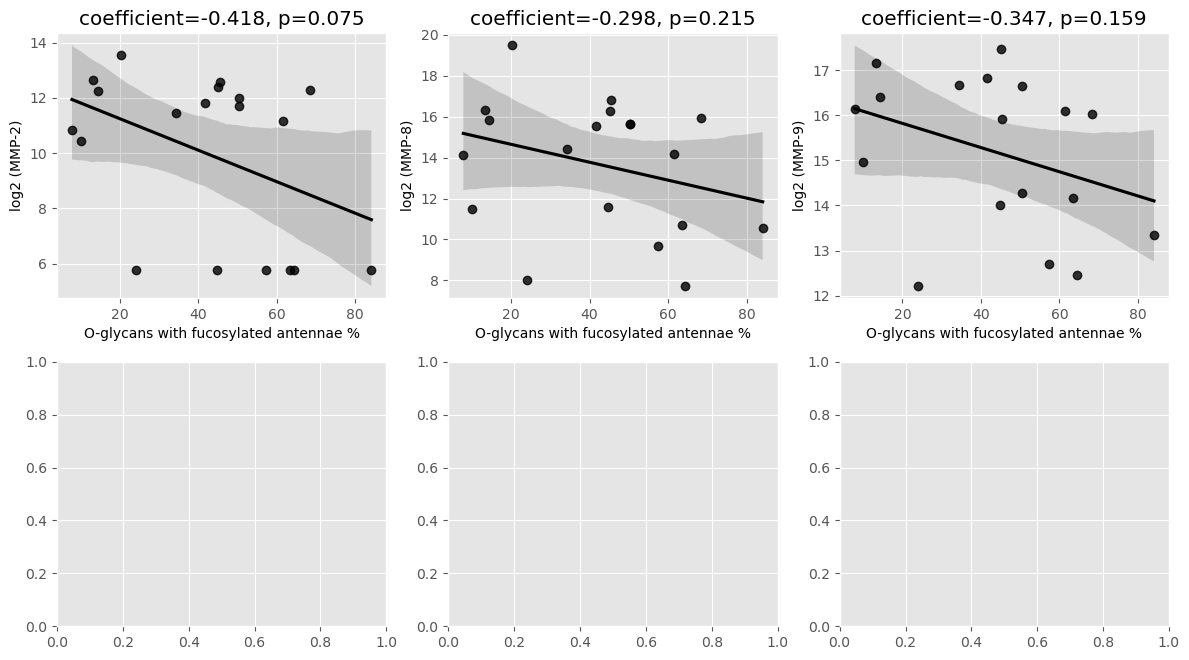

In [46]:
LewisSLewisOCorrelation(y='MMP')

### Correlation to complements

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()


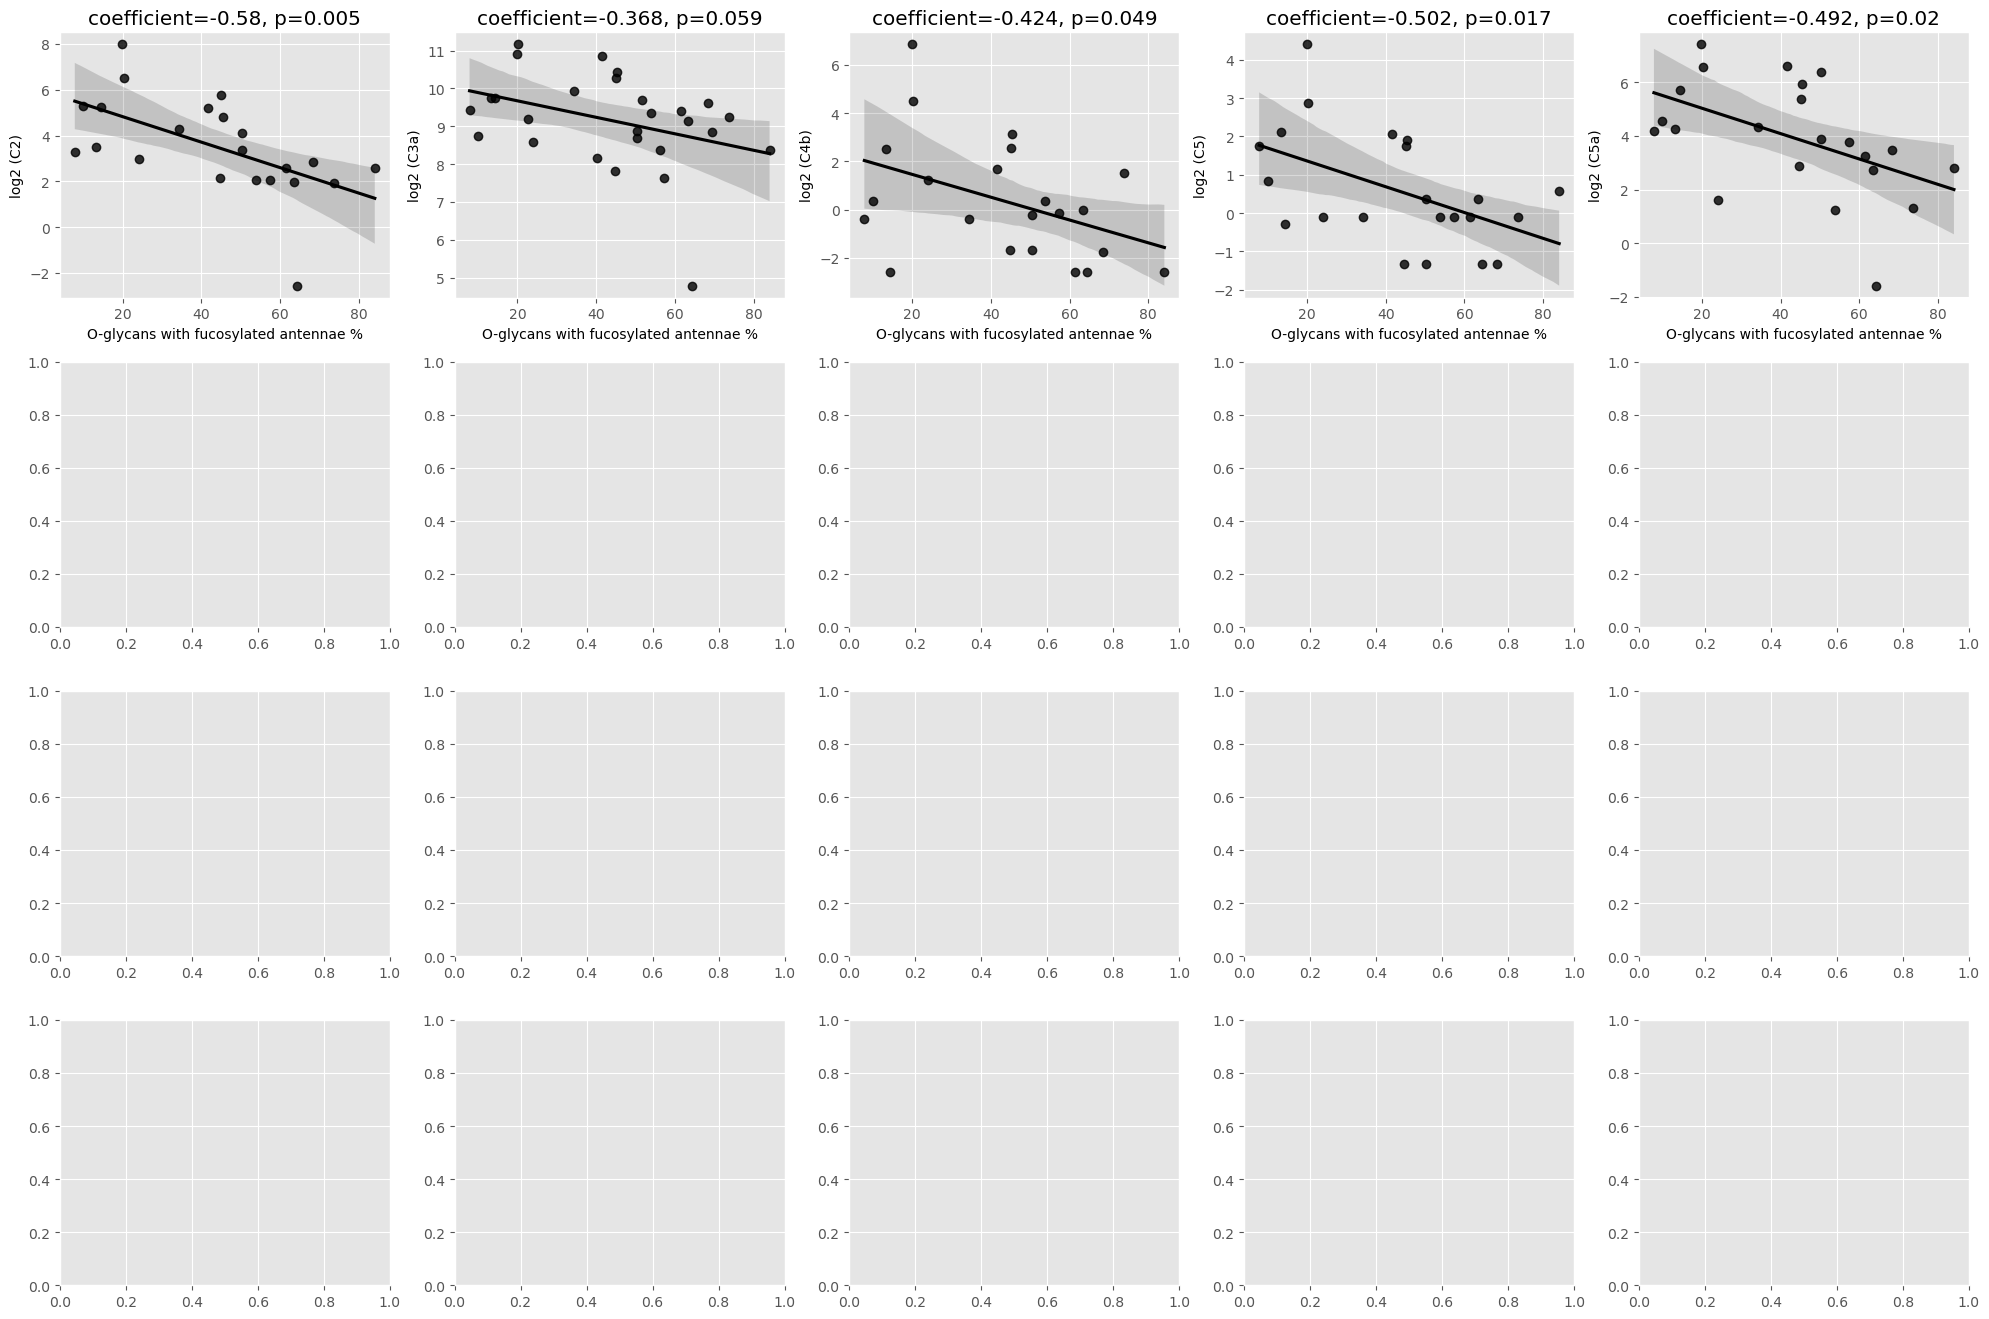

In [47]:
LewisSLewisOCorrelation(y='Complements')

### Correlation to cytokines

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:467: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,i]=data[i].astype('float')
/tm

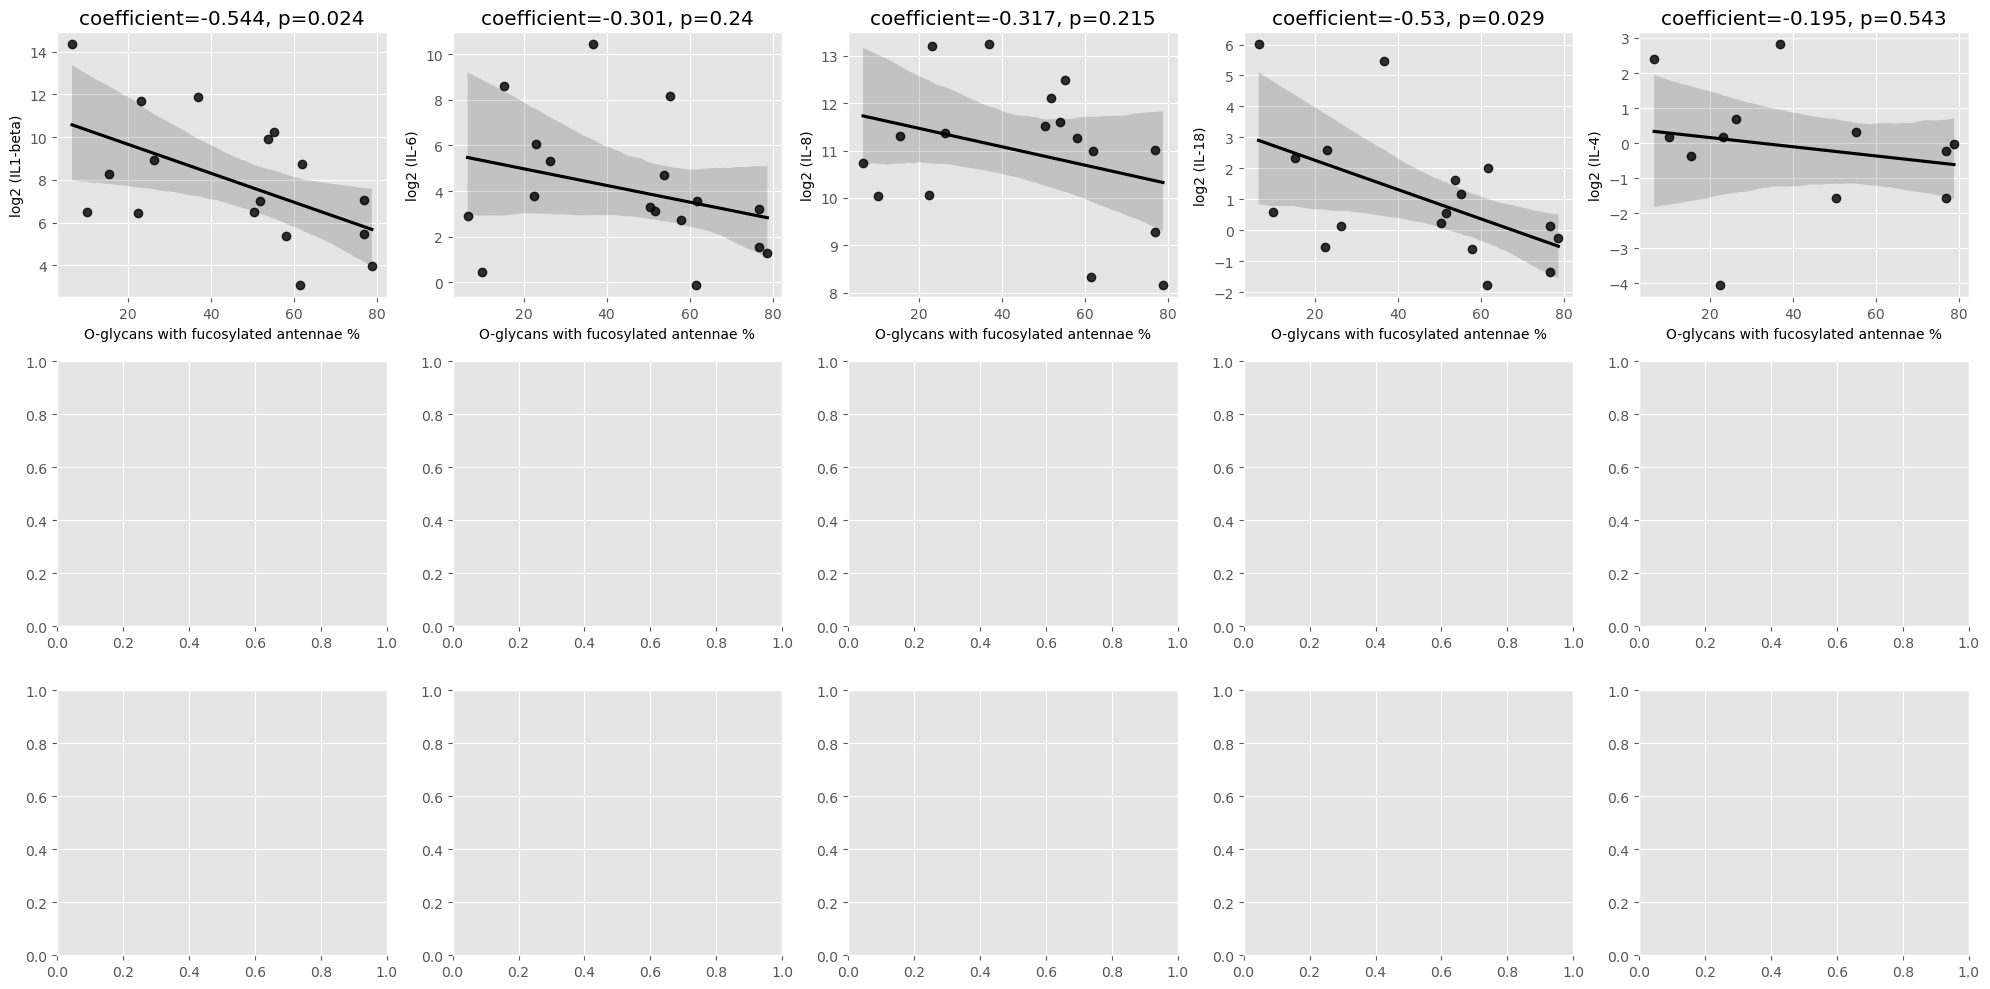

In [48]:
LewisSLewisOCorrelation(y='Cytokines')

## Blood group A

### Function for correlation analysis

In [49]:
def BloodAOCorrelation(y='MMP', CST_all=True, CST_label=False, xlabel='Blood group A in O-glycans %'):
    # Data
    data=Oglycans().data

    # Filter
    filt=OglycanGroupFilters(data)

    sub=filt.blood_A
    total= (data['dHex_count']>=0)

    Relat_intensity=GeneralSubCalculation(data=data, sub_filt=sub,total_filt= total)
    
    
    # Merge and plot
    
    if y in ['MMP', 'Complements']:
        Relat_intensity=Relat_intensity.merge(clinical_new.loc[clinical_new['Blood Group']=='A'], 
                                              on='Sample_collection', how='inner')
        if (not CST_all):
            Relat_intensity=Relat_intensity.loc[~(Relat_intensity['CST group']=='IV-B or IV-C')]
        if y=='MMP':
            PlotMMPNewCohort(Relat_intensity, CST_label=CST_label, xlabel=xlabel)
        elif y=='Complements':
            PlotComplementsNewCohort(Relat_intensity, CST_label=CST_label, xlabel=xlabel)
    elif y=='Cytokines':
        Relat_intensity=Relat_intensity.merge(clinical_old.loc[clinical_old['Blood group']=='A'], 
                                              on='Sample_collection', how='inner')
        if (not CST_all):
            Relat_intensity=Relat_intensity.loc[~(Relat_intensity['CST group']=='IV-B or IV-C')]
        PlotCytokineOldCohort(Relat_intensity,CST_label=CST_label, xlabel=xlabel)

### Correlation to MMP

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:315: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,i]=data[i].astype('float')


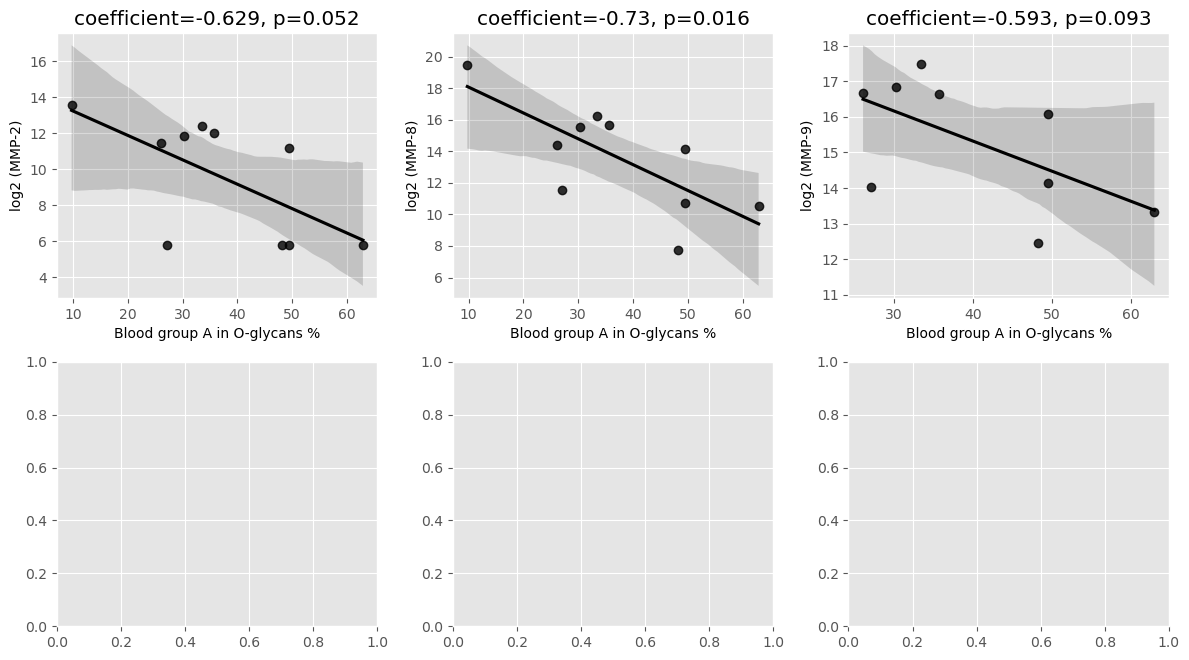

In [50]:
BloodAOCorrelation(y='MMP')

### Correlation to compelment factors

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()


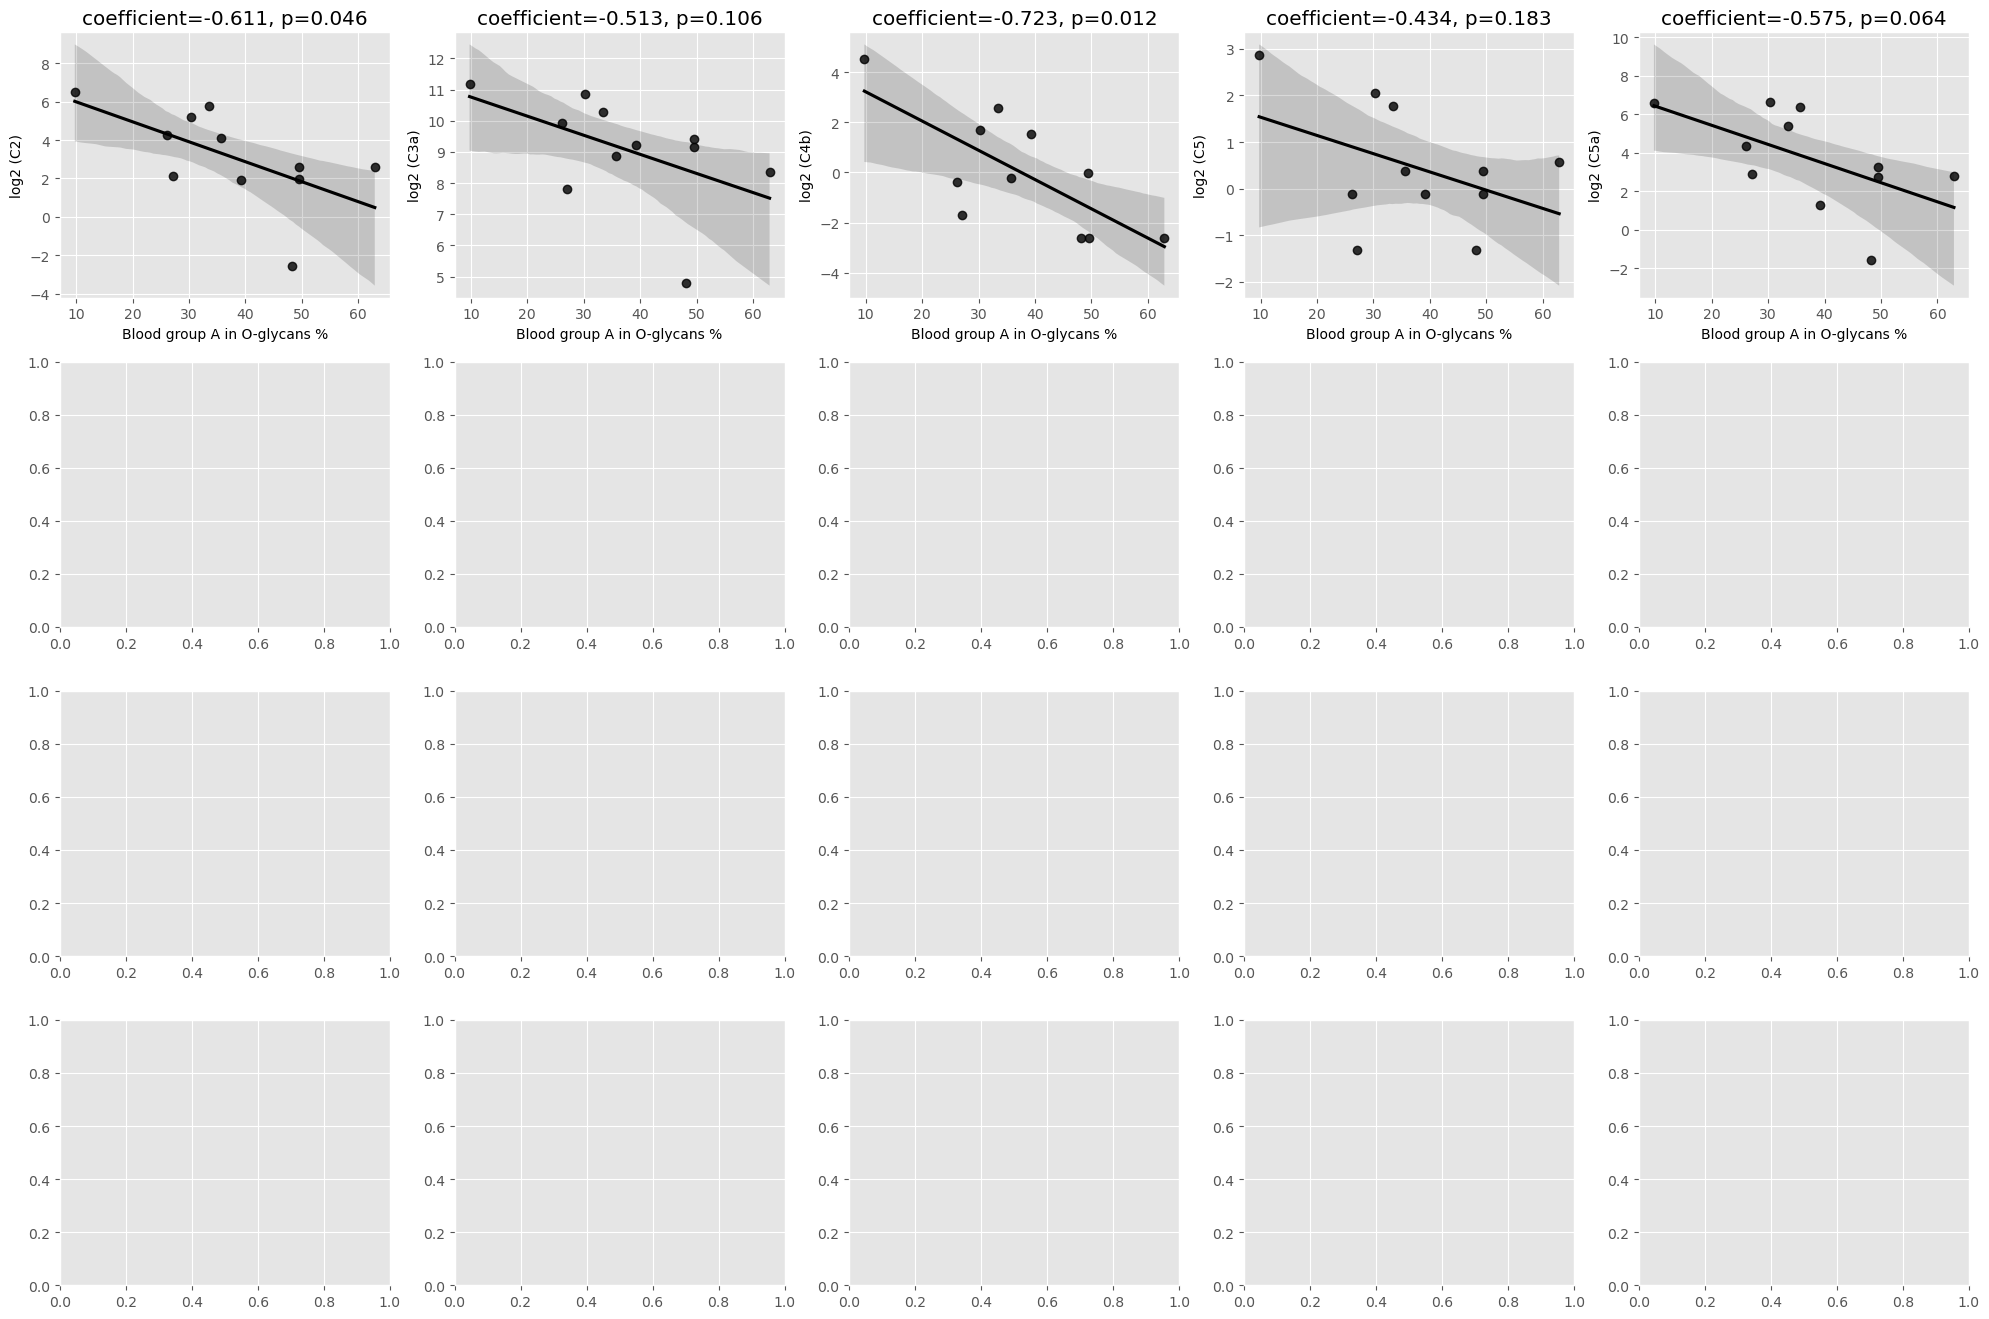

In [51]:
BloodAOCorrelation(y='Complements')

### Correlation to cytokines

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:467: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,i]=data[i].astype('float')
/tm

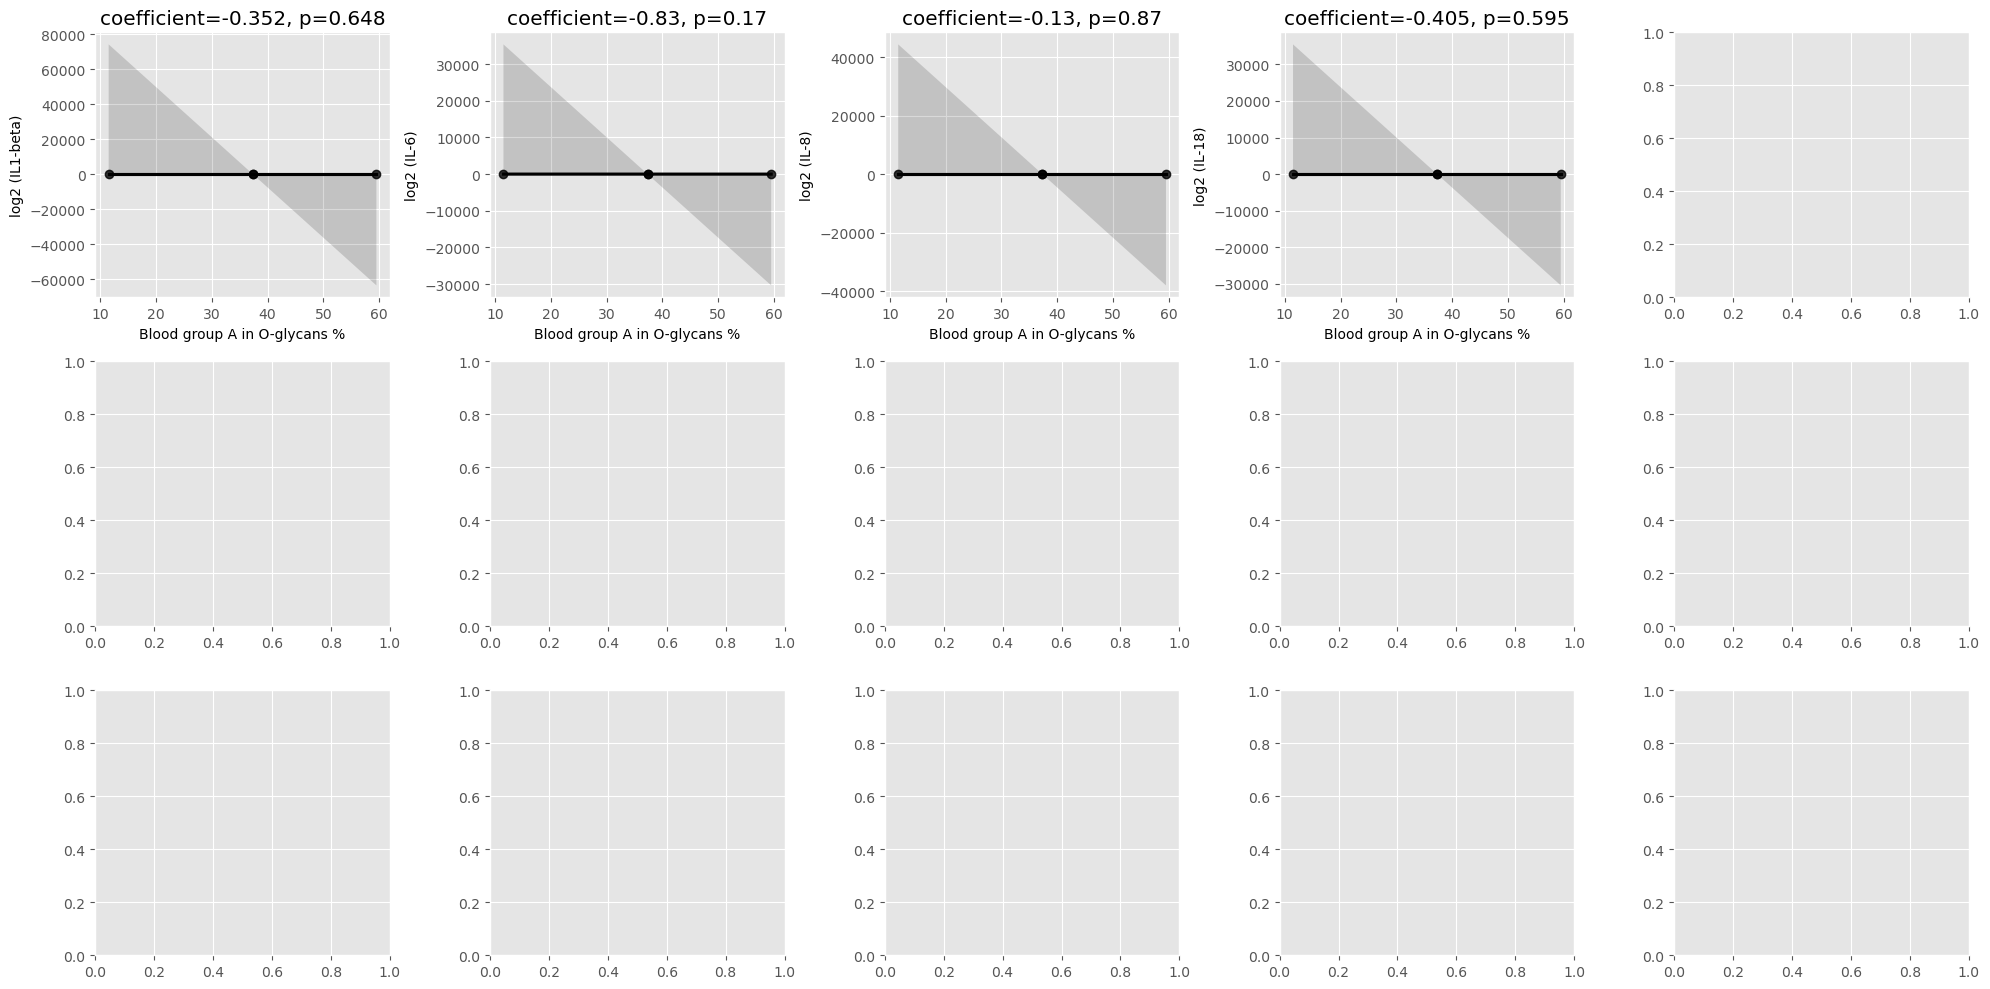

In [52]:
BloodAOCorrelation(y='Cytokines')

## Blood group B

### Function for correlation analysis

In [53]:
def BloodBOCorrelation(y='MMP', CST_all=True, CST_label=False, xlabel='Blood group B in O-glycans %'):
    # Data
    data=Oglycans().data

    # Filter
    filt=OglycanGroupFilters(data)

    sub=filt.blood_B
    total= (data['dHex_count']>=0)

    Relat_intensity=GeneralSubCalculation(data=data, sub_filt=sub,total_filt= total)
    
    
    # Merge and plot
    
    if y in ['MMP', 'Complements']:
        Relat_intensity=Relat_intensity.merge(clinical_new.loc[clinical_new['Blood Group']=='B'], 
                                              on='Sample_collection', how='inner')
        if (not CST_all):
            Relat_intensity=Relat_intensity.loc[~(Relat_intensity['CST group']=='IV-B or IV-C')]
        if y=='MMP':
            PlotMMPNewCohort(Relat_intensity, CST_label=CST_label, xlabel=xlabel)
        elif y=='Complements':
            PlotComplementsNewCohort(Relat_intensity, CST_label=CST_label, xlabel=xlabel)
    elif y=='Cytokines':
        Relat_intensity=Relat_intensity.merge(clinical_old.loc[clinical_old['Blood group']=='B'], 
                                              on='Sample_collection', how='inner')
        if (not CST_all):
            Relat_intensity=Relat_intensity.loc[~(Relat_intensity['CST group']=='IV-B or IV-C')]
        PlotCytokineOldCohort(Relat_intensity,CST_label=CST_label, xlabel=xlabel)

### Correlation to compelement factors

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()


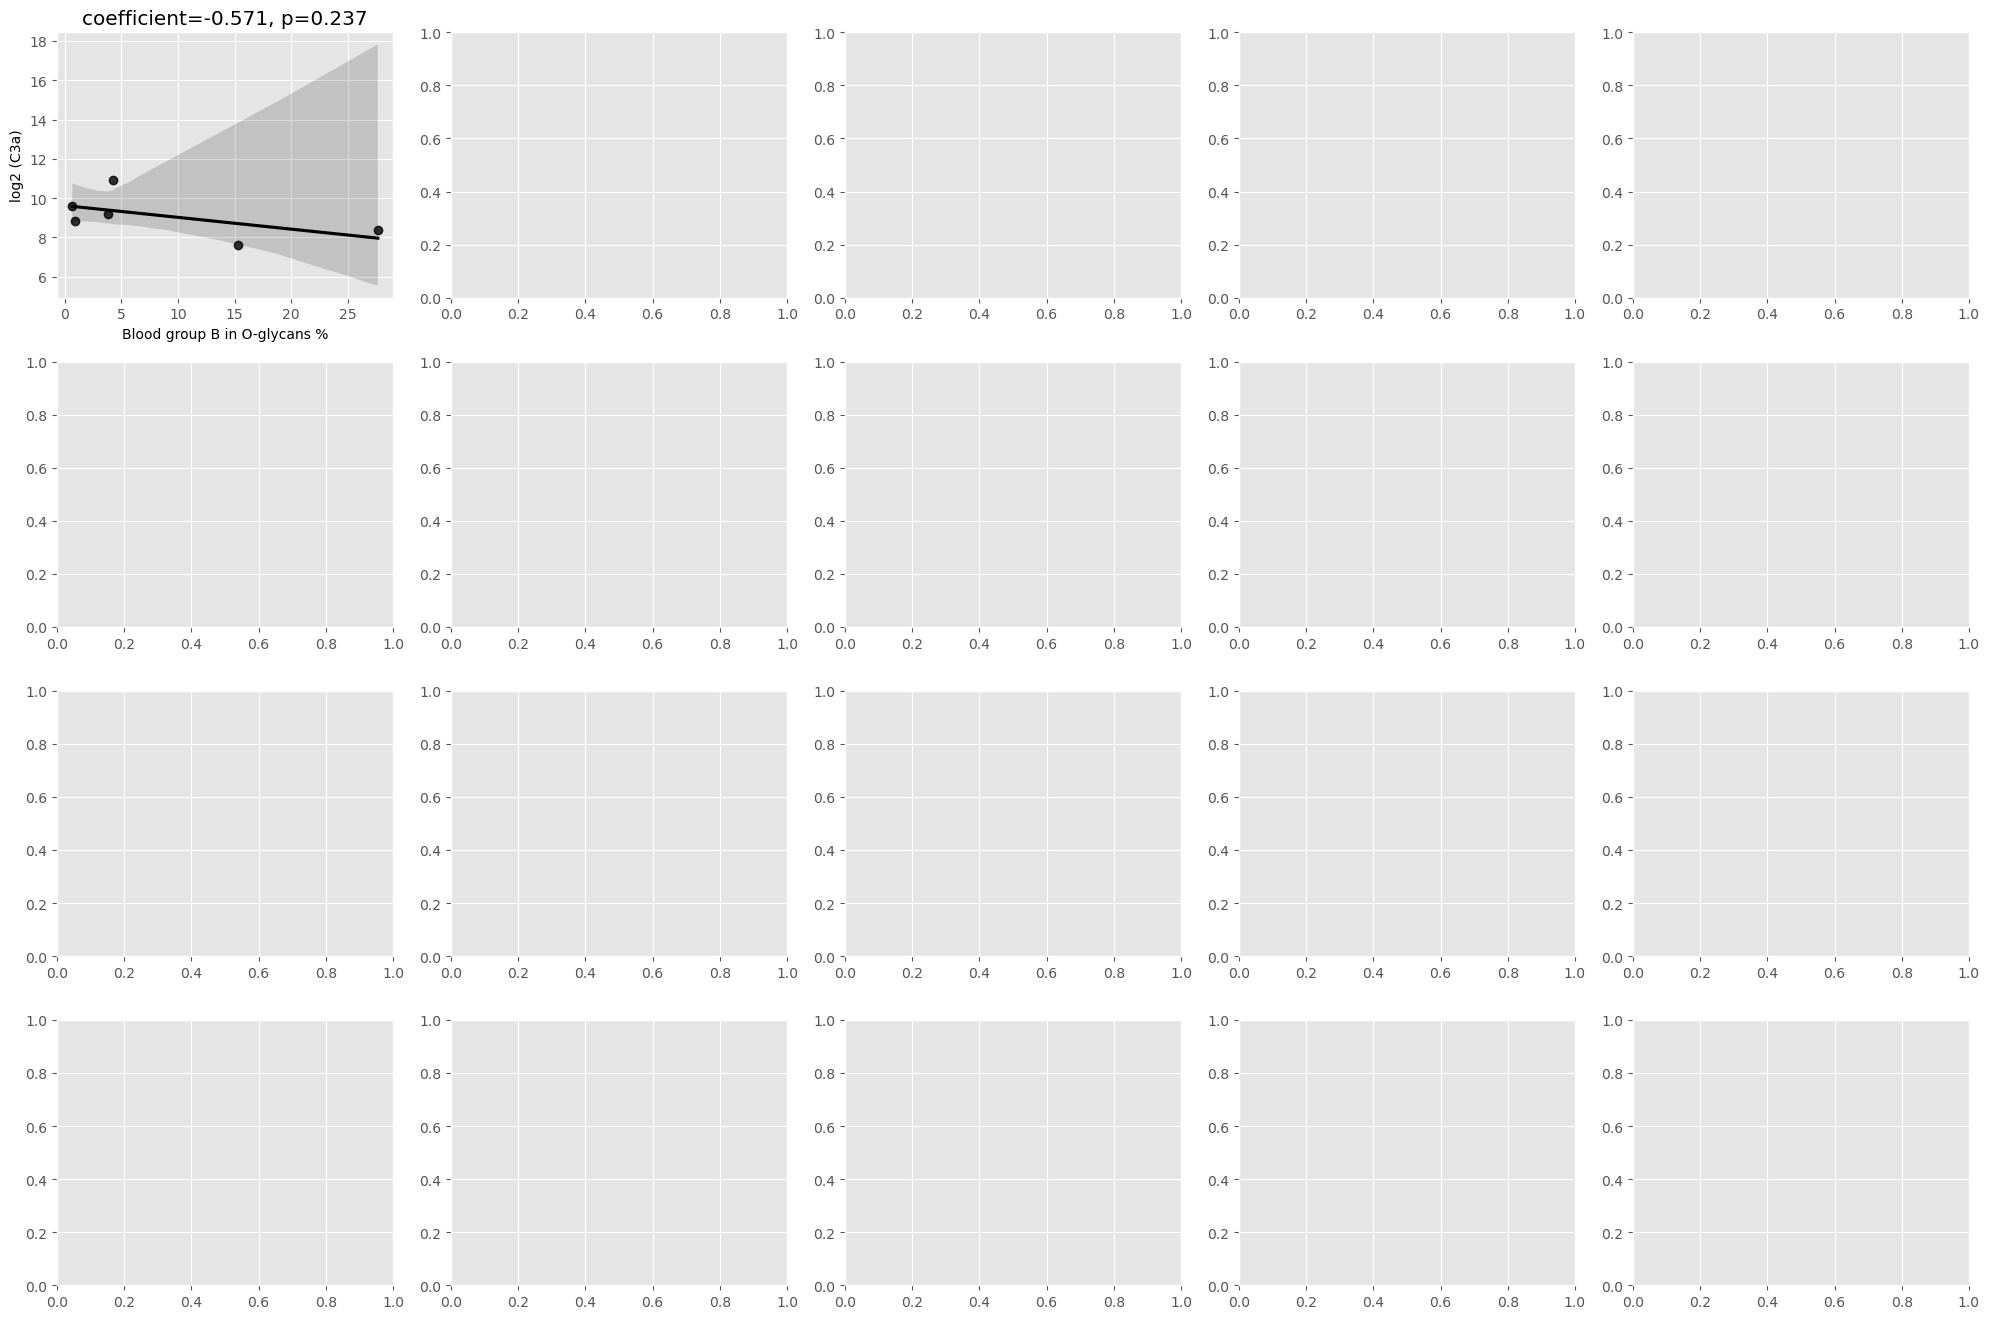

In [54]:
BloodBOCorrelation(y='Complements')

### Correlation to cytokines

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:467: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,i]=data[i].astype('float')
/tm

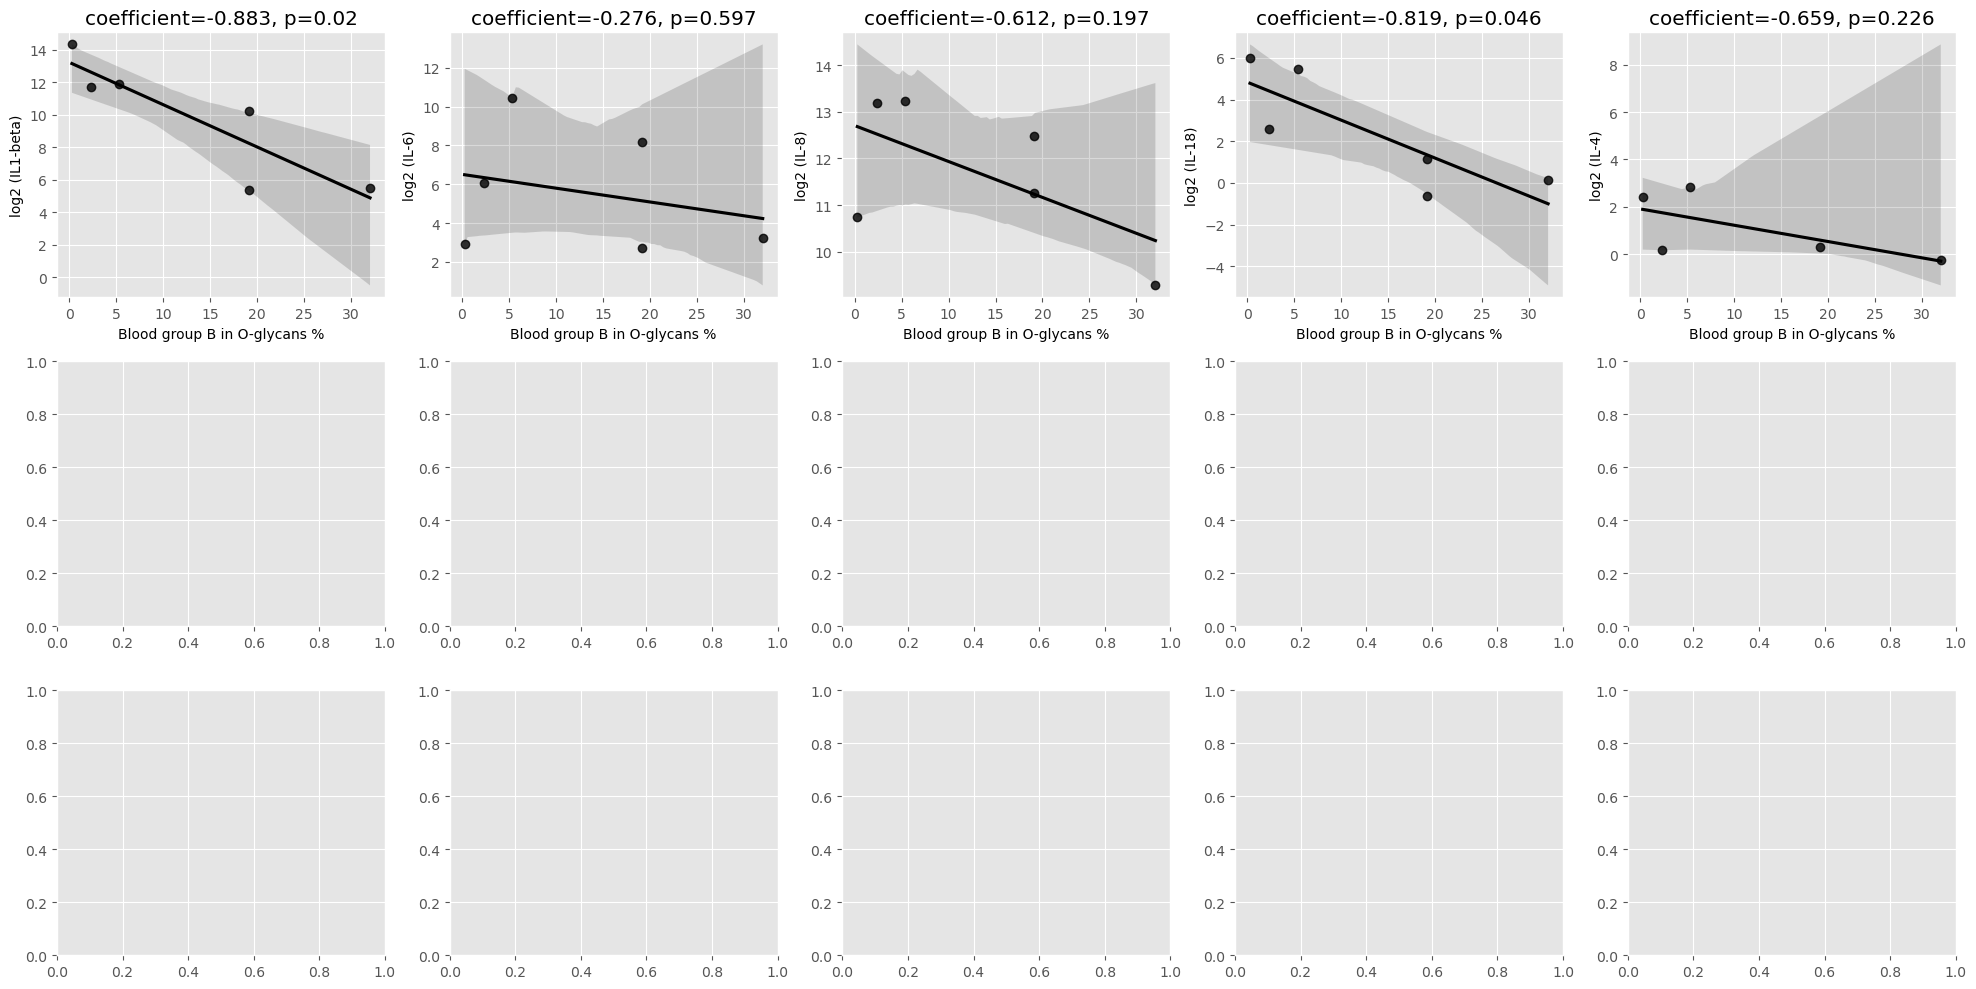

In [55]:
BloodBOCorrelation(y='Cytokines')

# Glycotopes

## With only sialylation

### Function for correlation 

In [56]:
def SiaOnlyTCorrelation(y='MMP', CST_all=True, CST_label=False, 
                     xlabel='Glycotopes with only sialylation %'):
    
    # Get the data
    data=Terminals().data
    
    # Relative intensity
    sub=(data['dHex_count']==0) & (data['NeuAc_count']>=1)
    total=(data['dHex_count']>=0)
 
    Relat_intensity=GeneralSubCalculation(data=data, sub_filt=sub, 
                                                     total_filt= total )
    
    # Merge and plot
    
    if y in ['MMP', 'Complements']:
        Relat_intensity=Relat_intensity.merge(clinical_new, on='Sample_collection', how='inner')
        if (not CST_all):
            Relat_intensity=Relat_intensity.loc[~(Relat_intensity['CST group']=='IV-B or IV-C')]
        if y=='MMP':
            PlotMMPNewCohort(Relat_intensity, CST_label=CST_label, xlabel=xlabel)
        elif y=='Complements':
            PlotComplementsNewCohort(Relat_intensity, CST_label=CST_label, xlabel=xlabel)
    elif y=='Cytokines':
        Relat_intensity=Relat_intensity.merge(clinical_old, on='Sample_collection', how='inner')
        if (not CST_all):
            Relat_intensity=Relat_intensity.loc[~(Relat_intensity['CST group']=='IV-B or IV-C')]
        PlotCytokineOldCohort(Relat_intensity,CST_label=CST_label, xlabel=xlabel)

### Correlation to MMP

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:315: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,i]=data[i].astype('float')


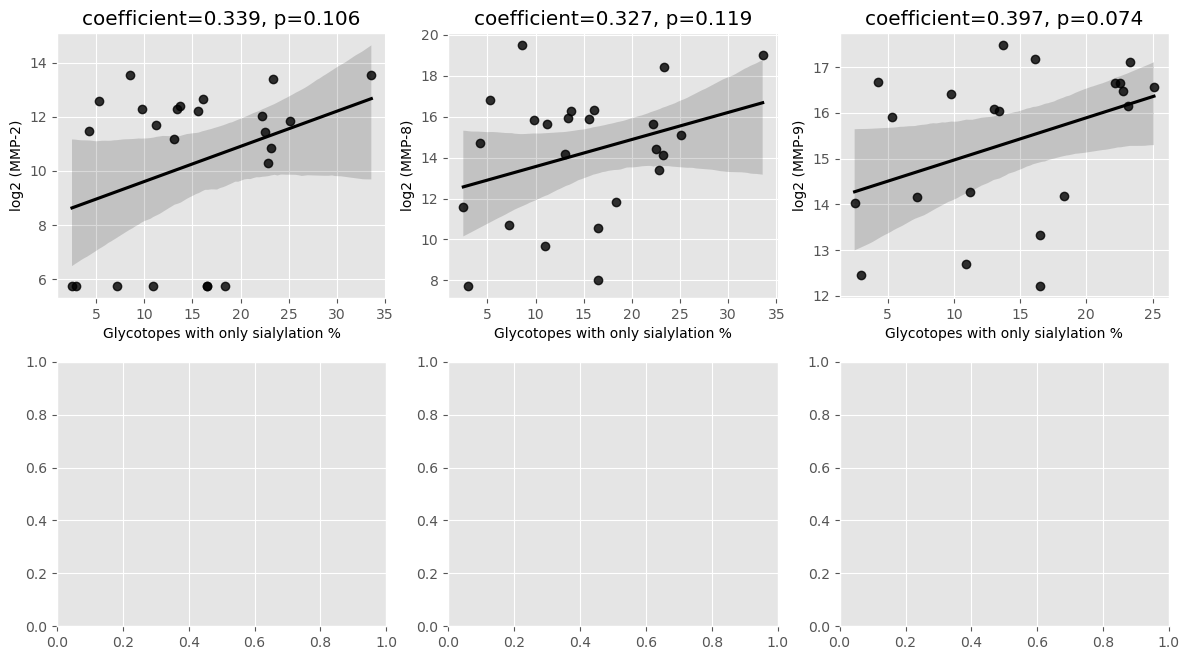

In [57]:
SiaOnlyTCorrelation(y='MMP')

### Correlation to compelment factors

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()


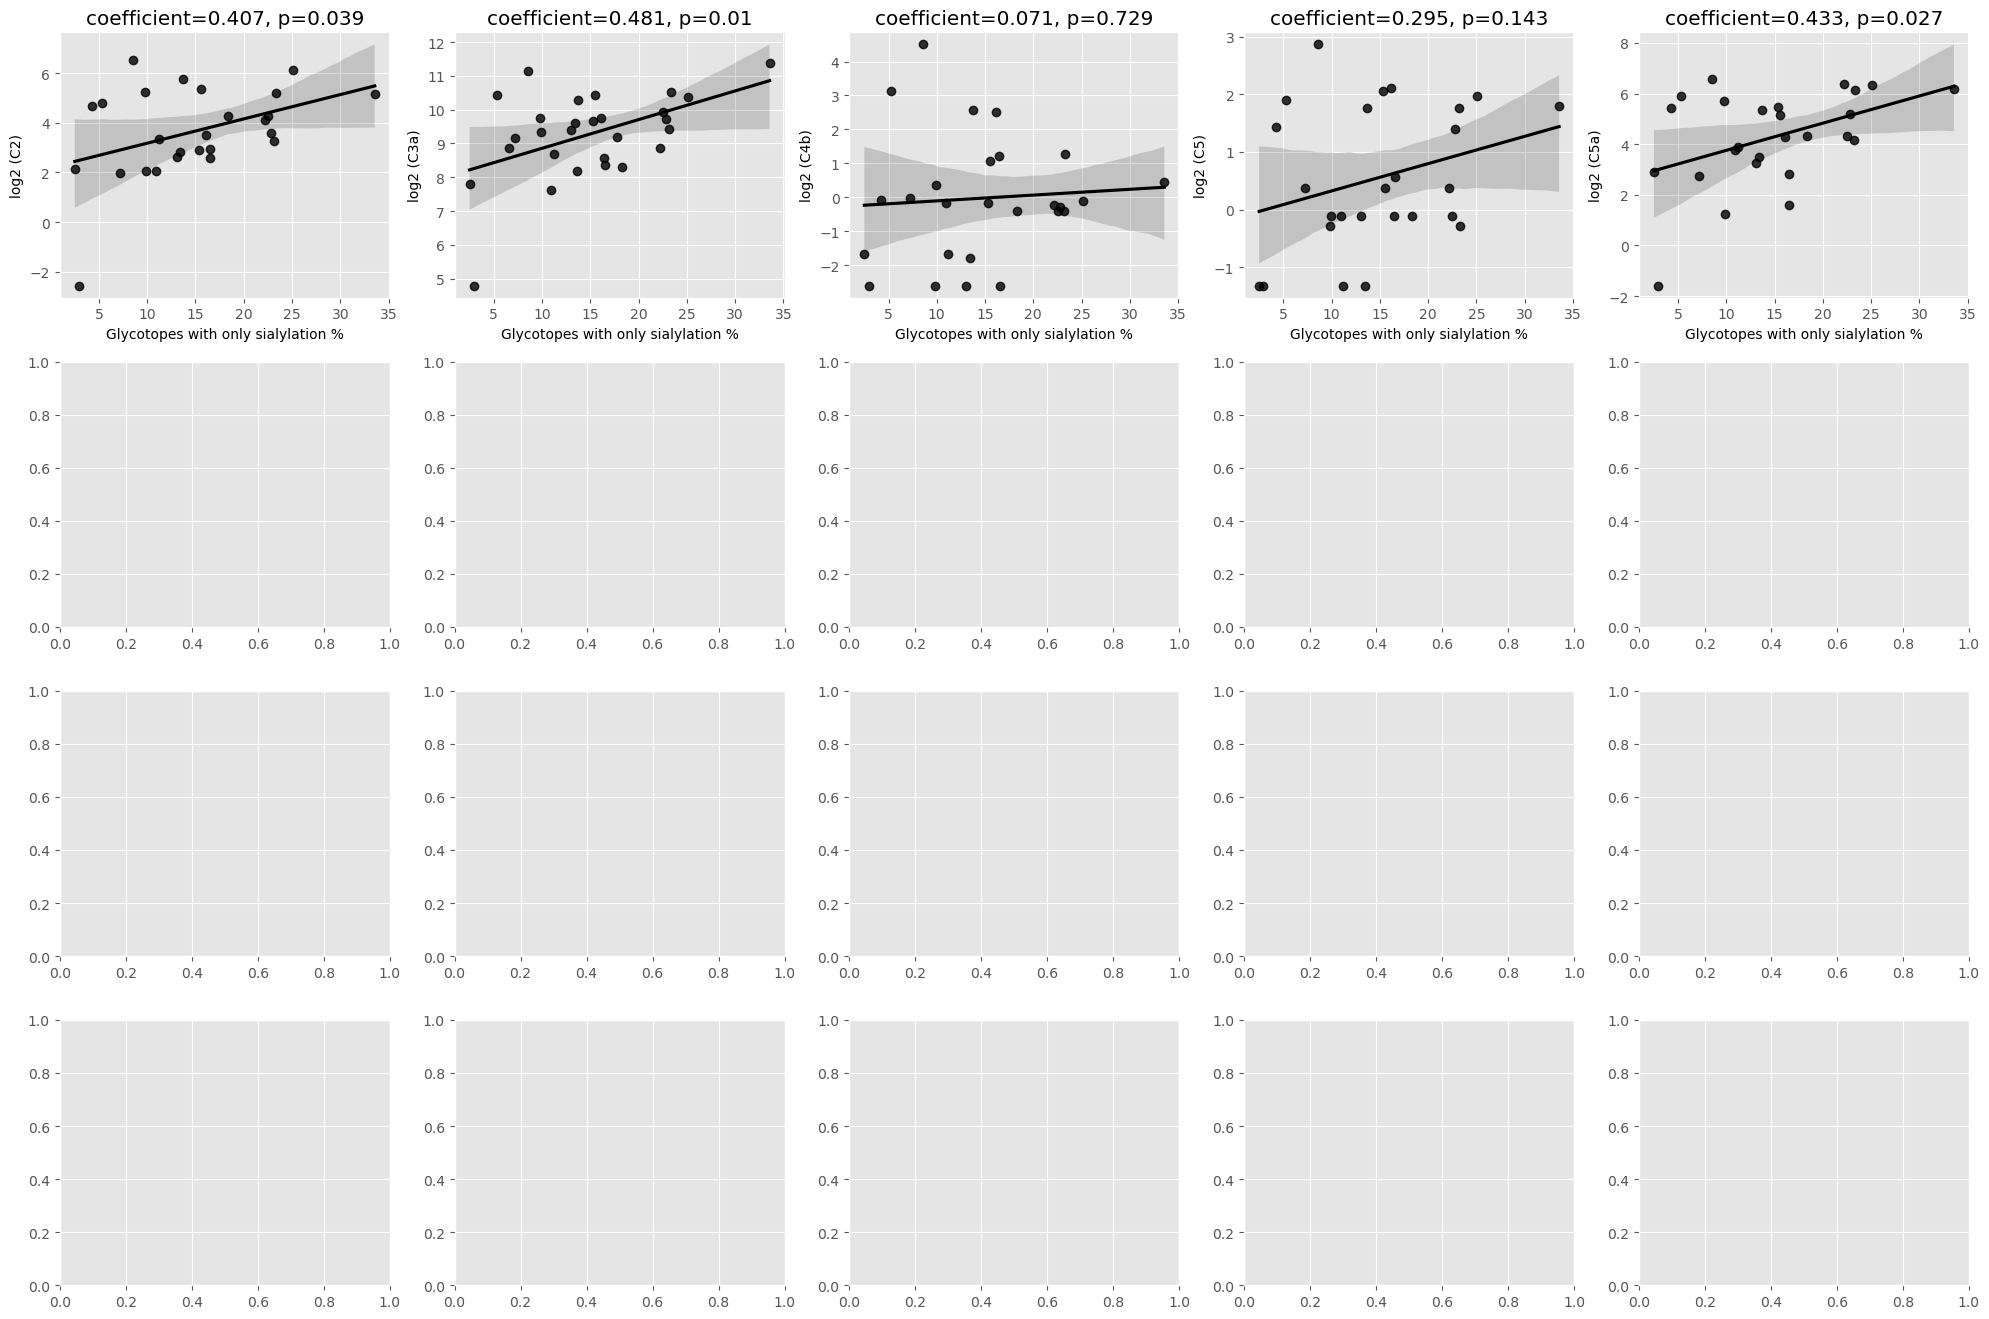

In [58]:
SiaOnlyTCorrelation(y='Complements')

### Correlation to cytokines

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:467: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,i]=data[i].astype('float')
/tm

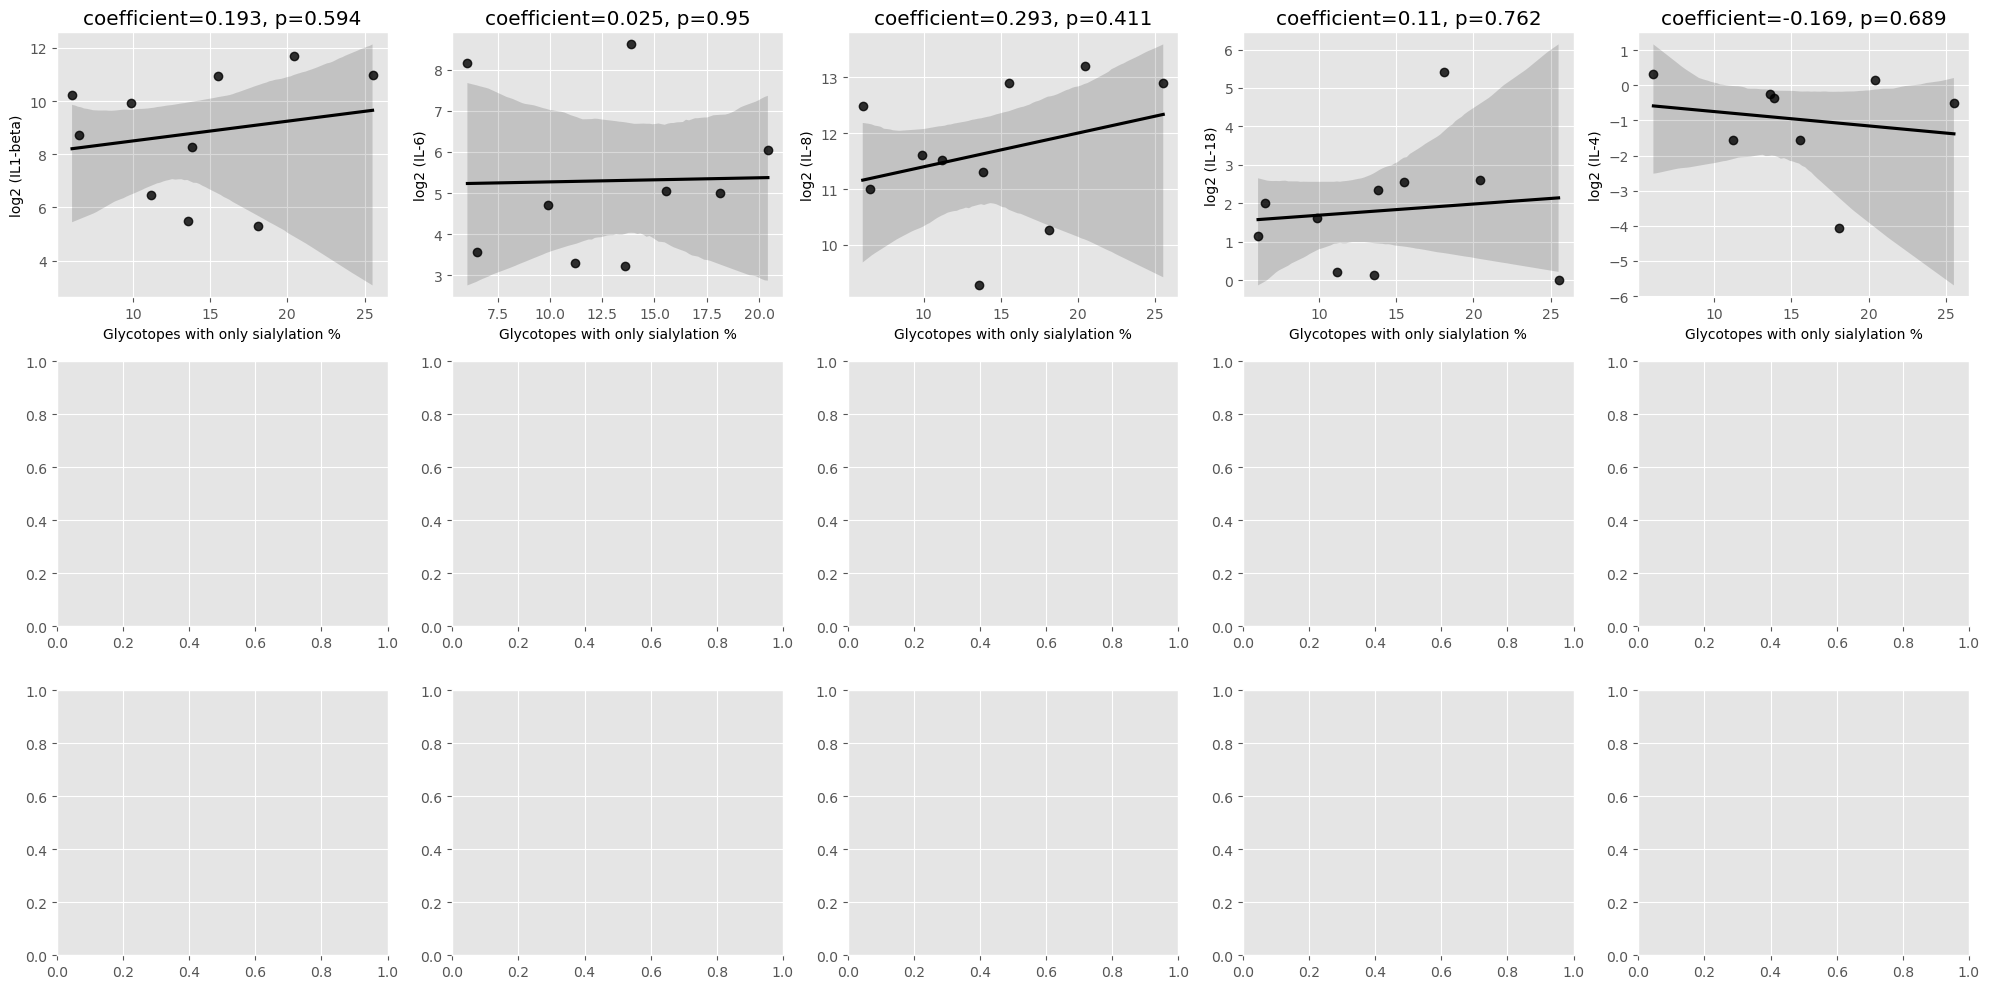

In [59]:
SiaOnlyTCorrelation(y='Cytokines')

## Fucosylated antennae

### Function for correlation 

In [60]:
def LewisSLewisTCorrelation(y='MMP', CST_all=True, CST_label=False, 
                     xlabel='Fucosylated antennae %'):
    
    # Get the data
    data=Terminals().data
    
    # Filter
    filt=EpitopeGroupFilters(data)
    
    # Relative intensity
    sub=(data['dHex_count']>=1) & (~filt.blood_B)
    total=(data['dHex_count']>=0) 
 
    Relat_intensity=GeneralSubCalculation(data=data, sub_filt=sub, total_filt= total )
    Relat_intensity=Relat_intensity.query('Relat_intensity>10')
    
    # Merge and plot
    
    if y in ['MMP', 'Complements']:
        Relat_intensity=Relat_intensity.merge(clinical_new, on='Sample_collection', how='inner')
        if (not CST_all):
            Relat_intensity=Relat_intensity.loc[~(Relat_intensity['CST group']=='IV-B or IV-C')]
        if y=='MMP':
            PlotMMPNewCohort(Relat_intensity, CST_label=CST_label, xlabel=xlabel)
        elif y=='Complements':
            PlotComplementsNewCohort(Relat_intensity, CST_label=CST_label, xlabel=xlabel)
    elif y=='Cytokines':
        Relat_intensity=Relat_intensity.merge(clinical_old, on='Sample_collection', how='inner')
        if (not CST_all):
            Relat_intensity=Relat_intensity.loc[~(Relat_intensity['CST group']=='IV-B or IV-C')]
        PlotCytokineOldCohort(Relat_intensity,CST_label=CST_label, xlabel=xlabel)

### Correlation to MMP

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:315: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,i]=data[i].astype('float')


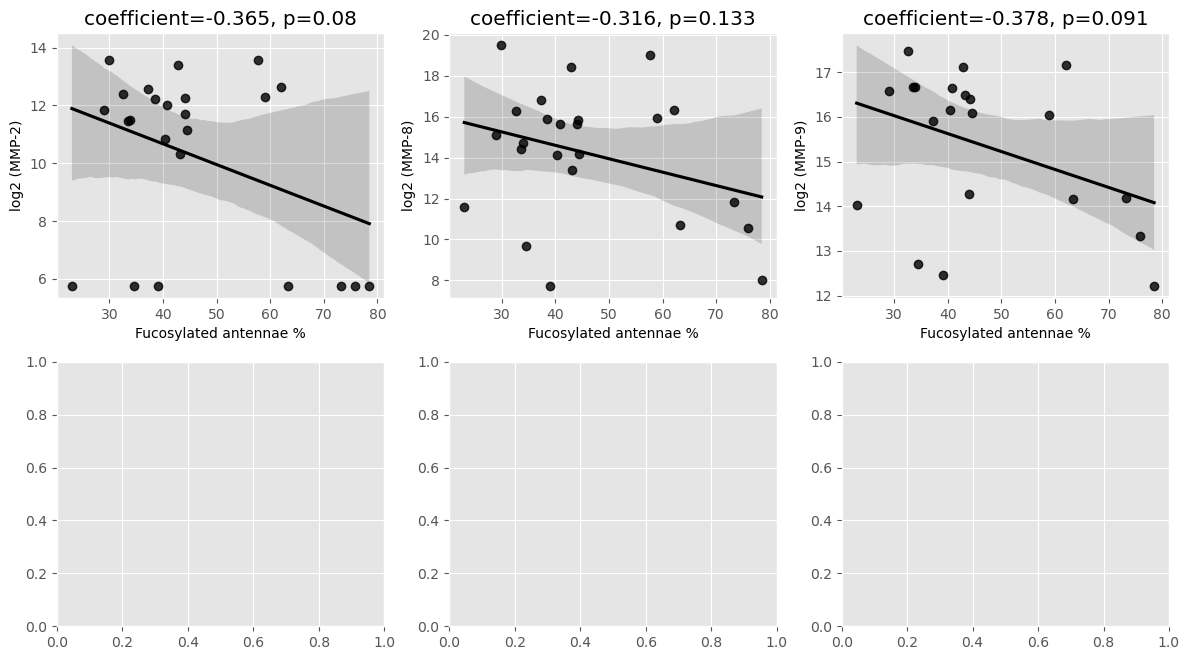

In [61]:
LewisSLewisTCorrelation(y='MMP')

### Correlation to complement factors

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()


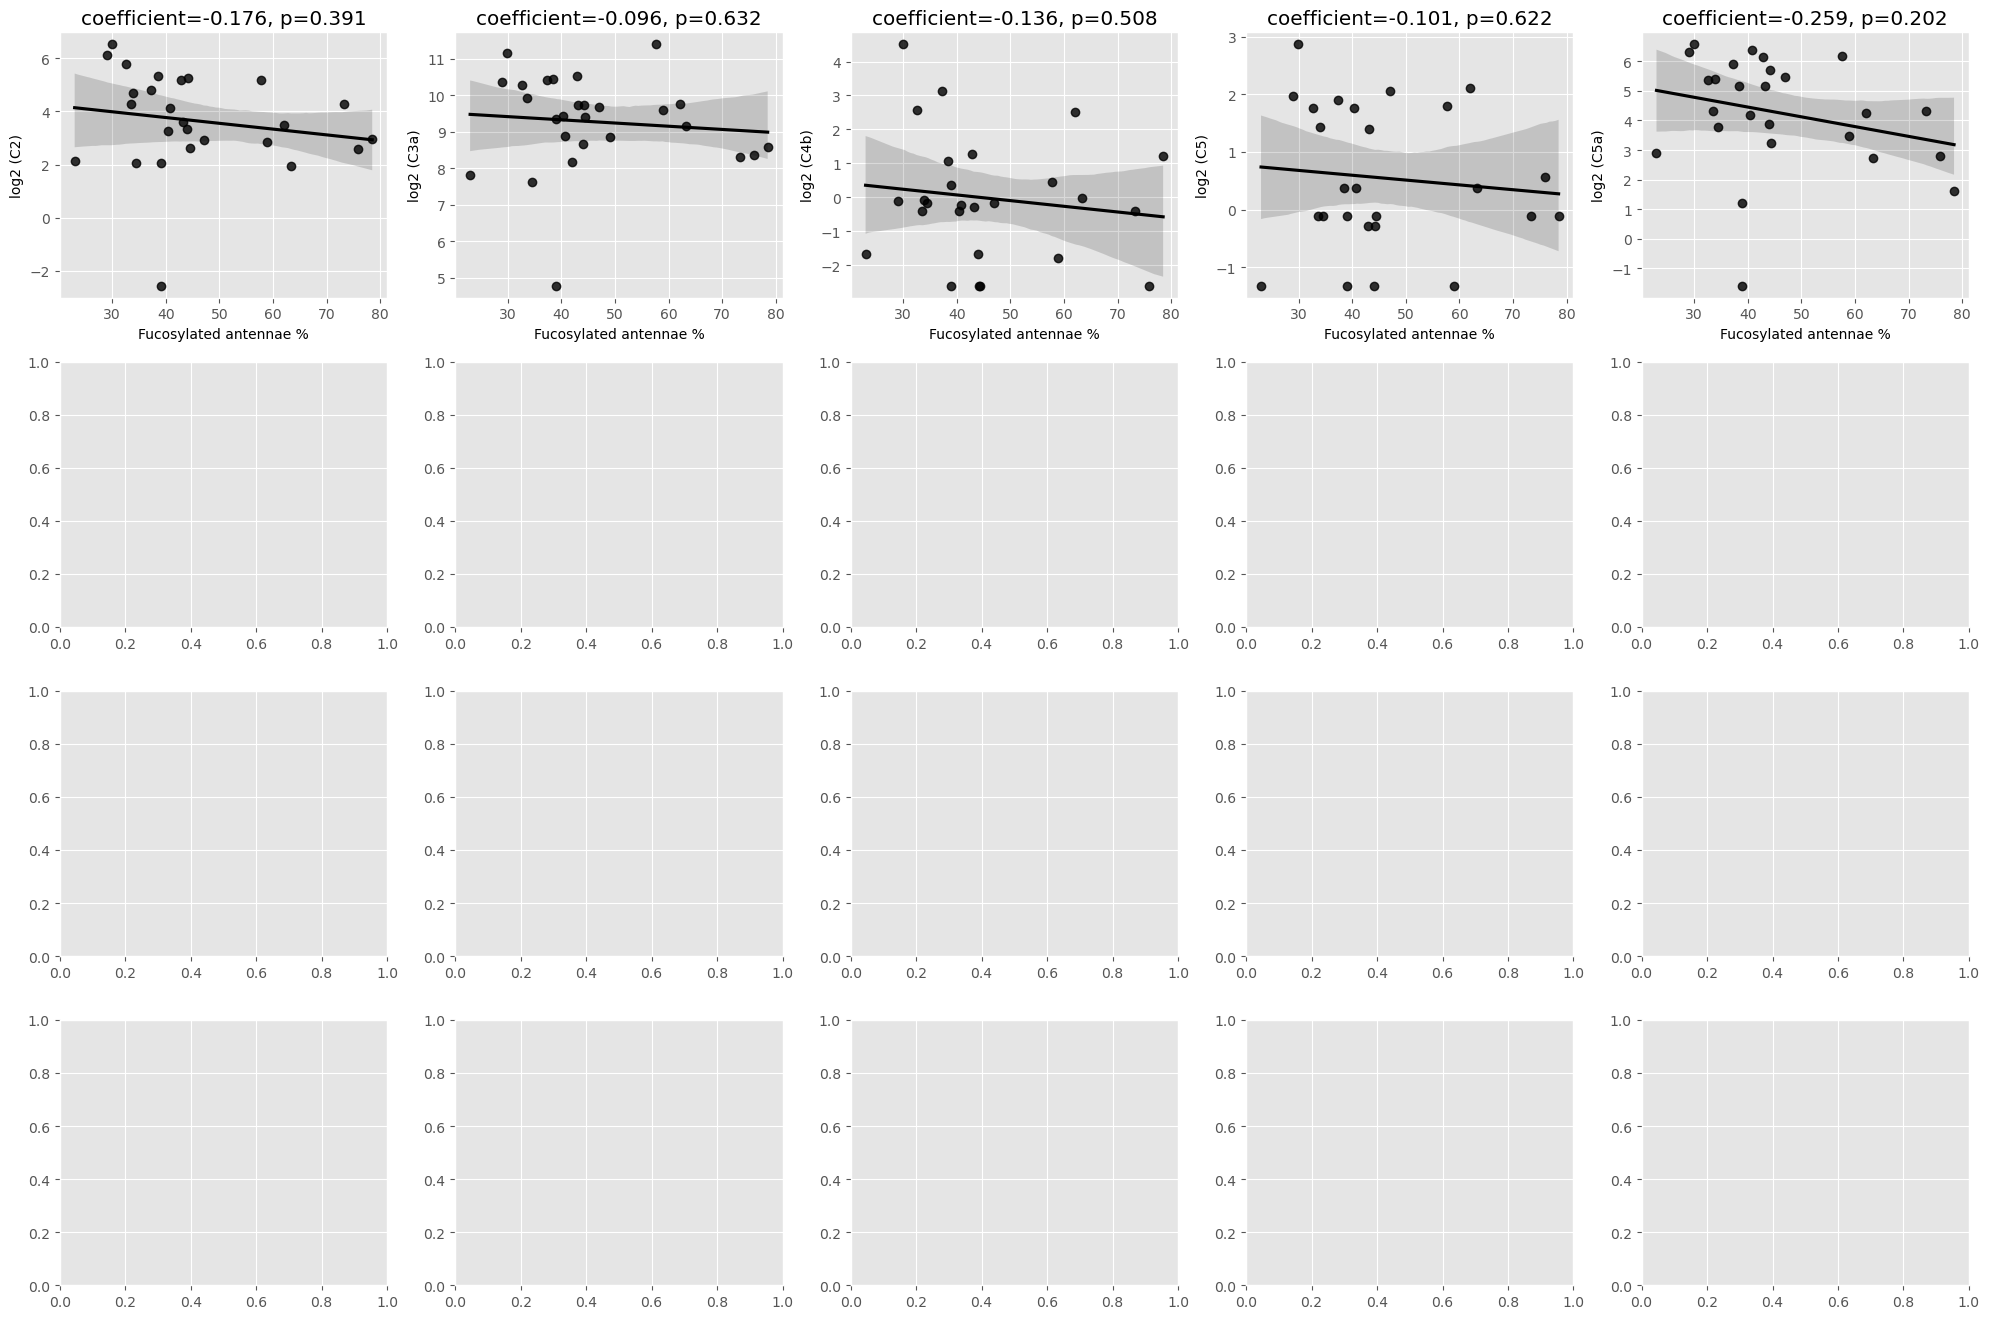

In [62]:
LewisSLewisTCorrelation(y='Complements')

### Correlation to cytokines

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:467: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,i]=data[i].astype('float')
/tm

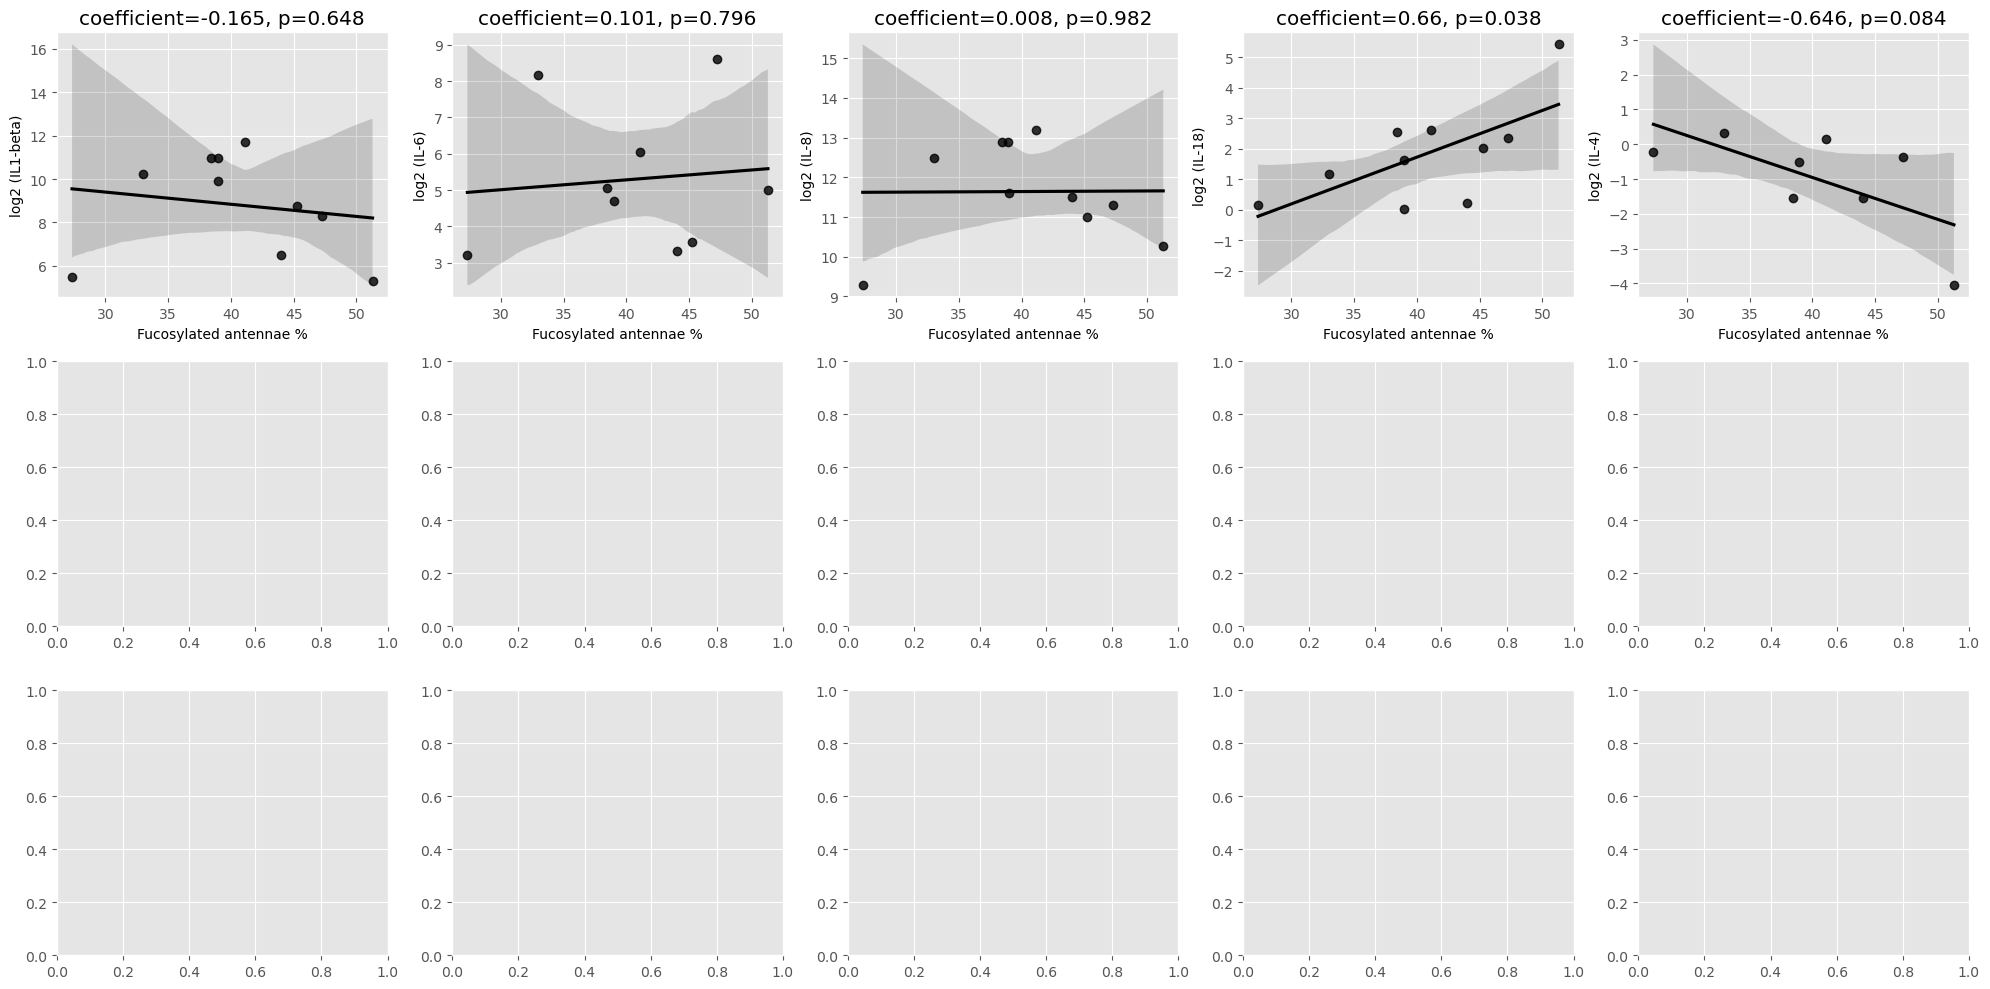

In [63]:
LewisSLewisTCorrelation(y='Cytokines')

## Blood group A

### Function for correlation analysis

In [64]:
def BloodATCorrelation(y='MMP', CST_all=True, CST_label=False, xlabel='Blood group A in Glycotopes %'):
    # Data
    data=Terminals().data

    # Relative intensity
    filt=EpitopeGroupFilters(data)
    
    sub=filt.blood_A
    total=(data['dHex_count']>=0)

    Relat_intensity=GeneralSubCalculation(data=data, sub_filt=sub, total_filt= total )
    
    
    
    # Merge and plot
    
    if y in ['MMP', 'Complements']:
        Relat_intensity=Relat_intensity.merge(clinical_new.loc[clinical_new['Blood Group']=='A'], 
                                              on='Sample_collection', how='inner')
        if (not CST_all):
            Relat_intensity=Relat_intensity.loc[~(Relat_intensity['CST group']=='IV-B or IV-C')]
        if y=='MMP':
            PlotMMPNewCohort(Relat_intensity, CST_label=CST_label, xlabel=xlabel)
        elif y=='Complements':
            PlotComplementsNewCohort(Relat_intensity, CST_label=CST_label, xlabel=xlabel)
    elif y=='Cytokines':
        Relat_intensity=Relat_intensity.merge(clinical_old.loc[clinical_old['Blood group']=='A'], 
                                              on='Sample_collection', how='inner')
        if (not CST_all):
            Relat_intensity=Relat_intensity.loc[~(Relat_intensity['CST group']=='IV-B or IV-C')]
        PlotCytokineOldCohort(Relat_intensity,CST_label=CST_label, xlabel=xlabel)

### Correlation to MMP

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:315: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,i]=data[i].astype('float')


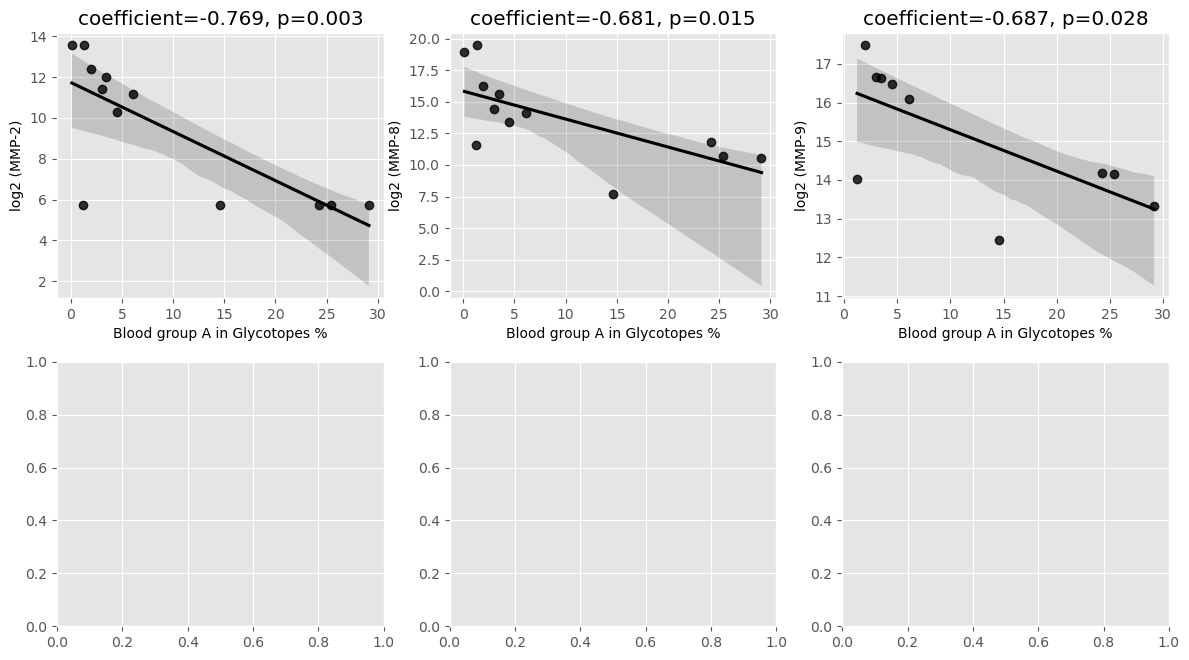

In [65]:
BloodATCorrelation(y='MMP')

### Correlation to complements

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()


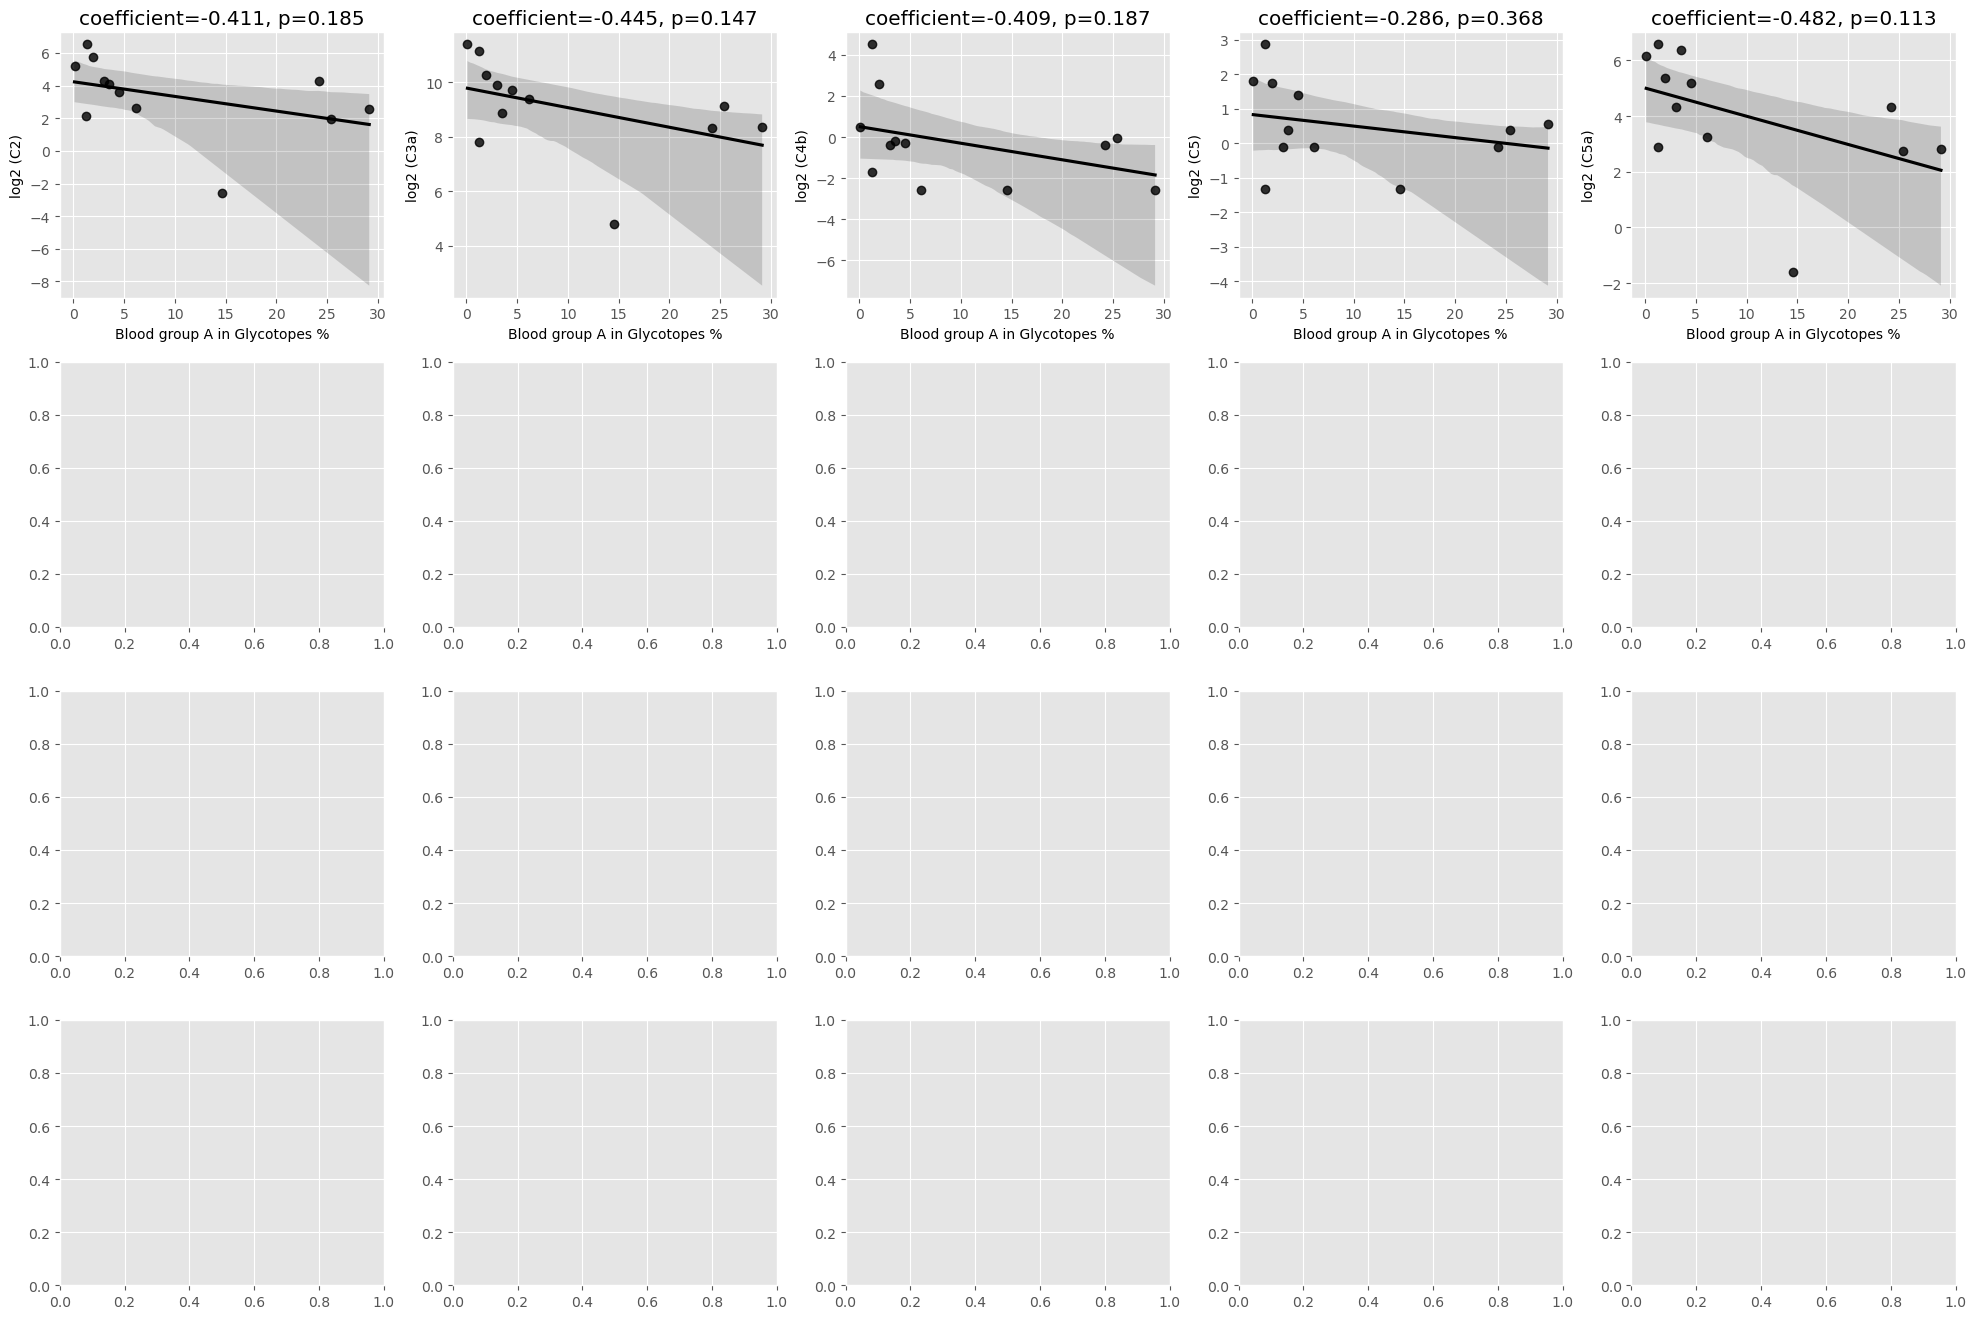

In [66]:
BloodATCorrelation(y='Complements')

## Blood group B

### Function for correlation analysis

In [67]:
def BloodBTCorrelation(y='MMP', CST_all=True, CST_label=False, xlabel='Blood group B on glycotopes %'):
    # Data
    data=Terminals().data

    # Relative intensity
    filt=EpitopeGroupFilters(data)
    
    sub=filt.blood_B
    total=(data['dHex_count']>=0)

    Relat_intensity=GeneralSubCalculation(data=data, sub_filt=sub, 
                                          total_filt= total )
    
    
    # Merge and plot
    
    if y in ['MMP', 'Complements']:
        Relat_intensity=Relat_intensity.merge(clinical_new.loc[clinical_new['Blood Group']=='B'], 
                                              on='Sample_collection', how='inner')
        if (not CST_all):
            Relat_intensity=Relat_intensity.loc[~(Relat_intensity['CST group']=='IV-B or IV-C')]
        if y=='MMP':
            PlotMMPNewCohort(Relat_intensity, CST_label=CST_label, xlabel=xlabel)
        elif y=='Complements':
            PlotComplementsNewCohort(Relat_intensity, CST_label=CST_label, xlabel=xlabel)
    elif y=='Cytokines':
        Relat_intensity=Relat_intensity.merge(clinical_old.loc[clinical_old['Blood group']=='B'], 
                                              on='Sample_collection', how='inner')
        if (not CST_all):
            Relat_intensity=Relat_intensity.loc[~(Relat_intensity['CST group']=='IV-B or IV-C')]
        PlotCytokineOldCohort(Relat_intensity,CST_label=CST_label, xlabel=xlabel)

### Correlation to complement factors

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()


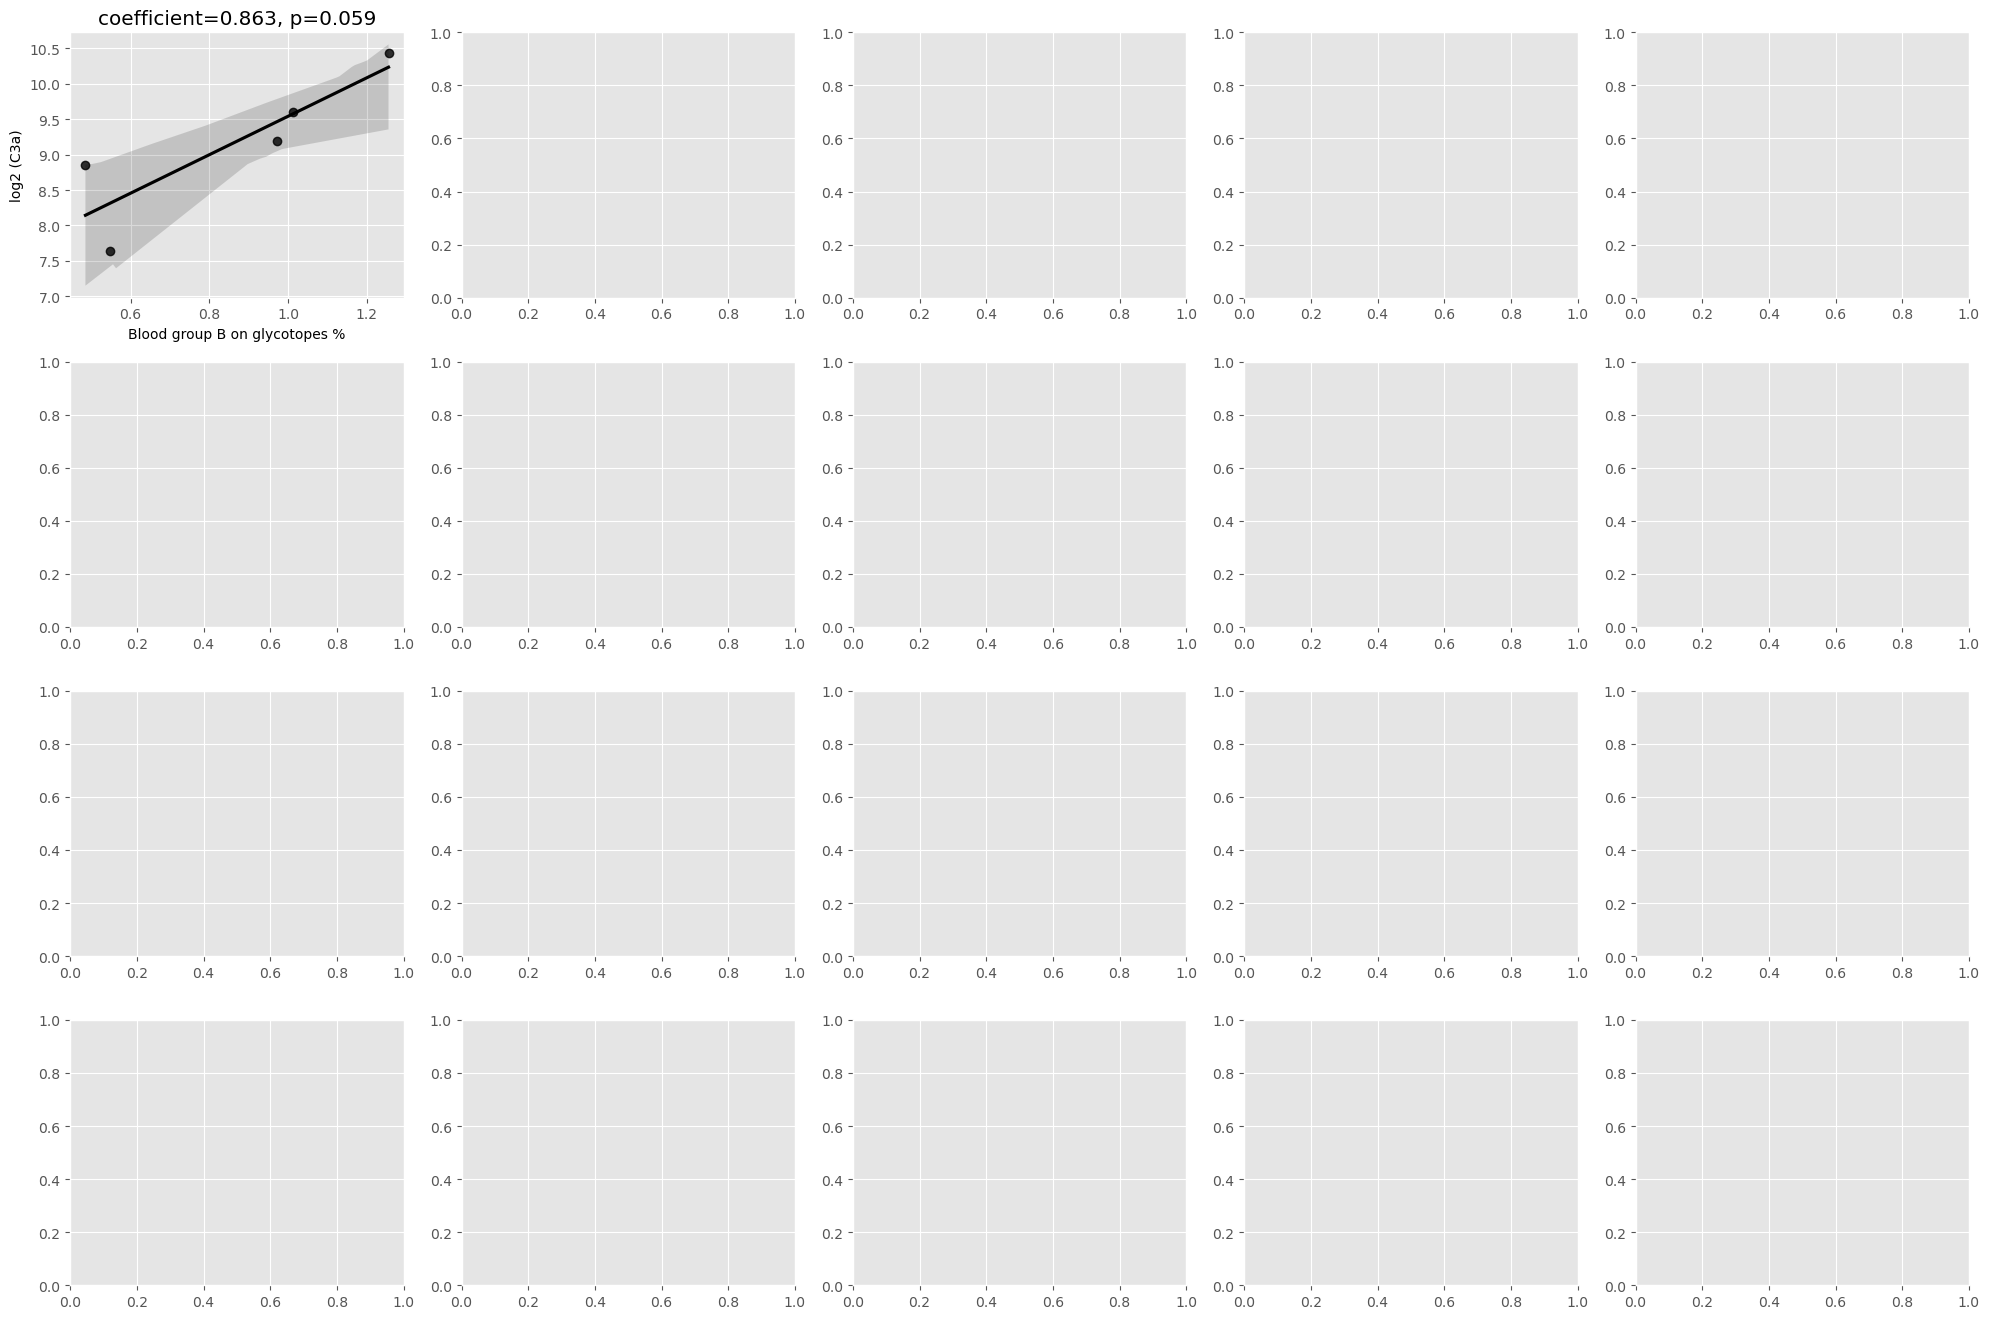

In [68]:
BloodBTCorrelation(y='Complements')

# CST

## Correlation to sialylated N-glycans

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()


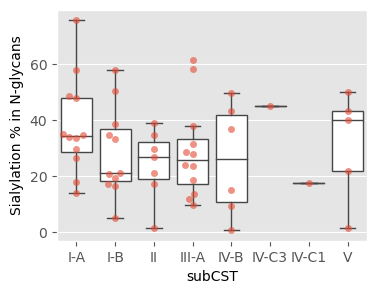

In [69]:
# Data
data=Nglycans().data.copy()


# Relative intensity   
filt=NglycanGroupFilters(data)

sub= (data['NeuAc_count'] >=1) 
total=  (data['NeuAc_count'] >=0) 

Relat_intensity=GeneralSubCalculation(data=data, sub_filt=sub, total_filt= total)

Relat_intensity=Relat_intensity.merge(clinical_new, on='Sample_collection', how='inner')


plt.figure(figsize=[4,3])
sb.boxplot(data=Relat_intensity,
           x='subCST', y='Relat_intensity',
           order=['I-A', 'I-B','II', 'III-A', 'IV-B', 'IV-C3', 'IV-C1', 'V'],
           linewidth=1, showfliers=False, boxprops={'facecolor':'w'})
sb.swarmplot(data=Relat_intensity, 
           x='subCST', y='Relat_intensity', size=5,alpha=0.6,
           order=['I-A', 'I-B','II', 'III-A', 'IV-B', 'IV-C3', 'IV-C1', 'V'])
plt.ylabel('Sialylation % in N-glycans')
plt.show()

## Correlation to paucimannose glycans

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()


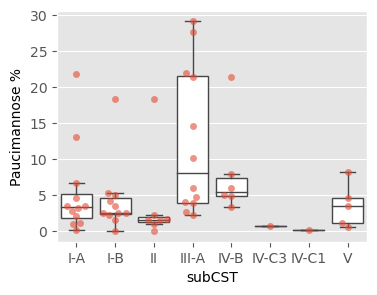

In [70]:
# Data
data=Nglycans().data.copy()

# Relative intensity   
filt=NglycanGroupFilters(data)

sub= (data['NeuAc_count'] >=1) & (data['dHex_count']>=0)
total=  (data['NeuAc_count'] >=0) & (data['dHex_count']>=0)

Relat_intensity=GeneralSubCalculation(data=data, sub_filt=filt.paucimannose, total_filt= total &(~filt.serum)&(~filt.bisec))


Relat_intensity=Relat_intensity.merge(clinical_new, on='Sample_collection', how='inner')


plt.figure(figsize=[4,3])
sb.boxplot(data=Relat_intensity,
           x='subCST', y='Relat_intensity',
           order=['I-A', 'I-B','II', 'III-A', 'IV-B', 'IV-C3', 'IV-C1', 'V'],
           linewidth=1, showfliers=False, boxprops={'facecolor':'w'})
sb.swarmplot(data=Relat_intensity, 
           x='subCST', y='Relat_intensity', size=5,alpha=0.6,
           order=['I-A', 'I-B','II', 'III-A', 'IV-B', 'IV-C3', 'IV-C1', 'V'])
plt.ylabel('Paucimannose %')
plt.show()

## Correlation to high mannose glycans

[1579.8 1783.9 1988.  2192.1 2396.2]


/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()


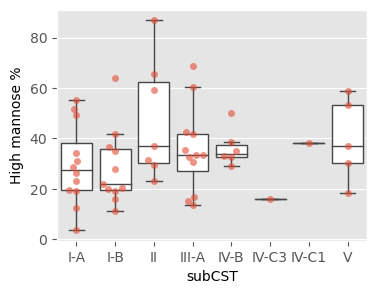

In [71]:
# Data
data=Nglycans().data.copy()

# Relative intensity   
filt=NglycanGroupFilters(data)

print(data[filt.high_mannose].mass.unique())

sub= data['mass'].isin([1579.8, 1783.9, 1988.0])
total=  (data['NeuAc_count'] >=0) & (data['dHex_count']>=0)

Relat_intensity=GeneralSubCalculation(data=data, sub_filt=filt.high_mannose, total_filt= total)


Relat_intensity=Relat_intensity.merge(clinical_new, on='Sample_collection', how='inner')


## Plot settings
plt.style.use('ggplot')

plt.figure(figsize=[4,3])
sb.boxplot(data=Relat_intensity,
           x='subCST', y='Relat_intensity',
           order=['I-A', 'I-B','II', 'III-A', 'IV-B', 'IV-C3', 'IV-C1', 'V'],
           linewidth=1, showfliers=False, boxprops={'facecolor':'w'})
sb.swarmplot(data=Relat_intensity, 
           x='subCST', y='Relat_intensity', size=5,alpha=0.6,
           order=['I-A', 'I-B','II', 'III-A', 'IV-B', 'IV-C3', 'IV-C1', 'V'])
plt.ylabel('High mannose %')
plt.show()

## Correlation to bisected glycans

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()


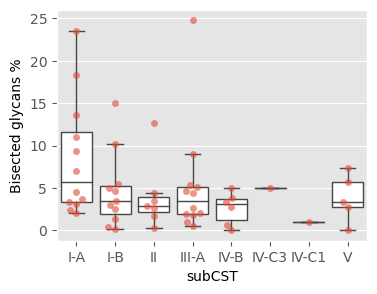

In [72]:
# Data
data=Nglycans().data.copy()

# Relative intensity   
filt=NglycanGroupFilters(data)

sub= (data['NeuAc_count'] >=1) & (data['dHex_count']>=0)
total= (data['NeuAc_count'] >=0) & (data['dHex_count']>=0)

Relat_intensity=GeneralSubCalculation(data=data, sub_filt=filt.bisec, total_filt= total)

Relat_intensity=Relat_intensity.merge(clinical_new, on='Sample_collection', how='inner')


plt.figure(figsize=[4,3])

sb.boxplot(data=Relat_intensity,
           x='subCST', y='Relat_intensity',
           order=['I-A', 'I-B','II', 'III-A', 'IV-B', 'IV-C3', 'IV-C1', 'V'],
           linewidth=1, showfliers=False, boxprops={'facecolor':'w'})
sb.swarmplot(data=Relat_intensity, 
           x='subCST', y='Relat_intensity', size=5,alpha=0.6,
           order=['I-A', 'I-B','II', 'III-A', 'IV-B', 'IV-C3', 'IV-C1', 'V'])
plt.ylabel('Bisected glycans %')
plt.show()

# Longitudinal studies

## Table to summerize longgitidinal studies

In [73]:
# Organize the data
N=Nglycans().data
O=Oglycans().data
T=Terminals().data

# Obtain samples with longitudinal data
longitudinal_samples=N.drop_duplicates(subset=['Sample_collection'])
longitudinal_samples=longitudinal_samples.groupby(by='Sample_name').count()
longitudinal_samples=longitudinal_samples.query('Sample_collection>1')
longitudinal_samples=longitudinal_samples.index
print(len(longitudinal_samples))

# Get the availability of glycomic data
N=N[N['Sample_name'].isin(longitudinal_samples)]
O=O[O['Sample_name'].isin(longitudinal_samples)]
T=T[T['Sample_name'].isin(longitudinal_samples)]

N=N.groupby(by=['Sample_collection'])['Sample_collection'].count()
O=O.groupby(by=['Sample_collection'])['Sample_collection'].count()
T=T.groupby(by=['Sample_collection'])['Sample_collection'].count()


res=pd.DataFrame({'N-glycans':N, 'O-glycans':O, 'Terminals':T})

# table showing data availability
res=(res>0).astype(int).replace({1:u'\u2713', 0: u'\u2715'})
res

13


N-glycans O-glycans Terminals
Sample_collection                              
P12-17plus3               ✓         ✓         ✓
P12-23plus3               ✓         ✓         ✓
P12-31plus3               ✓         ✕         ✓
P20-22plus4               ✓         ✓         ✓
P20-24plus5               ✓         ✕         ✓
P24-13plus6               ✓         ✓         ✓
P24-30plus6               ✓         ✓         ✓
P28-12plus6               ✓         ✓         ✓
P28-20plus6               ✓         ✓         ✓
P29-15plus4               ✓         ✓         ✓
P29-21plus4               ✓         ✓         ✓
P29-30plus4               ✓         ✕         ✓
P30-15plus4               ✓         ✓         ✓
P30-24plus4               ✓         ✓         ✕
P30-32plus4               ✓         ✓         ✓
P31-15plus3               ✓         ✓         ✓
P31-24plus0               ✓         ✕         ✓
P31-32plus0               ✓         ✕         ✓
P32-11plus0               ✓         ✓         ✓
P32-21plus0               ✓         ✓         ✓
P32-30plus5               ✓         ✓         ✕
P33-16plus1               ✓         ✓         ✓
P33-24plus1               ✓         ✕         ✓
P34-14plus4               ✓         ✓         ✓
P34-19plus1               ✓         ✓         ✓
P34-31plus6               ✓         ✕         ✕
P35-14plus4               ✓         ✓         ✓
P35-20plus4               ✓         ✓         ✓
P36-15plus1               ✓         ✕         ✓
P36-23plus6               ✓         ✓         ✓
P36-29plus6               ✓         ✓         ✕
P4-20plus5                ✓         ✓         ✓
P4-26plus0                ✓         ✓         ✕

## Compare spectrum patterns

## Dot plot and pearson correlation analysis

### Def a function for plot analysis

In [74]:
def LongitudinalCorrelationAnalysis(samples=['P12-17plus3', 'P12-31plus3'], mass_range='mass>1500 & mass<3000'):
    # Obtain and process the data
    N=Nglycans().data.copy()
    data=N[N['Sample_name']==samples[0].split('-')[0]]
    data=data.query(mass_range)
    data=data.pivot_table(index='mass', columns='Sample_collection', values='Intensity')

    # Remove rows with na values found in all spectra, fill other na value with 0, normalize to the highest peak
    data=data.dropna(axis=0, thresh=data.shape[1])
    data=data.fillna(0)
    data=data.div(data.max(axis=0),axis=1)

    # Remove peaks below 20% of the highest peak found in all spectra
    data=data[~(((data<=0.20).sum(axis=1))==data.shape[1])]
    
    cor, p=sp.stats.pearsonr(data[samples[0]], data[samples[1]])
    plt.style.use('ggplot')
    plt.figure(figsize=[4,3])
    plt.scatter(data[samples[0]], data[samples[1]], s=10, c='grey')
    plt.title('{} vs {} \n coefficient={}'.format(samples[0], samples[1],round(cor,2)))
    plt.xlabel(samples[0]); plt.ylabel(samples[1])
    plt.show()

### Sample P12

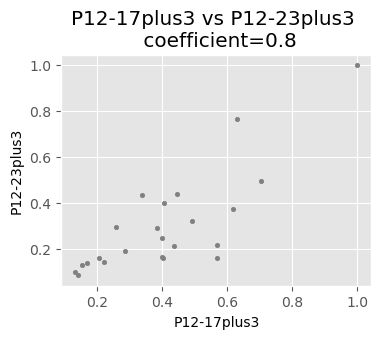

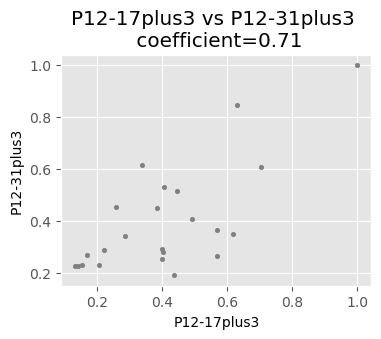

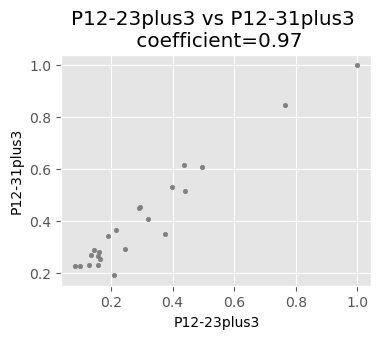

In [75]:
LongitudinalCorrelationAnalysis(samples=['P12-17plus3', 'P12-23plus3'], mass_range='mass>1500 & mass<3500')
LongitudinalCorrelationAnalysis(samples=['P12-17plus3', 'P12-31plus3'], mass_range='mass>1500 & mass<3500')
LongitudinalCorrelationAnalysis(samples=['P12-23plus3', 'P12-31plus3'], mass_range='mass>1500 & mass<3500')

### Sample P4 mass range 1000-5000

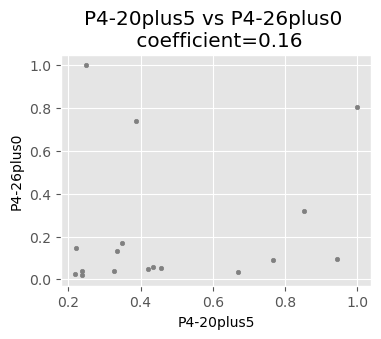

In [76]:
LongitudinalCorrelationAnalysis(samples=['P4-20plus5', 'P4-26plus0'], mass_range='mass>1500 & mass<3500')

## Pearson correlation analysis of all longitudinal samples

In [77]:
# Organize the data
N=Nglycans().data.copy()

longitudinal_samples=['P4', 'P20','P12', 'P24', 'P28', 'P29', 'P30', 'P33', 'P34','P35', 'P36', 'P31', 'P32']

N=N.merge(clinical_new[['Sample_collection', 'Collection_time']], on='Sample_collection', how='left')
N=N.query('Collection_time<40')

correlation_result={}
for i in longitudinal_samples:
    data=N[N['Sample_name']==i]
    data=data.query('mass>1500 & mass<3500')
    data=data.reset_index()
    data=data.pivot_table(index='mass', columns='Sample_collection', values='Intensity')
    
    # Remove rows with na values found in all spectra, fill other na value with 0, normalize to the highest peak
    data=data.dropna(axis=0, thresh=data.shape[1])
    data=data.fillna(0)
    data=data.div(data.max(axis=0),axis=1)

    # Remove peaks below 20% of the highest peak found in all spectra
    data=data[~(((data<=0.20).sum(axis=1))==data.shape[1])]
    
    # correlation analysis
    data=data.corr().round(4)
    
    #sb.heatmap(data); plt.show()
    
    # extract the result
    data=data.stack()
    data=data[data<1].unique()
    data=list(data)
    correlation_result[i]=data

## Function to show glycan changes at different time points in longitudinal samples

In [78]:
def PlotLongitudinalTimePoint(medical_intervention=False, figsize=(8,3.7)):
    ### The time point data
    # From clinical data_new
    data_new=clinical_new.loc[:,('Sample_name','Sample_collection', 
                             'Collection_time', 'Gestation_length','Blood Group',
                             'Cerclage starts', 'Progesterone starts', 'Outcome')].copy()

    # Add non-pregnant samples from clincial_old, get data
    data_old=clinical_old.loc[:,('Sample_name','Sample_collection', 
                             'Collection_time', 'Gestation_length', 'Blood group',
                             'Cerclage starts', 'Progesterone starts', 'Outcome')].copy()
    
    data_old.rename({'Blood group':'Blood Group'}, axis=1, inplace=True)
    

    data_old=data_old.loc[data_old['Sample_collection'].str.contains('NP')]
    data_old.replace({0:0.5}, inplace=True)

    data=data_new.append(data_old)
    data.reset_index(inplace=True)
    data.drop(labels=['index'], axis=1, inplace=True)
    data['Sample_name']=data['Sample_name'].astype('str')
    data.sort_values(by='Gestation_length', inplace=True, ascending=False)

    ### Merge
    data=data.merge(Relat_intensity, on='Sample_collection', how='inner')
    
    data=data.query('Collection_time>0')
  
    
    longitudinal_samples=data.drop_duplicates(subset=['Sample_collection'])
    longitudinal_samples=longitudinal_samples.groupby(by='Sample_name').count()
    longitudinal_samples=longitudinal_samples.query('Sample_collection>1')
    longitudinal_samples=longitudinal_samples.index
    
    data=data[data['Sample_name'].isin(longitudinal_samples)]
    


    ### Plot
    plt.style.use('ggplot')

    p,ax=plt.subplots(figsize=figsize)

    ax.barh(y=data['Sample_name'], width=data['Gestation_length'], height=0.055, color='gray')
    ax.scatter(x=data['Collection_time'], y=data['Sample_name'], color='b', 
               s=data['Relat_intensity']*3)
    
    ax.set_xlabel('Gestation (weeks)')
    ax.set_ylabel('Patient code')

    # Add 37 week border line
    ax.axvline(x=37, linestyle='--')
    ax.text(x=36.5, y=-1.5, s='37', fontsize=10, fontweight='bold', c='r')
    
    # Add mark for the presence of glycan data
    ax.scatter(x=data['Collection_time'], y=data['Sample_name'], marker='|', s=5)

    # Add legend to indicate the presence of glycan data
    ax.scatter(x=4.5+5, y=13.3, marker='|', c='r')
    ax.text(x=5+5, y=13,s=': Glycomic analysis done at the time point',c='k')
    
    # Add legend for collection time point
    ax.scatter(x=4.5+5, y=14.3, c='b')
    ax.text(x=5+5, y=14,s=': Bisected glycans %',c='k')

    # Add legend for time of birth
    #ax.scatter(x=24.5+3, y=40, marker='_', c='gray', s=100)
    #ax.text(x=25+3, y=39.7,s=': Length of gestation' ,c='k')
    
    if medical_intervention:
        # Add Cerclage and progesterone start point
        ax.scatter(x=data['Cerclage starts'], y=data['Sample_name'], marker='X', color='k')
        ax.scatter(x=data['Progesterone starts'], y=data['Sample_name'], marker='+', color='k')

    plt.show()  
    
    
    plt.figure(figsize=figsize)
    
    for i in data['Sample_name']:
        temp=data[(data['Sample_name']==i) & (data['Outcome']=='Preterm')]
        sb.lineplot(data=temp, x='Collection_time', y='Relat_intensity', color='red')
        
    for i in data['Sample_name']:
        temp=data[(data['Sample_name']==i) & (data['Outcome']=='Term')]
        sb.lineplot(data=temp, x='Collection_time', y='Relat_intensity', color='grey')    
        
    for i in data['Sample_name']:
        temp=data[(data['Sample_name']==i) & (data['Outcome']=='Preterm')]
        sb.scatterplot(data=temp, x='Collection_time', y='Relat_intensity', color='red')
        
    for i in data['Sample_name']:
        temp=data[(data['Sample_name']==i) & (data['Outcome']=='Term')]
        sb.scatterplot(data=temp, x='Collection_time', y='Relat_intensity', color='grey') 
    
    plt.text(x=28, y=18-0.5, s='- Preterm', c='red')
    plt.text(x=28, y=17-0.5, s='- Term', c='grey')
    
    plt.xlabel('Gestation (weeks)'); plt.ylabel('Bisected glycans %')
    
    

## Bisected glycans

/tmp/ipykernel_5029/217233296.py:259: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub=sub.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/217233296.py:263: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=total.groupby(by='Sample_collection').sum()
/tmp/ipykernel_5029/2100064664.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data_new.append(data_old)


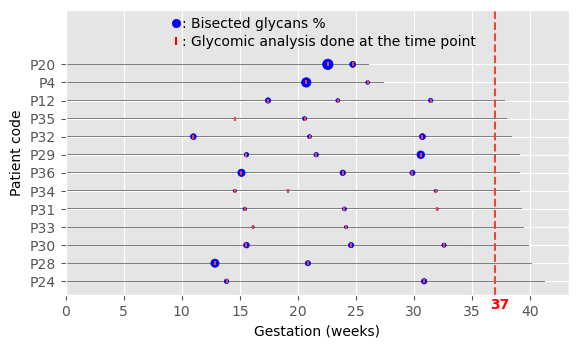

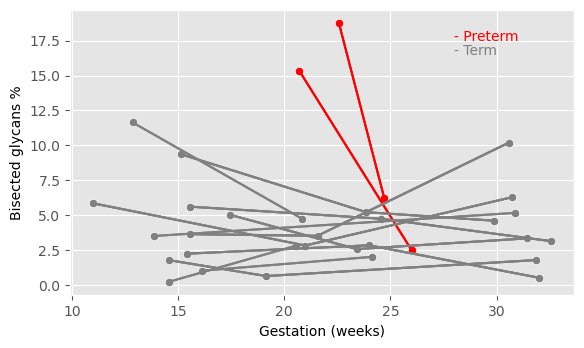

In [79]:
# Data
data=Nglycans().data
data=data.query('mass>1000 & mass<3500')

# filter
filt=NglycanGroupFilters(data)
total=data['dHex_count']>=0

# Relative intensity

Relat_intensity=GeneralSubCalculation(data=data, sub_filt=filt.bisec, 
                                      total_filt=total & (~filt.serum))
Relat_intensity.reset_index(inplace=True)

# Plot
PlotLongitudinalTimePoint(medical_intervention=False, figsize=(6.5,3.7))